In [1]:
%matplotlib inline
import os
from os import path as op 
import glob 
import numpy as np 
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("darkgrid")

In [3]:
airports_path = "covid_sat_ml_airports.geojson"
airports = gpd.read_file(airports_path)
airports.head()

,id,label,geometry
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6..."
1,2,Mineta,"POLYGON ((-121.94232 37.37698, -121.92817 37.3..."
2,3,Oakland_ap,"POLYGON ((-122.22682 37.74540, -122.21851 37.7..."
3,4,Howard_ap,"POLYGON ((-122.12797 37.66474, -122.12020 37.6..."
4,5,Livemore_m,"POLYGON ((-121.83345 37.69470, -121.82094 37.6..."


In [4]:
detections = glob.glob("2020*.geojson")
detections[:3]

['20200519_intersection.geojson',
 '20200213_intersection.geojson',
 '20200405_intersection.geojson']

In [5]:
detections_feb = gpd.read_file(detections[1])
detections_feb['date'] = detections_feb['scene_id'].apply(lambda x: x.split('_')[0])
detections_feb.head()

,id,tile,scene_id,score,geometry,date
0,1.0,51699-32520-16,20200213_033148_57_105a,0.950996,"POLYGON ((103.99504 1.36181, 103.99504 1.36100...",20200213
1,1.0,51699-32520-16,20200213_020732_1052,0.906273,"POLYGON ((103.99506 1.36181, 103.99506 1.36110...",20200213
2,1.0,51698-32520-16,20200213_033148_57_105a,0.536263,"POLYGON ((103.98819 1.36213, 103.98819 1.36138...",20200213
3,1.0,51701-32520-16,20200213_033148_57_105a,0.219728,"POLYGON ((104.00757 1.36215, 104.00757 1.36177...",20200213
4,1.0,51701-32520-16,20200213_033148_57_105a,0.213102,"POLYGON ((104.00753 1.36218, 104.00753 1.36198...",20200213


In [6]:
detection_by_dates = []
for detection in detections:
    det = gpd.read_file(detection)
    det['date'] = det['scene_id'].apply(lambda x: x.split('_')[0])
    det_sjoin = gpd.sjoin(airports, det, how='left', op='intersects')
    detection_by_dates.append(det_sjoin)

In [7]:
detections_airports = pd.concat(detection_by_dates)
detections_airports.head()

,id_left,label,geometry,index_right,id_right,tile,scene_id,score,date
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6...",106.0,1.0,10492-25370-16,20200519_181001_79_2257,0.202123,20200519
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6...",107.0,1.0,10490-25370-16,20200519_181001_79_2257,0.291036,20200519
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6...",105.0,1.0,10493-25370-16,20200519_181001_79_2257,0.257615,20200519
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6...",108.0,1.0,10489-25369-16,20200519_184350_1026,0.636628,20200519
0,1,SF_int,"POLYGON ((-122.40299 37.63672, -122.39731 37.6...",101.0,1.0,10487-25369-16,20200519_184350_1026,0.769836,20200519


In [8]:
len(detections_airports)

47730

In [9]:
count_detections = detections_airports.groupby(['label', 'date']).agg([ 'count'])

In [10]:
count_detections.head()

id_left geometry index_right id_right  tile scene_id score
                   count    count       count    count count    count count
label   date                                                               
Beijing 20200109     124      124         124      124   124      124   124
        20200112     142      142         142      142   142      142   142
        20200113      51       51          51       51    51       51    51
        20200114     121      121         121      121   121      121   121
        20200115     156      156         156      156   156      156   156

In [11]:
len(count_detections)

835

In [12]:
np.unique(np.array(detections_airports['label']))

array(['Beijing', 'Brakett_field', 'Buchannan', 'Changi_ap', 'Daxing',
       'Howard_ap', 'JFK', 'LAX', 'Linden', 'Livemore_m',
       'Marin_county_ap', 'Mineta', 'Napa_ap', 'Narita_ap', 'Nework',
       'Oakland_ap', 'Ontario', 'Palo_ato', 'SF_int', 'San_Carlos',
       'Tokyo_AP'], dtype=object)

In [13]:
beijing_planes = detections_airports[detections_airports['label']=='Beijing']
beijing_planes.head()

,id_left,label,geometry,index_right,id_right,tile,scene_id,score,date
16,18,Beijing,"POLYGON ((116.56762 40.11466, 116.60559 40.115...",NaN,NaN,NaN,NaN,NaN,NaN
16,18,Beijing,"POLYGON ((116.56762 40.11466, 116.60559 40.115...",467.0,18.0,53992-24798-16,20200213_005504_0f2b,0.410917,20200213
16,18,Beijing,"POLYGON ((116.56762 40.11466, 116.60559 40.115...",468.0,18.0,53995-24797-16,20200213_005504_0f2b,0.425935,20200213
16,18,Beijing,"POLYGON ((116.56762 40.11466, 116.60559 40.115...",470.0,18.0,53992-24797-16,20200213_005504_0f2b,0.465025,20200213
16,18,Beijing,"POLYGON ((116.56762 40.11466, 116.60559 40.115...",469.0,18.0,53996-24797-16,20200213_005504_0f2b,0.287118,20200213


In [14]:
beijing_planes_counts = beijing_planes.groupby('date').agg('count')

In [15]:
beijing_planes_counts.head()

,id_left,label,geometry,index_right,id_right,tile,scene_id,score
date,,,,,,,,
20200109,124,124,124,124,124,124,124,124
20200112,142,142,142,142,142,142,142,142
20200113,51,51,51,51,51,51,51,51
20200114,121,121,121,121,121,121,121,121
20200115,156,156,156,156,156,156,156,156


In [16]:
# beijing_planes_counts.to_csv('beijing_planes_counts.csv')

In [17]:
beijing_planes_counts['date_'] = beijing_planes_counts.index
sort_df = beijing_planes_counts.sort_values(by='date_', ascending=True)
x_names = list(sort_df['date_'])
y_vals = list(sort_df['tile'])

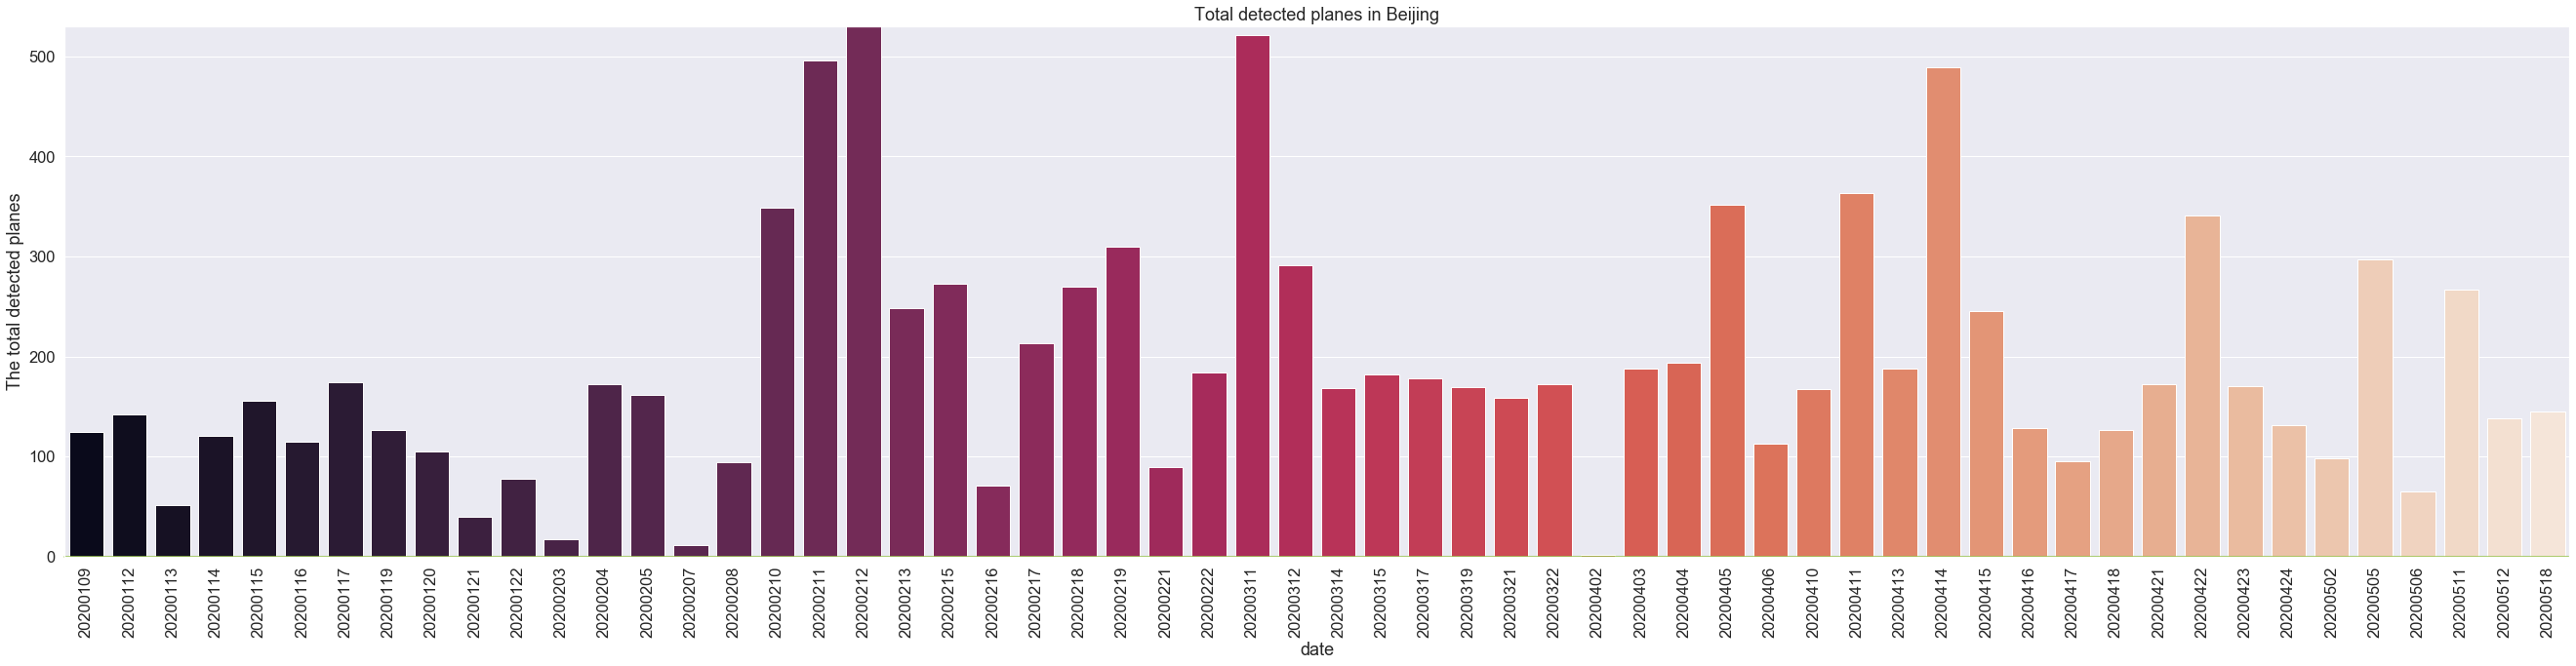

In [18]:
AOI = 'Beijing'
fig, ax = plt.subplots(figsize=(46, 10))
sns_plot = sns.barplot(x=x_names, y=y_vals, palette="rocket", ax=ax)

# Print out the raw performance data

# for x_name, y_val in zip(x_names, y_vals):
#     print(f'{x_name}: {y_val}')

current_palette = matplotlib.colors.hex2color('#86b92e')

ax.axhline(0, color=current_palette, clip_on=False)
ax.set_ylim([0, max(sort_df['tile'])])
ax.set_ylabel(f"The total detected planes")
ax.set_xlabel("date")
ax.set_title(f"Total detected planes in {AOI}")
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

fig.savefig(f"PSS_{AOI}_total_planes.png")

In [19]:
sort_df.head()

,id_left,label,geometry,index_right,id_right,tile,scene_id,score,date_
date,,,,,,,,,
20200109,124,124,124,124,124,124,124,124,20200109
20200112,142,142,142,142,142,142,142,142,20200112
20200113,51,51,51,51,51,51,51,51,20200113
20200114,121,121,121,121,121,121,121,121,20200114
20200115,156,156,156,156,156,156,156,156,20200115


In [20]:
def format_date(date_):
    date_=str(date_)
    year, month, day = date_[:4], date_[4:6], date_[6:]
    if int(day)<=15:
        half_month = f'{int(month)}_15th'
        return half_month
    else:
        half_month = f'{int(month)}_30th'
        return half_month

In [21]:
sort_df['date_halfM'] = sort_df['date_'].apply(lambda x: format_date(x))

In [22]:
agre_test = sort_df.groupby('date_halfM').agg('median')

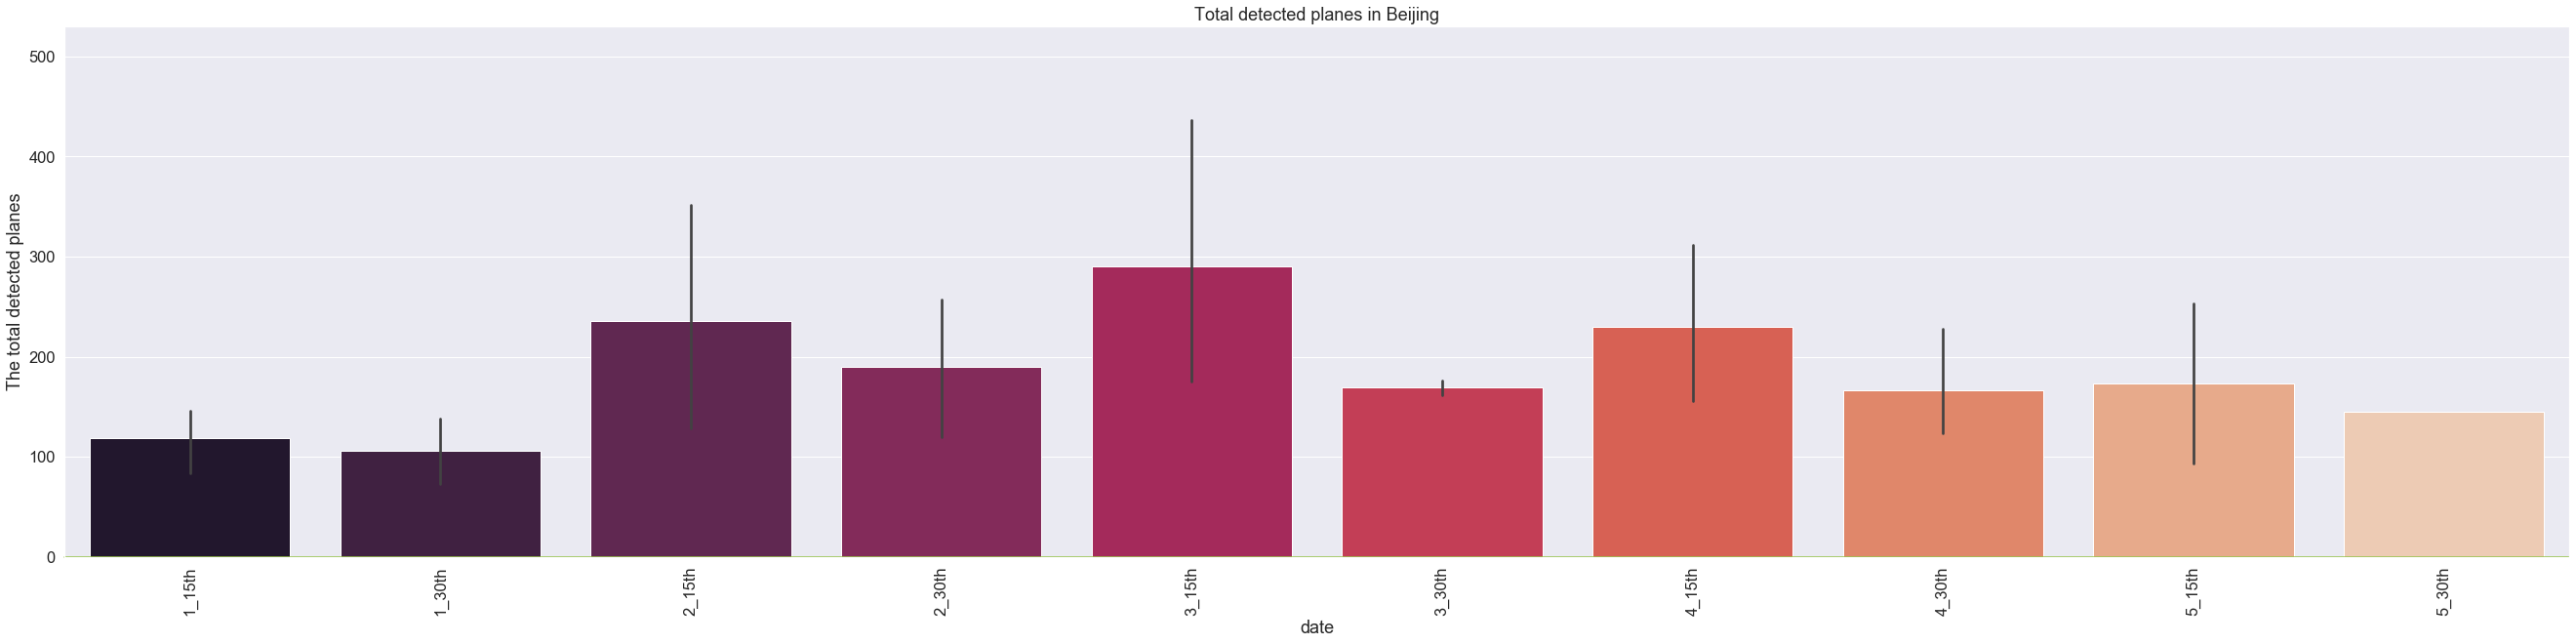

In [23]:
# beijing_planes_counts['date_'] = beijing_planes_counts.index
sort_df = sort_df.sort_values(by='date_halfM', ascending=True)
x_names = list(sort_df['date_halfM'])
y_vals = list(sort_df['tile'])

AOI = 'Beijing'
fig, ax = plt.subplots(figsize=(46, 10))
sns_plot = sns.barplot(x=x_names, y=y_vals, palette="rocket", ax=ax)

# Print out the raw performance data

# for x_name, y_val in zip(x_names, y_vals):
#     print(f'{x_name}: {y_val}')

current_palette = matplotlib.colors.hex2color('#86b92e')

ax.axhline(0, color=current_palette, clip_on=False)
ax.set_ylim([0, max(sort_df['tile'])])
ax.set_ylabel(f"The total detected planes")
ax.set_xlabel("date")
ax.set_title(f"Total detected planes in {AOI}")
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

fig.savefig(f"PSS_{AOI}_total_planes.png")

In [24]:
def plot_pss_stas_aoi(AOI, df):
    """ plot daily scenes per AOI
    """
    # Plot performance for all categories

    fig, ax = plt.subplots(figsize=(46, 10))
    aoi_df = df[df['label']==AOI]
    aoi_aggred = aoi_df.groupby('date').agg('count')
    aoi_aggred['date_'] = aoi_aggred.index

    sort_df = aoi_aggred.sort_values(by='date_', ascending=True)
    x_names = list(sort_df['date_'])
    y_vals = list(sort_df['tile'])

    sns_plot = sns.barplot(x=x_names, y=y_vals, color='salmon', ax=ax)

    current_palette = matplotlib.colors.hex2color('#86b92e')

    ax.axhline(0, color=current_palette, clip_on=False)
    ax.set_ylim([0, max(aoi_aggred['tile'])])
    ax.set_ylabel(f"The total detected planes")
    ax.set_xlabel("date")
    ax.set_title(f"Total detected planes in {AOI} airport")
    _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

    fig.savefig(f"Airport_{AOI}_total_planes.png")

/Users/yizhuangfang/.virtualenvs/general_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


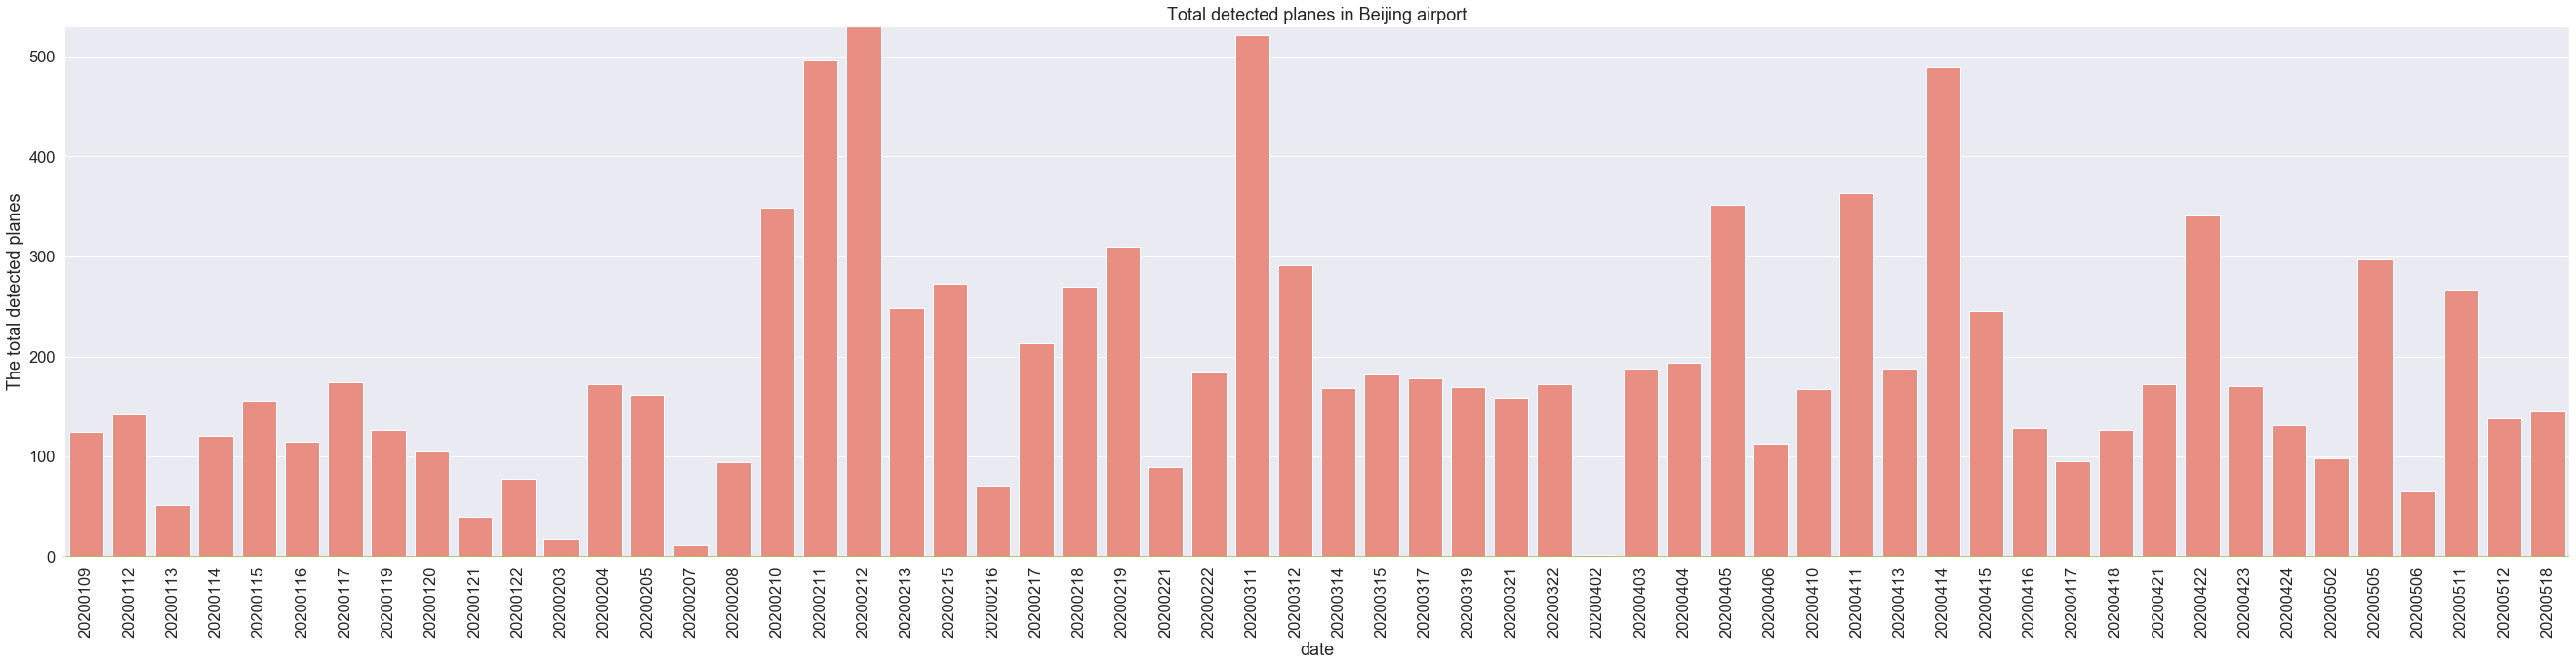

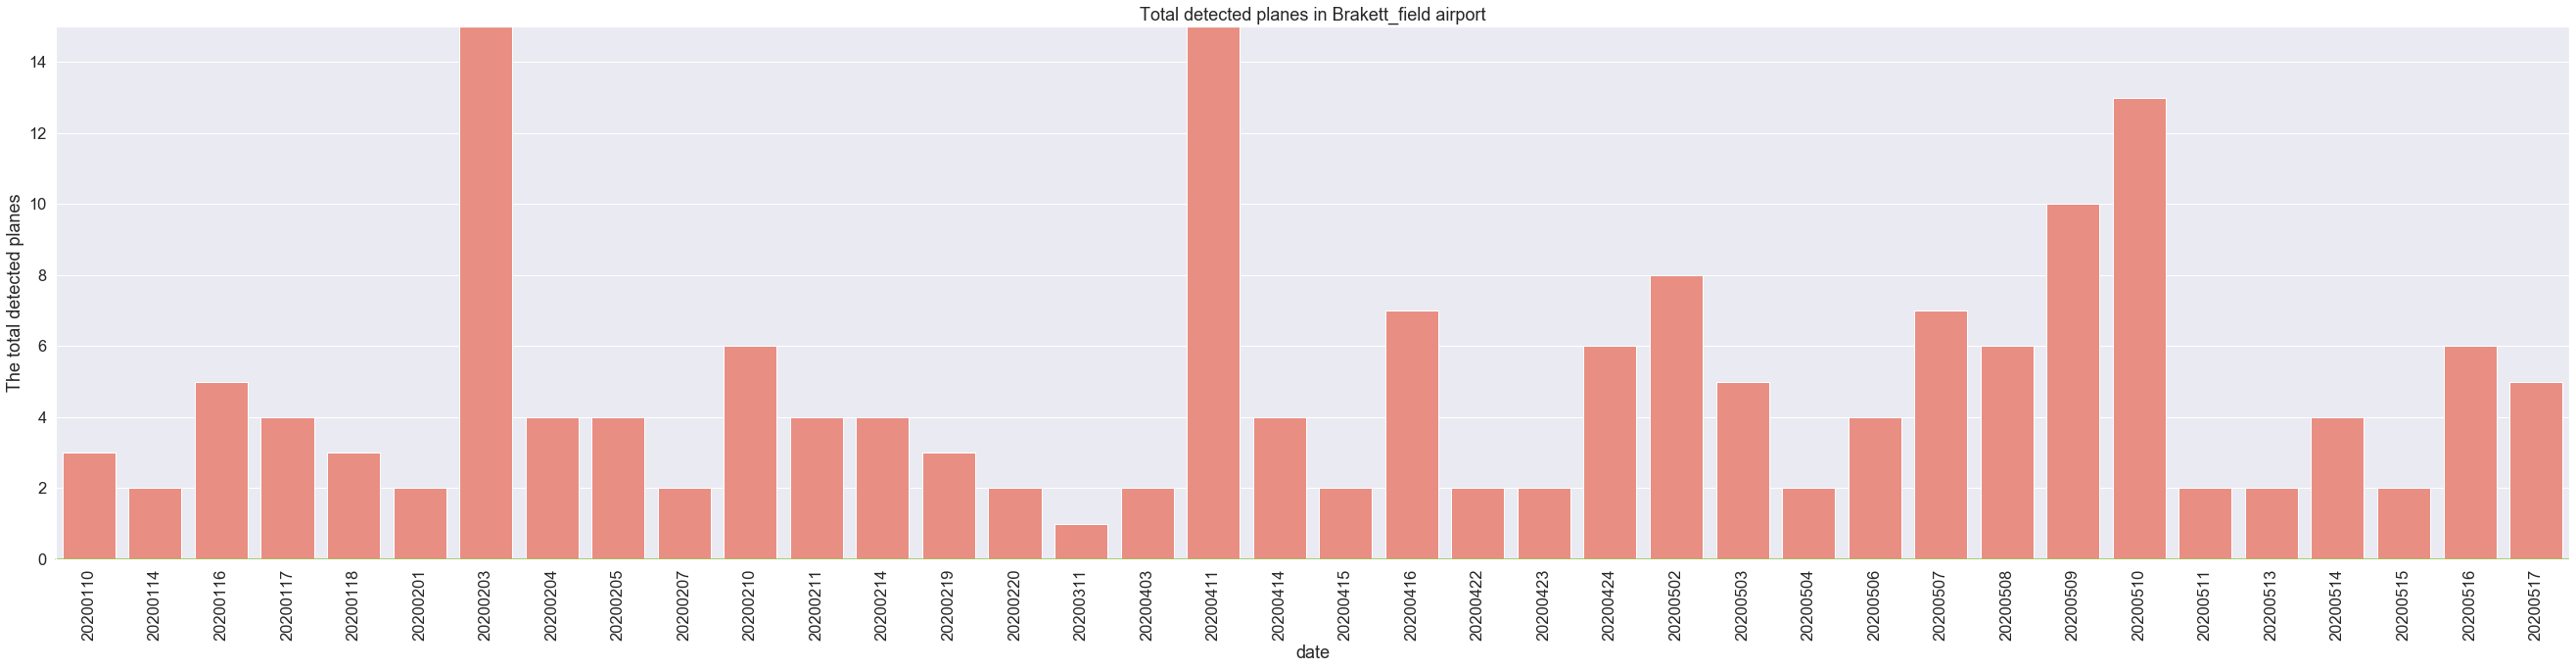

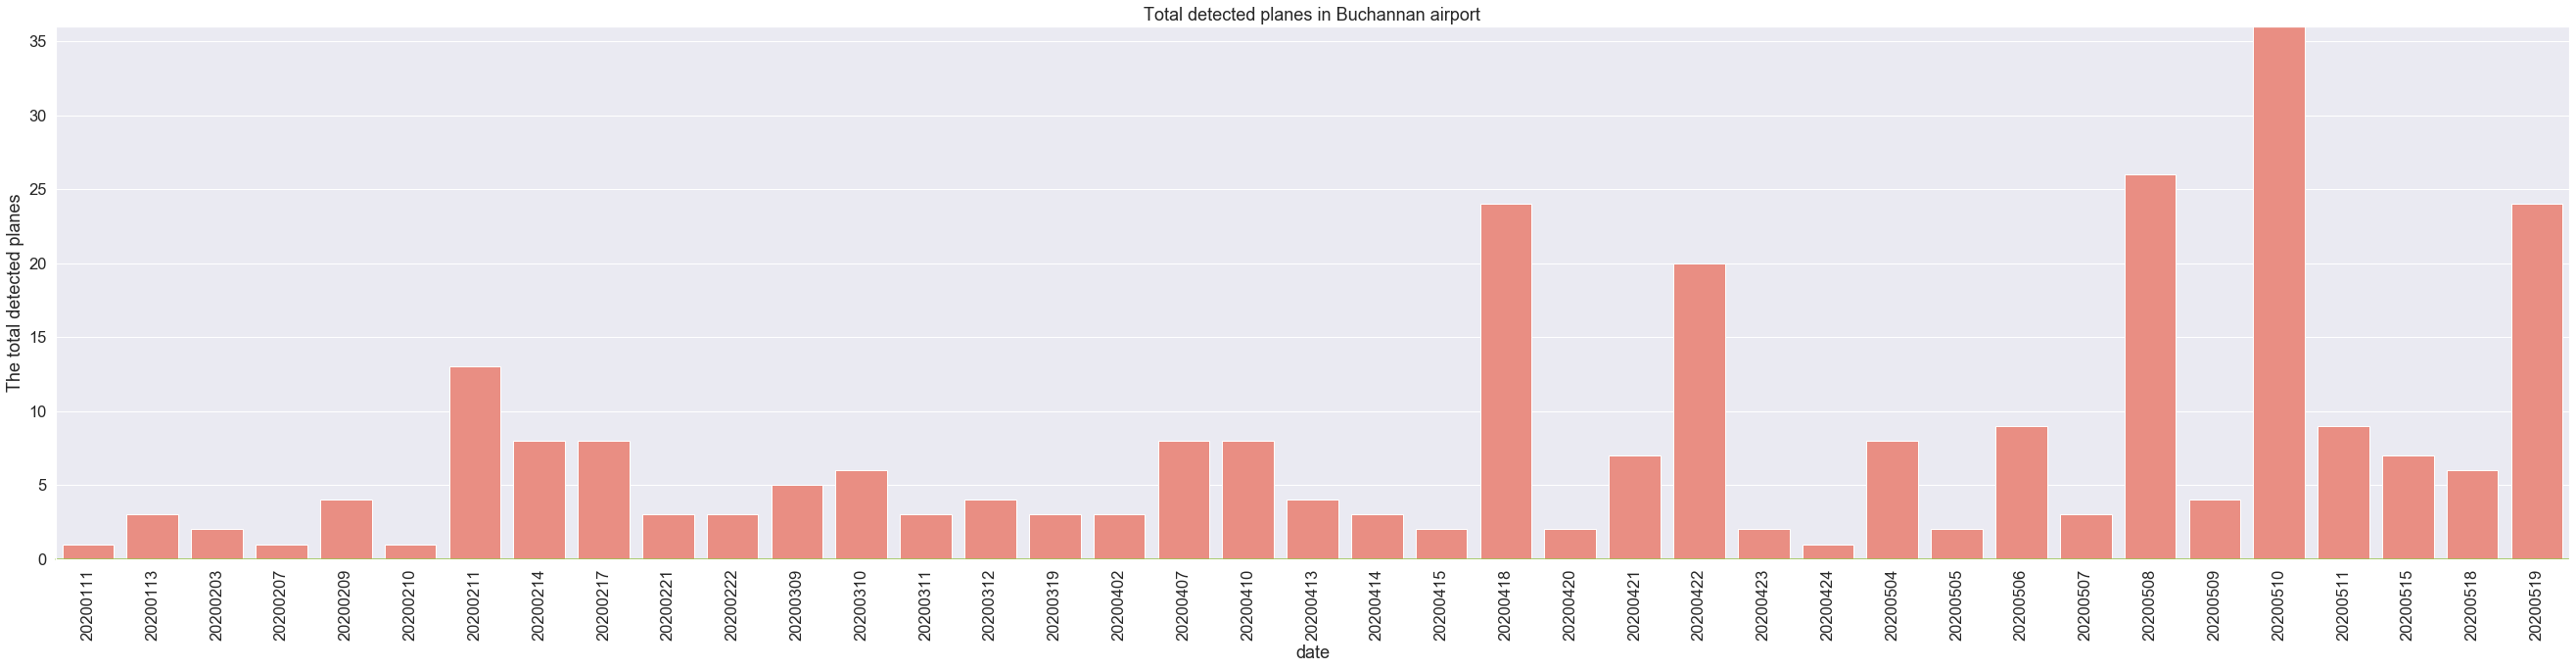

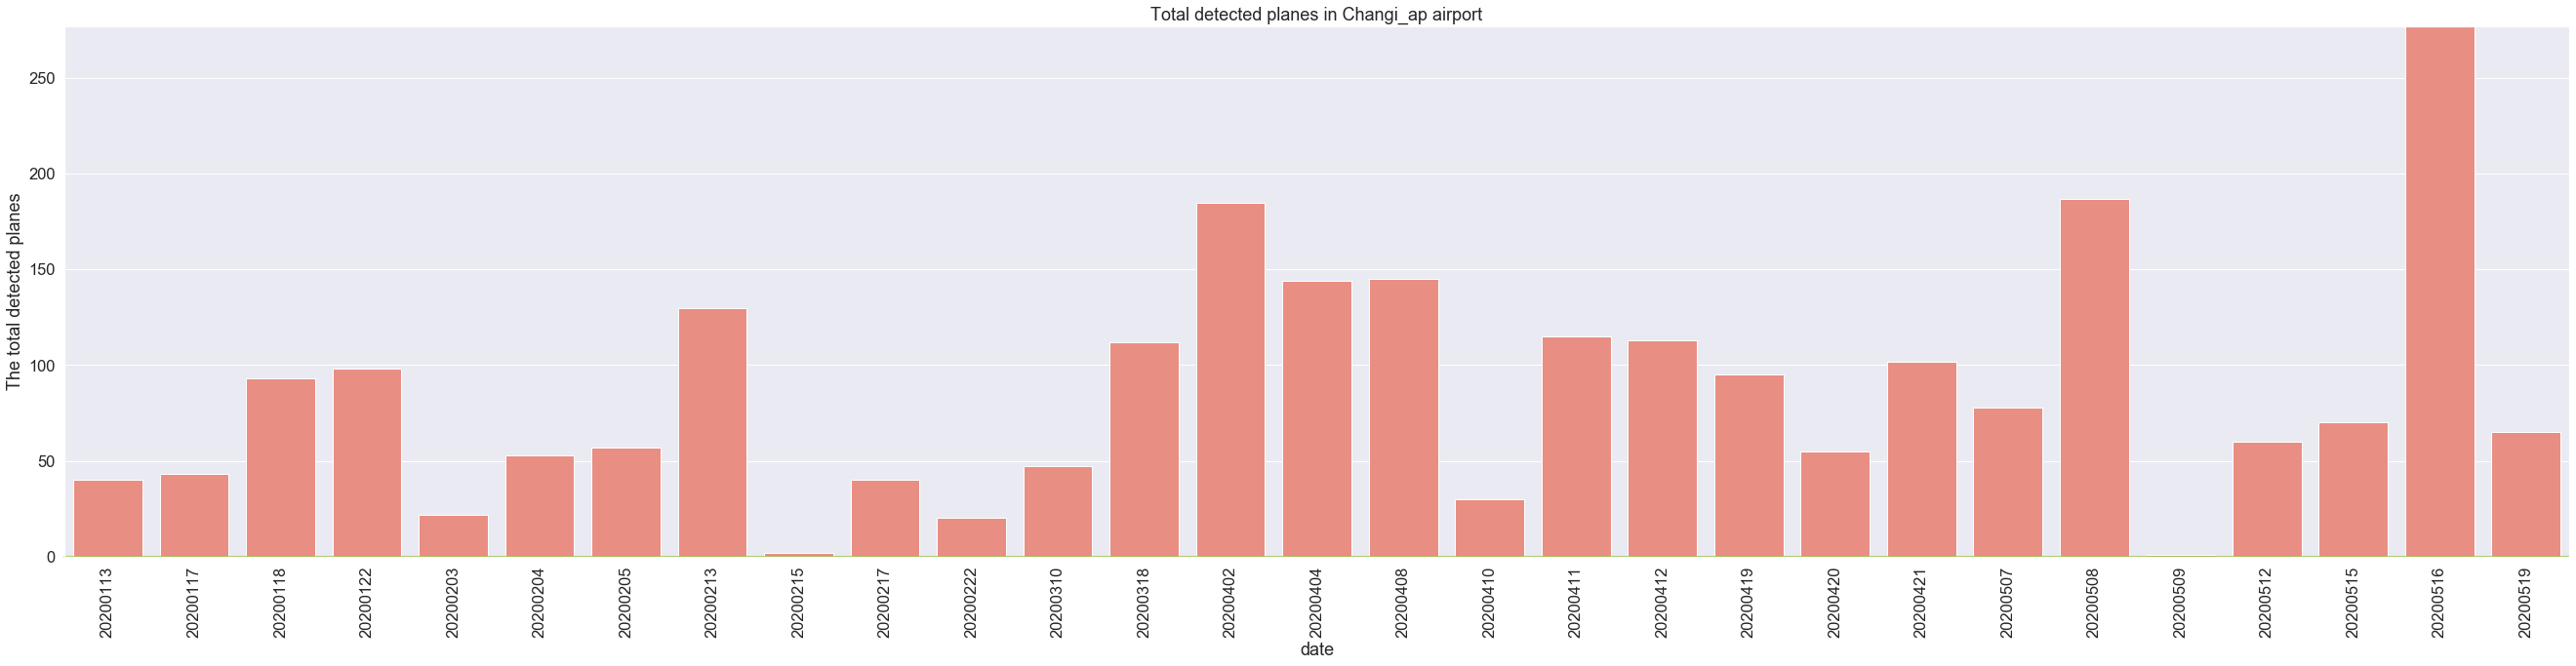

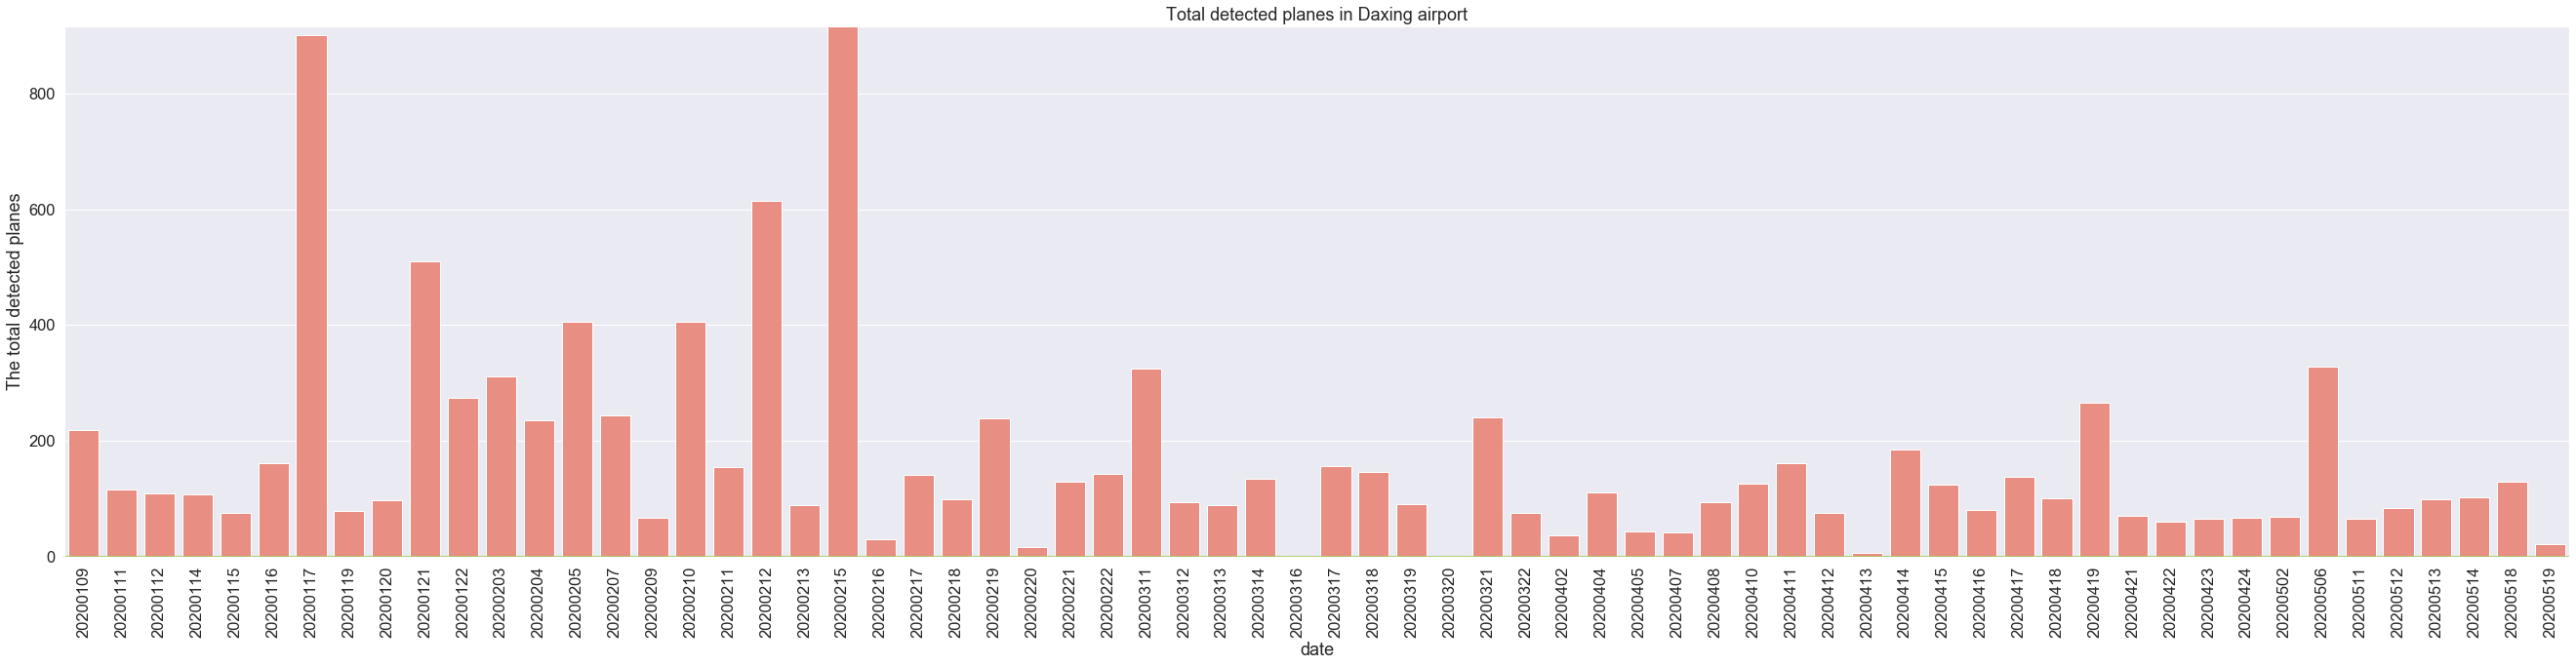

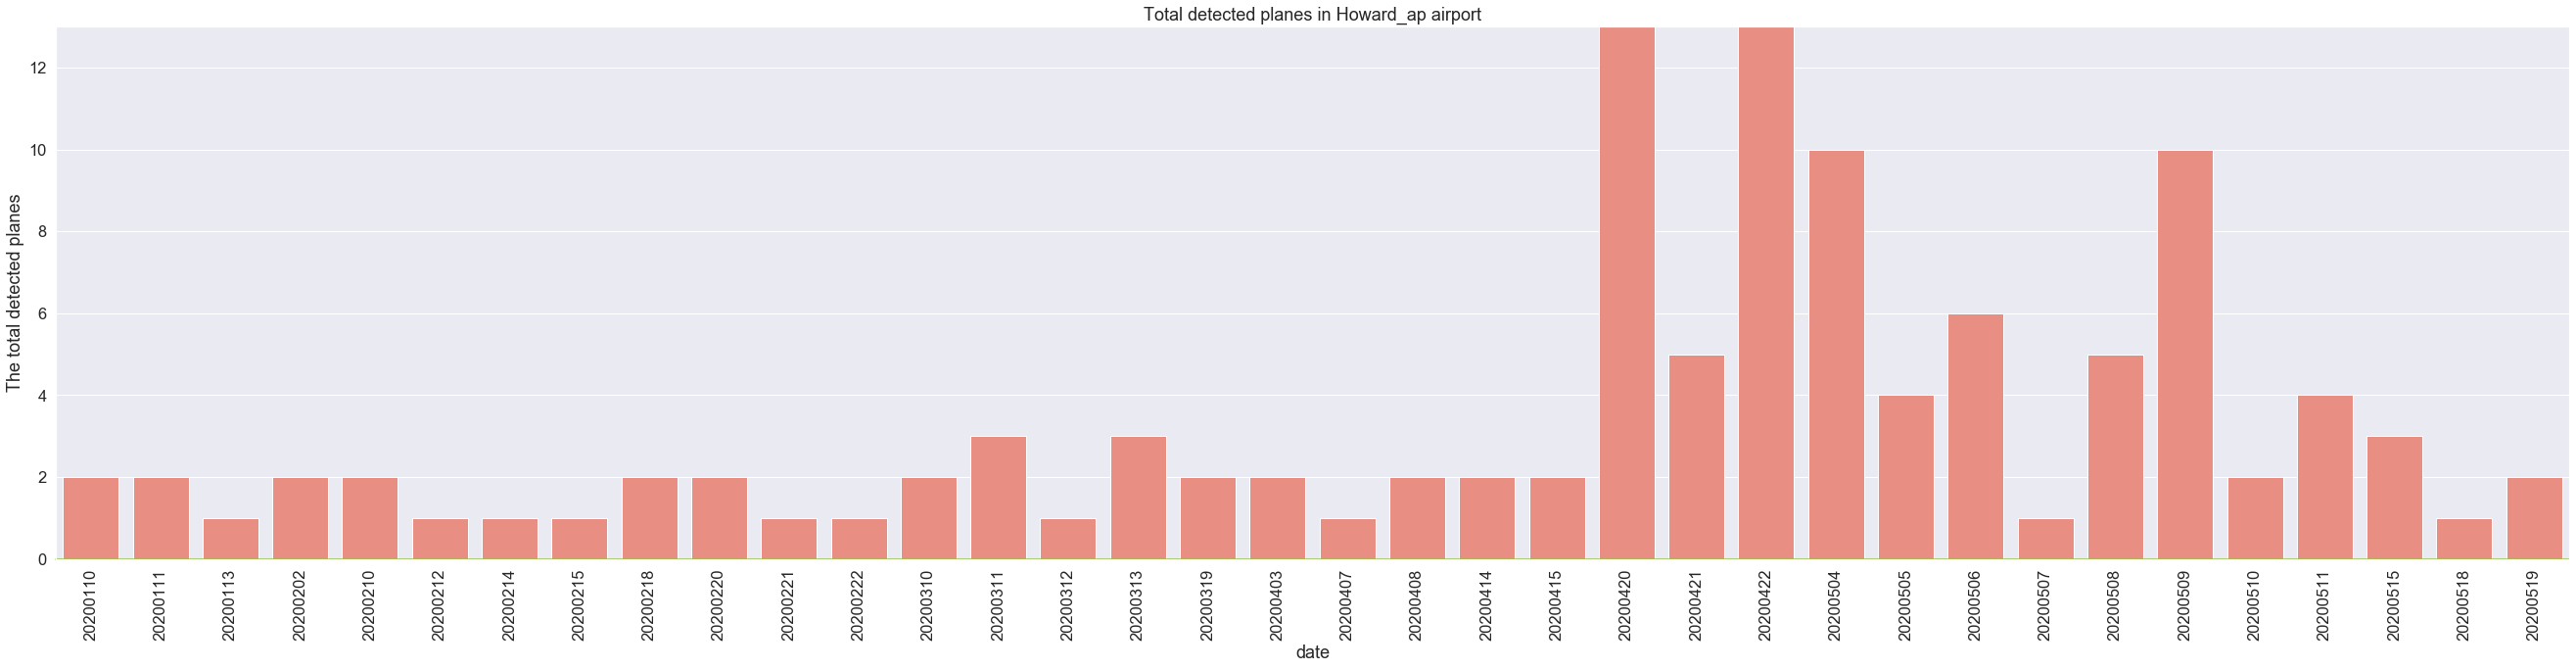

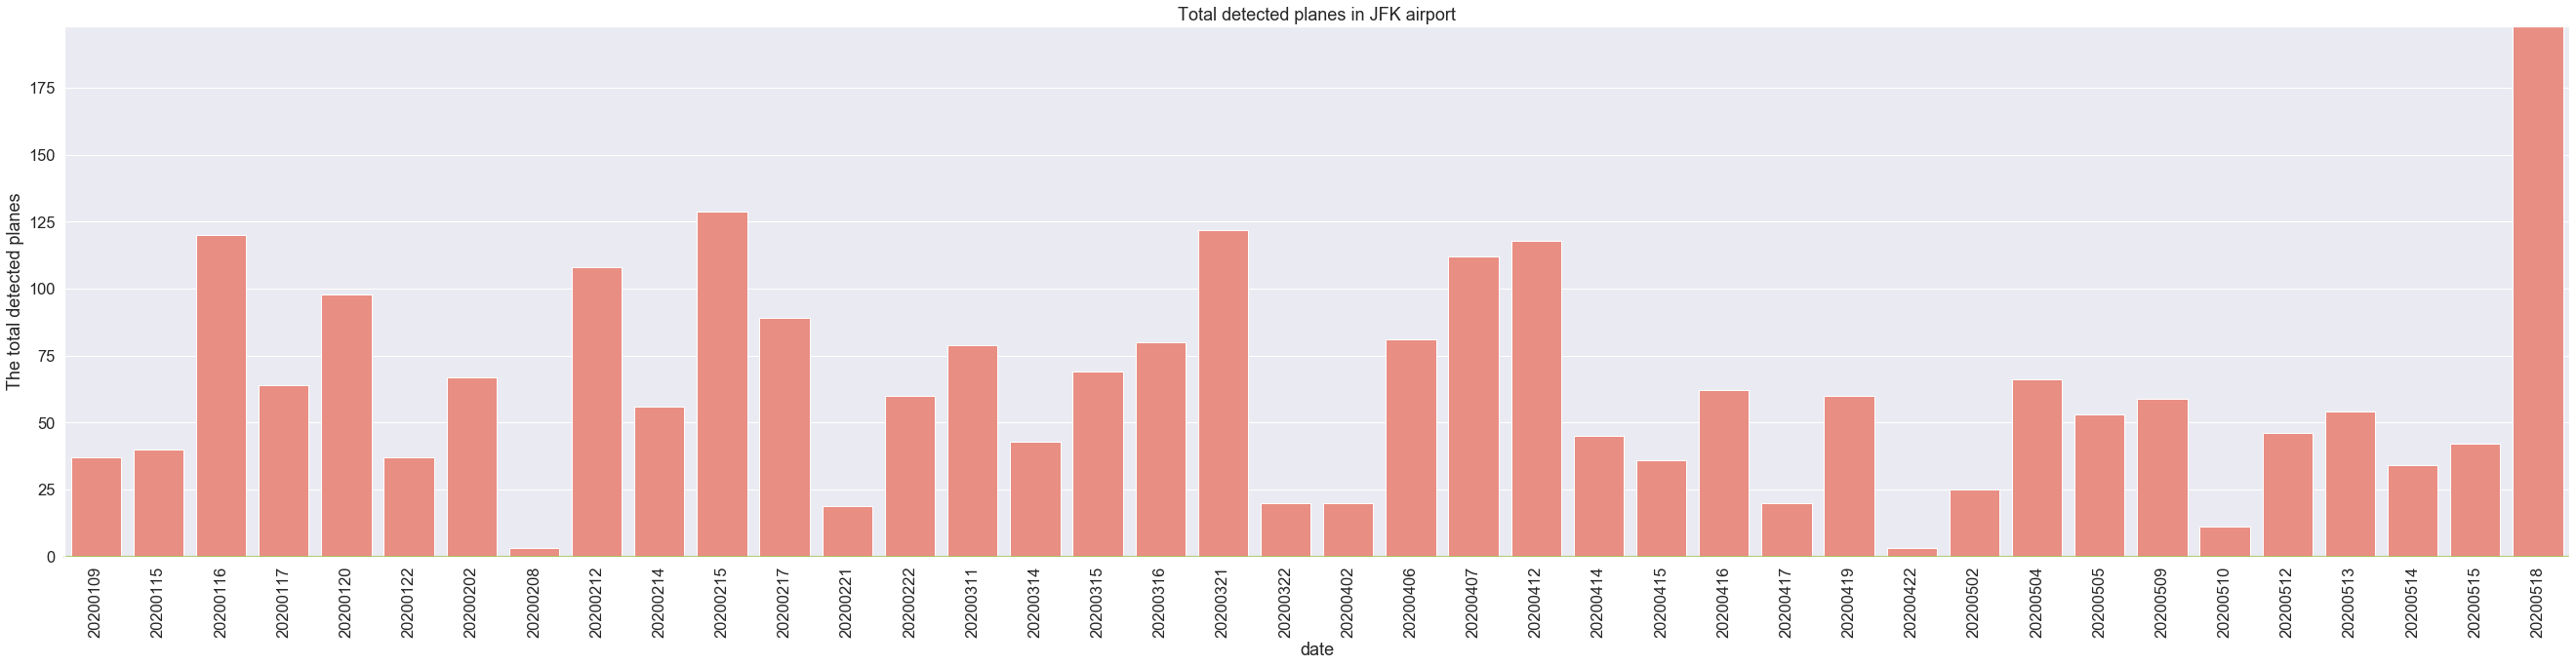

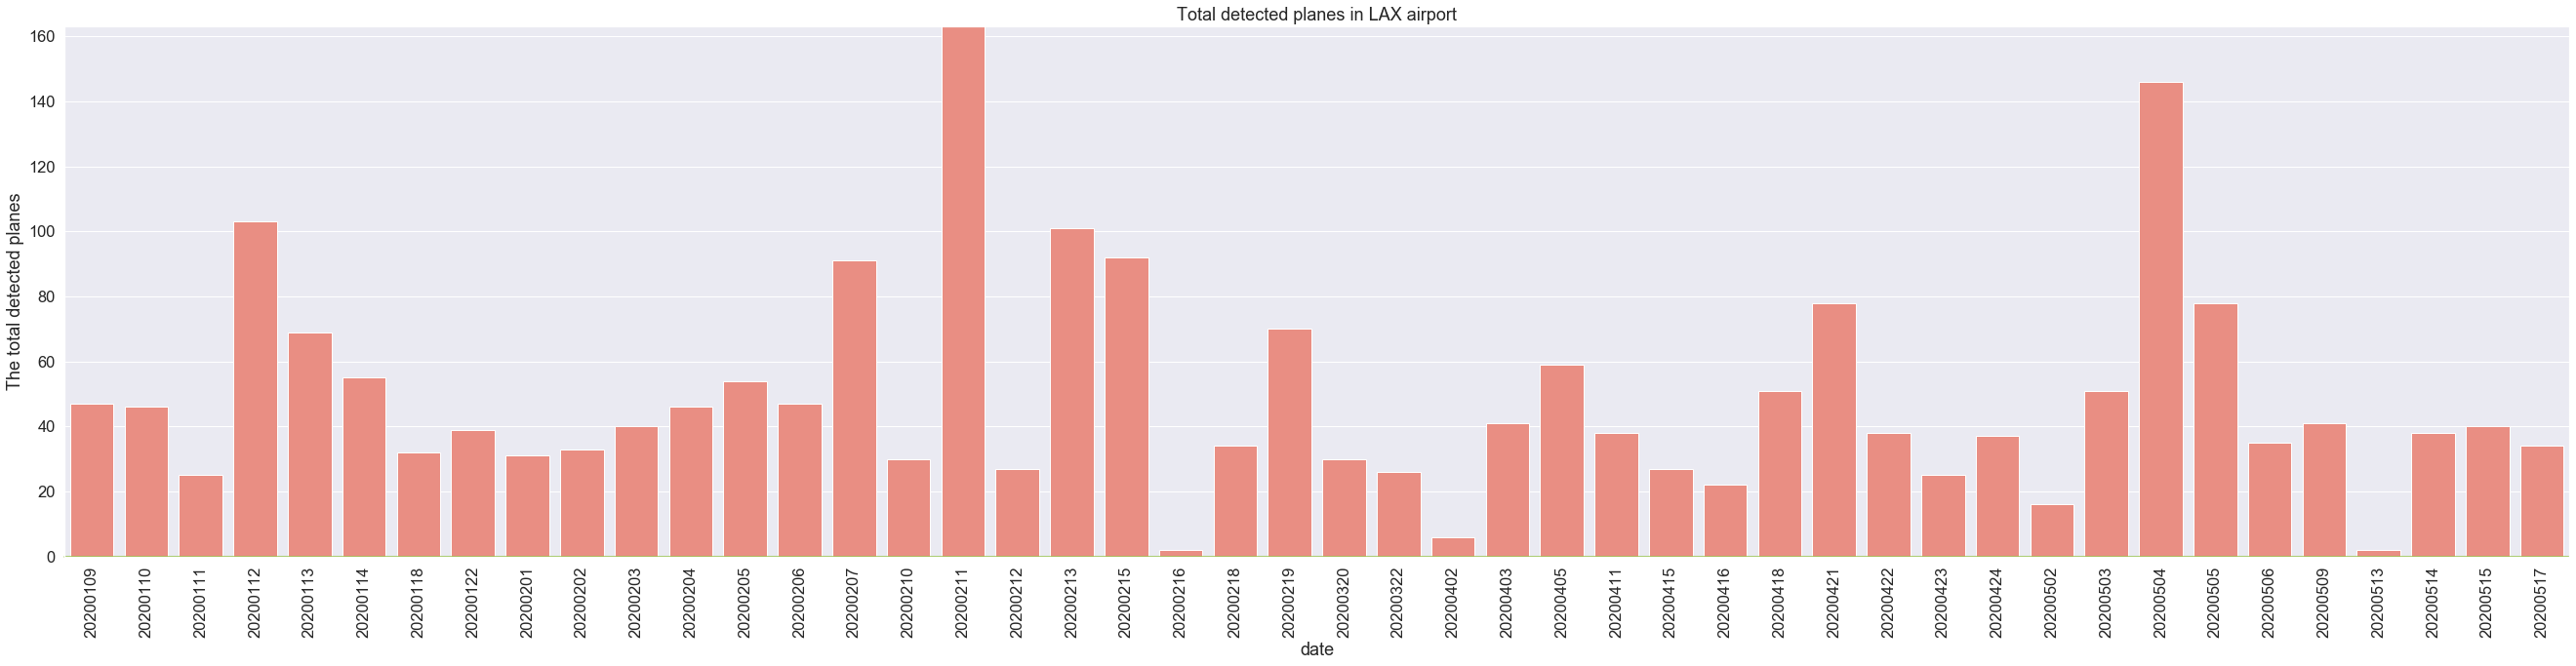

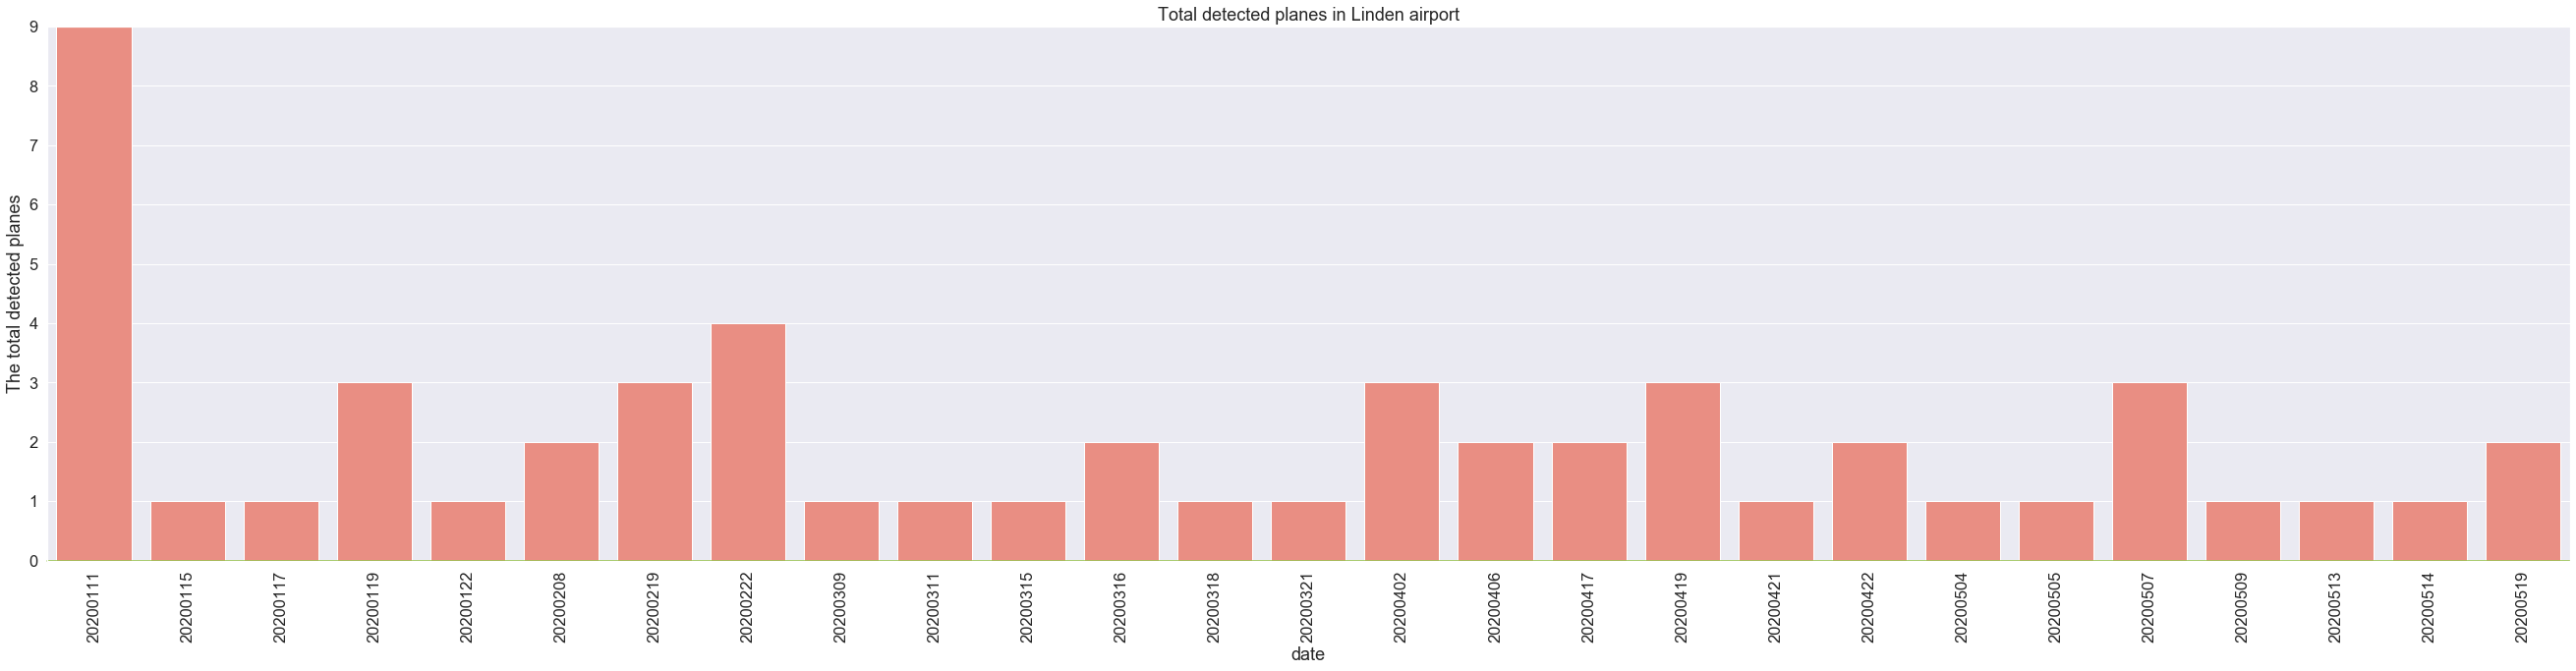

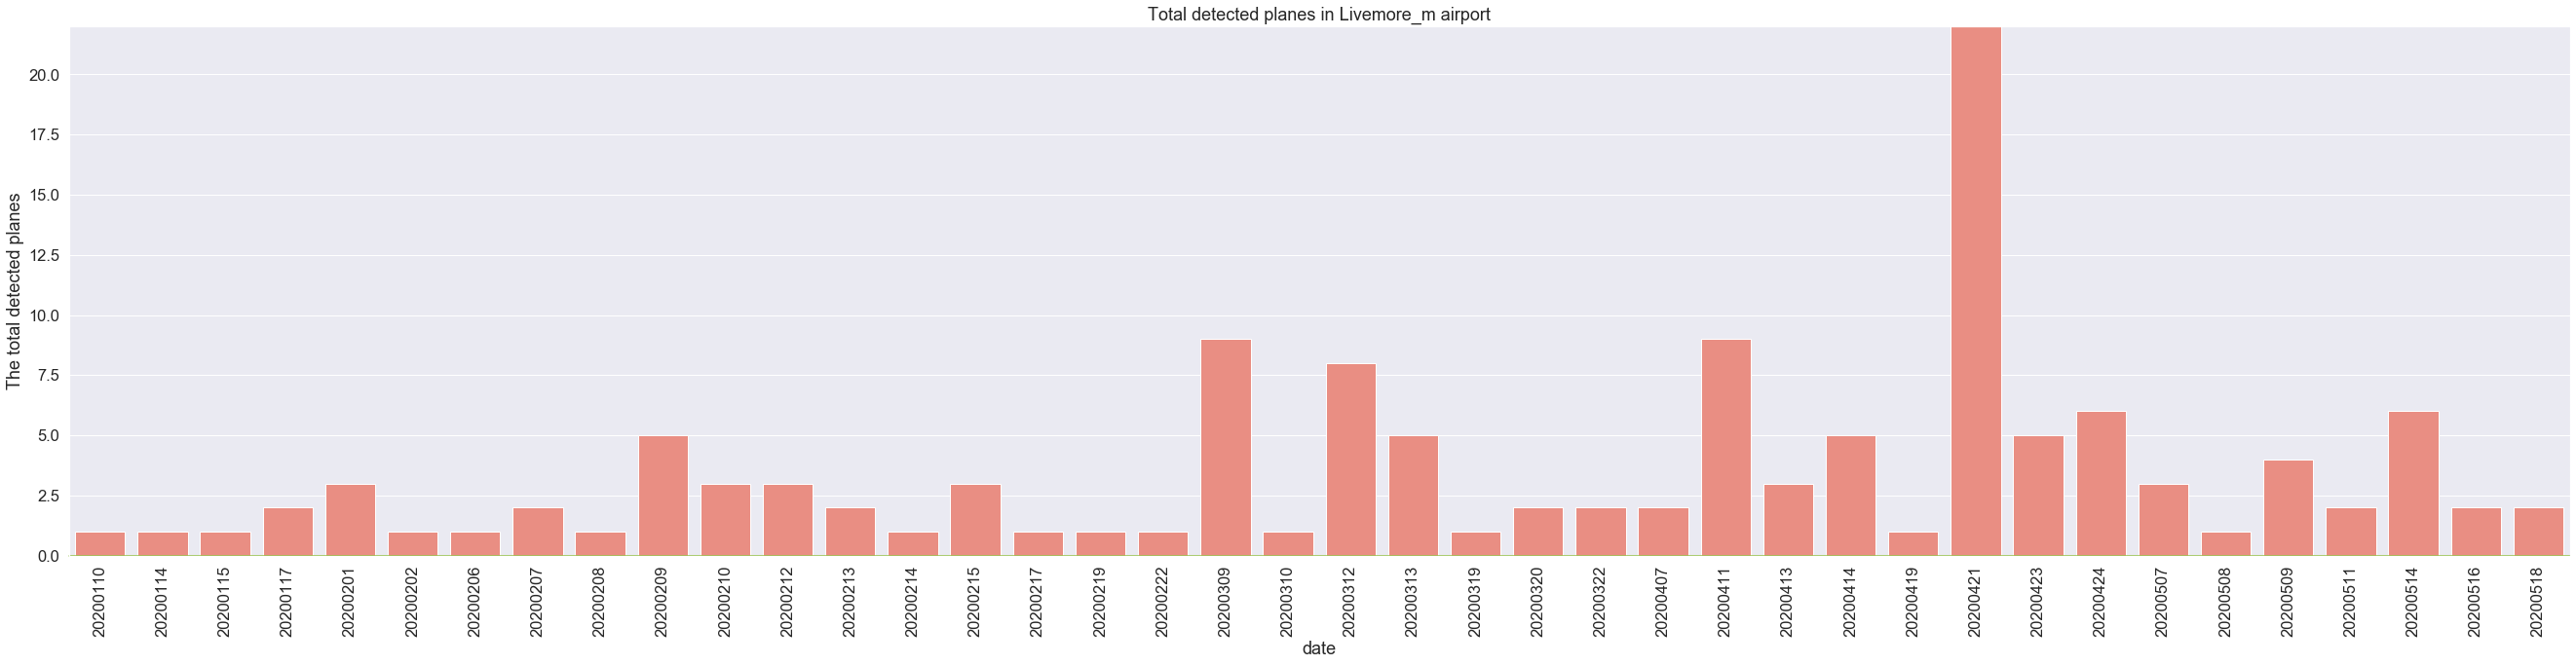

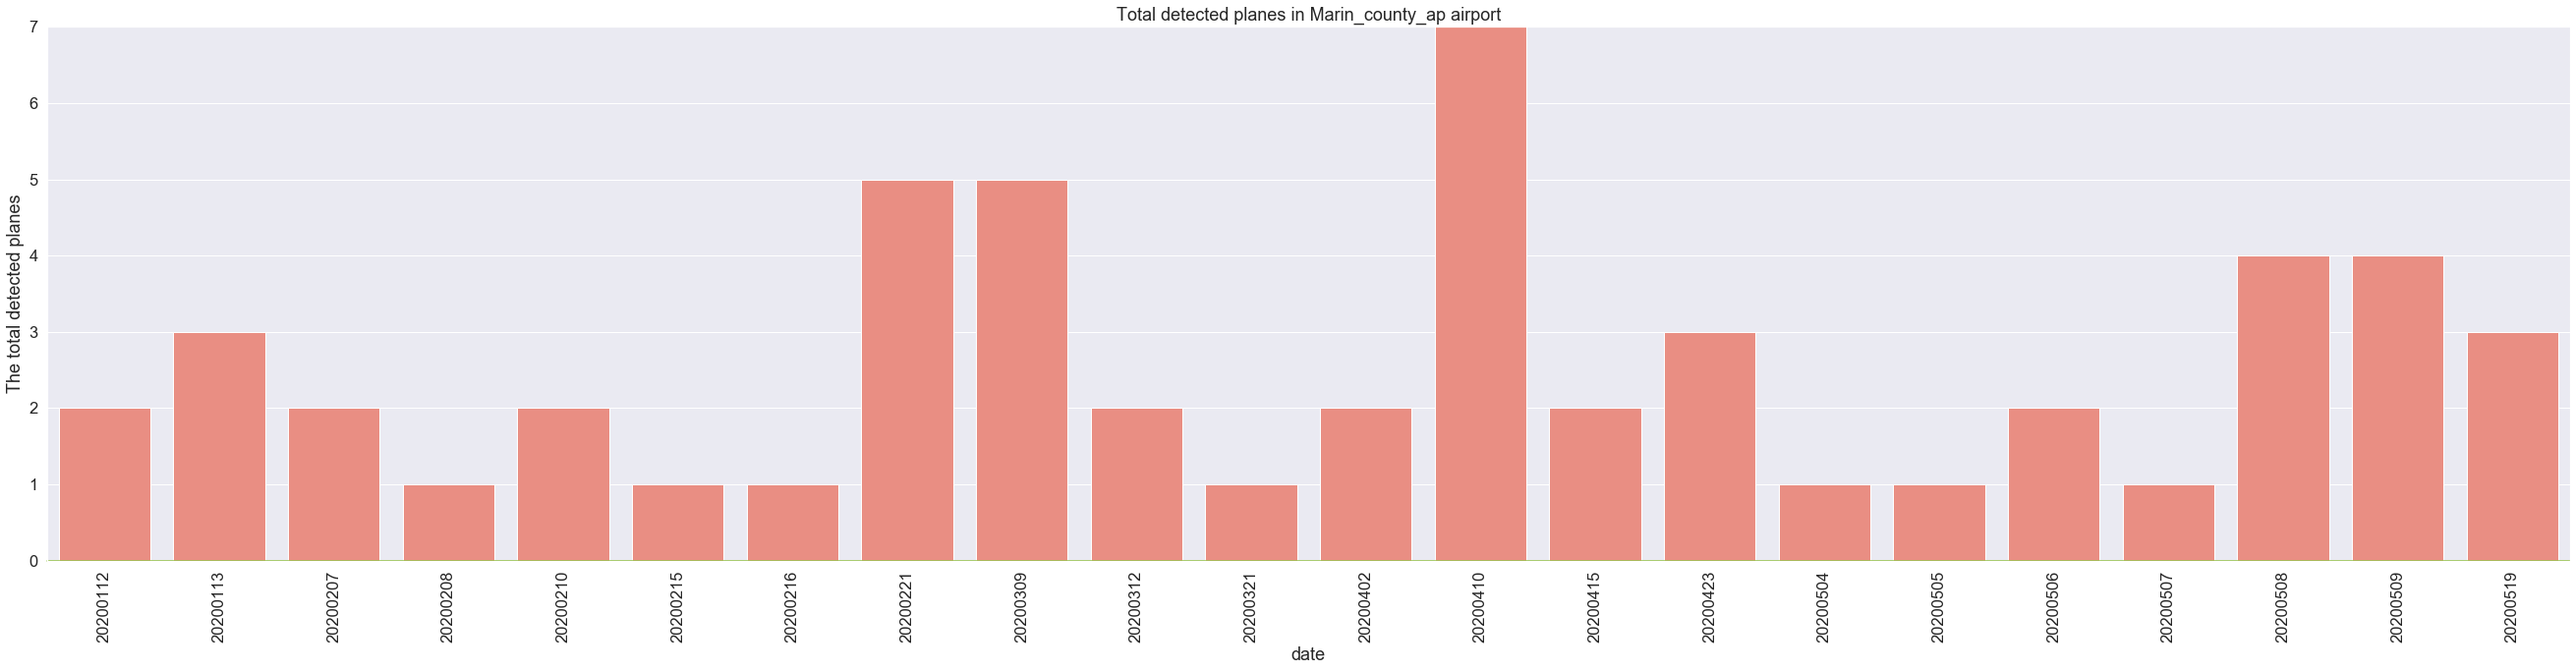

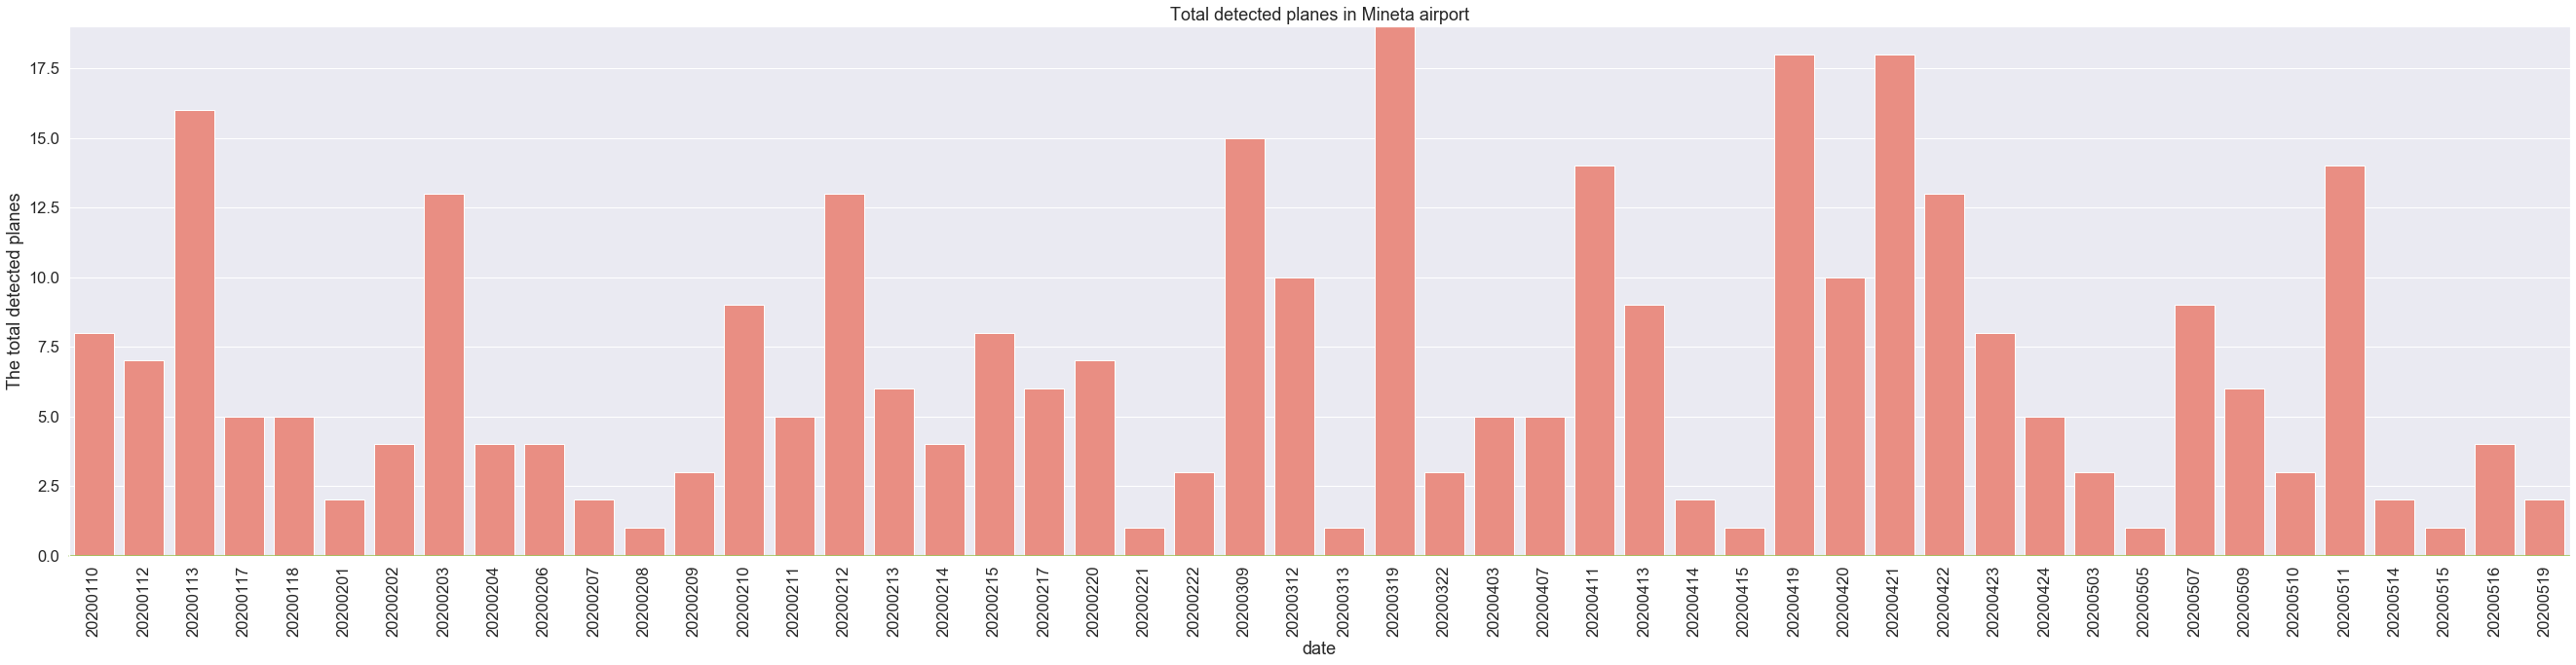

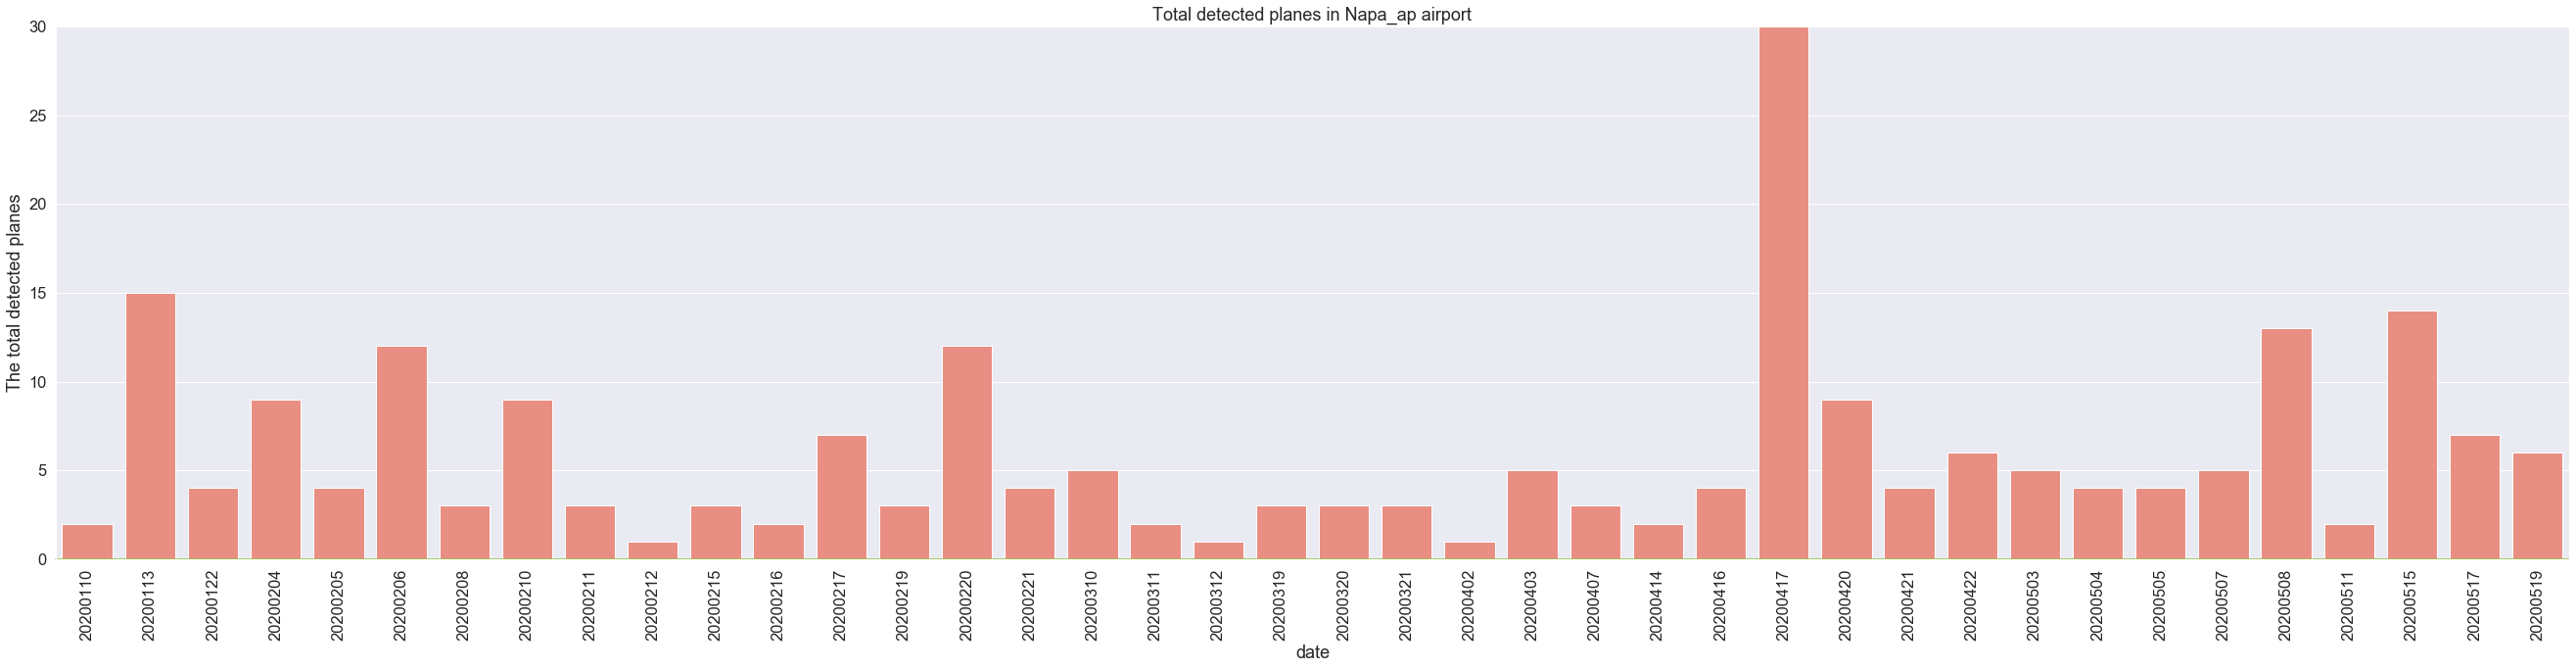

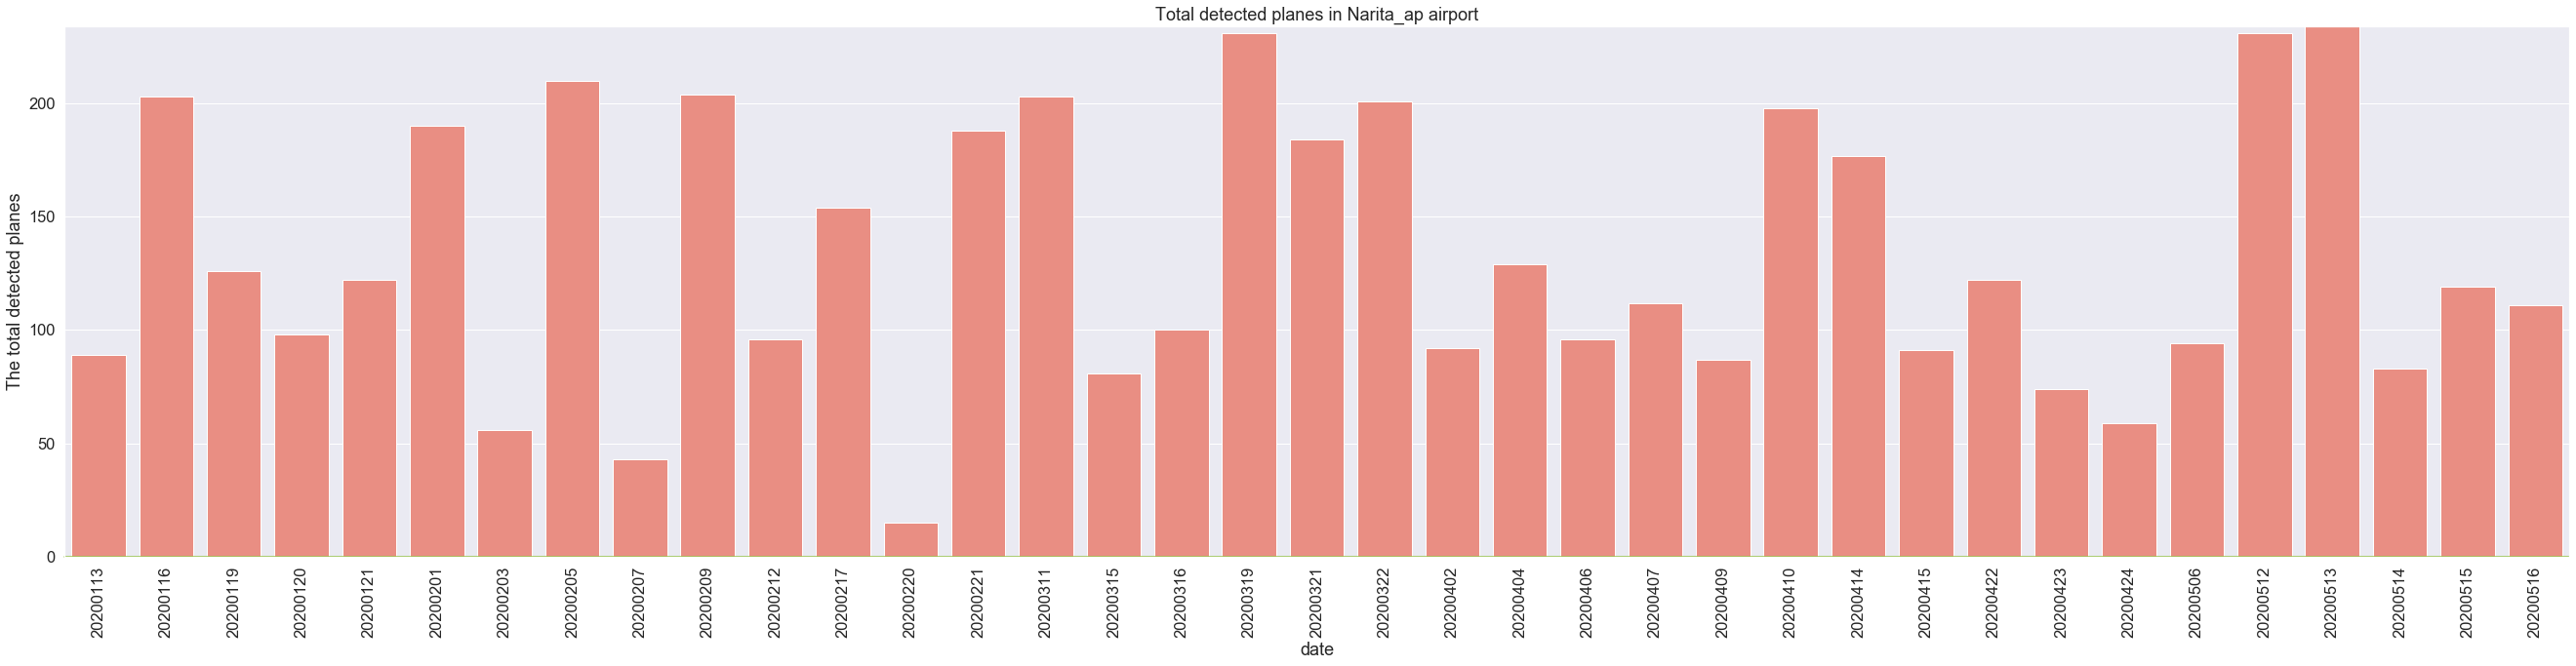

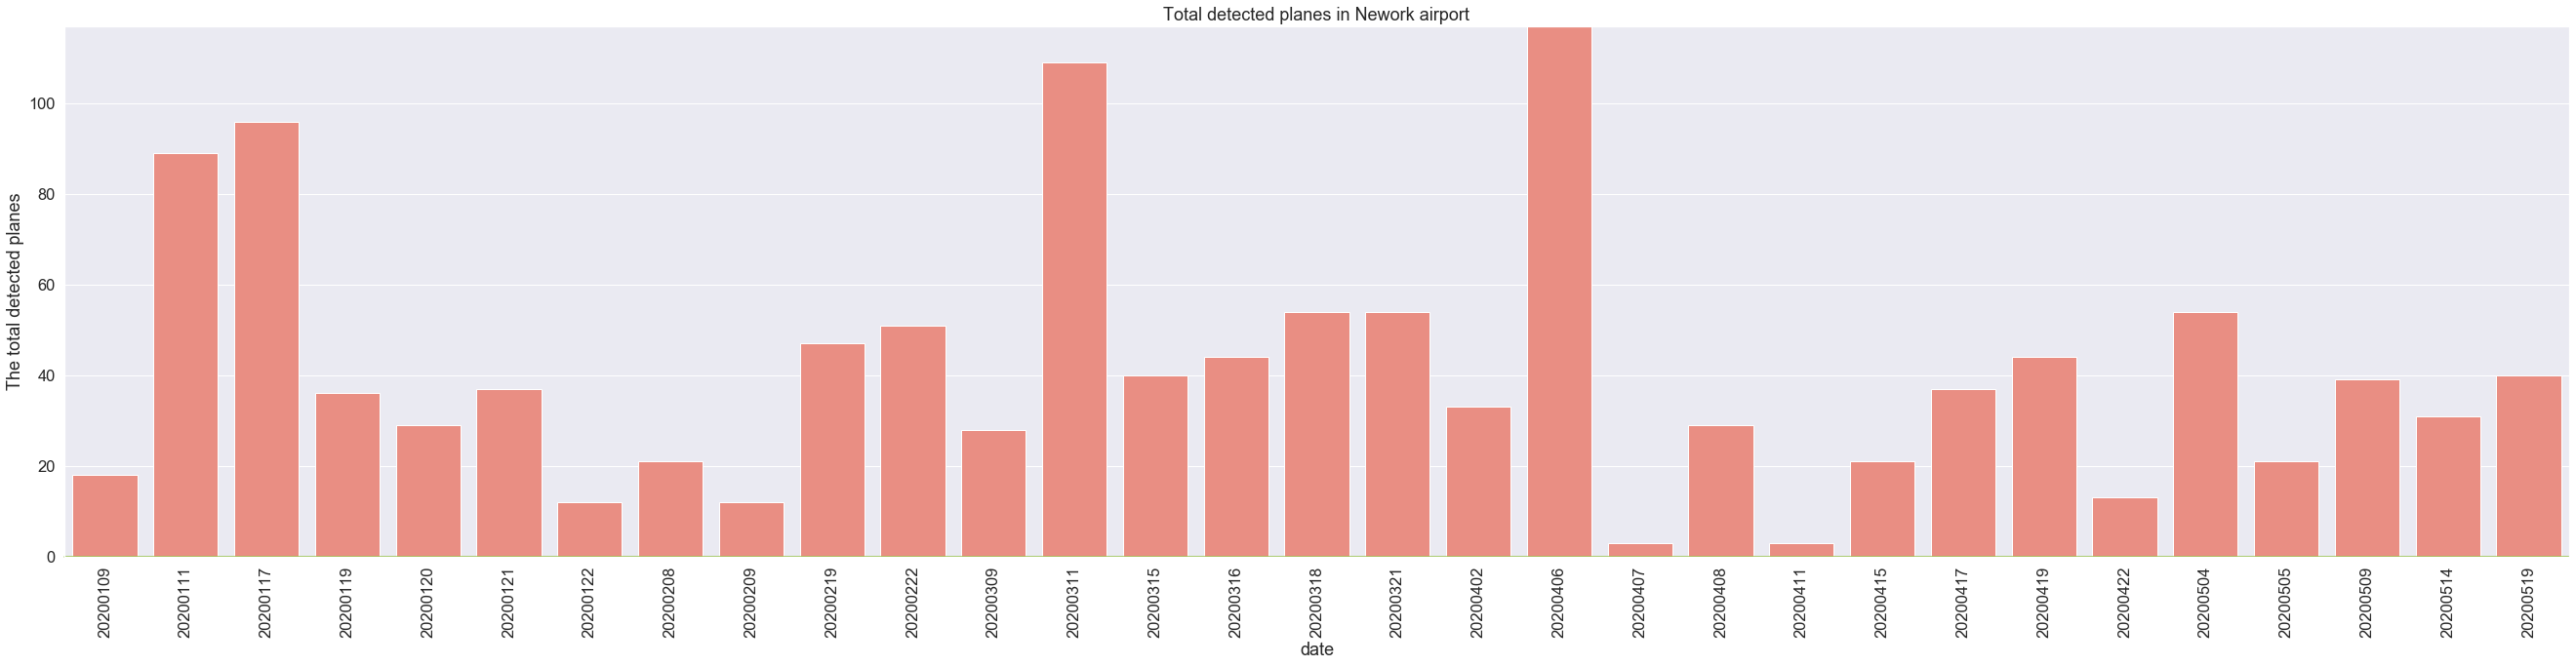

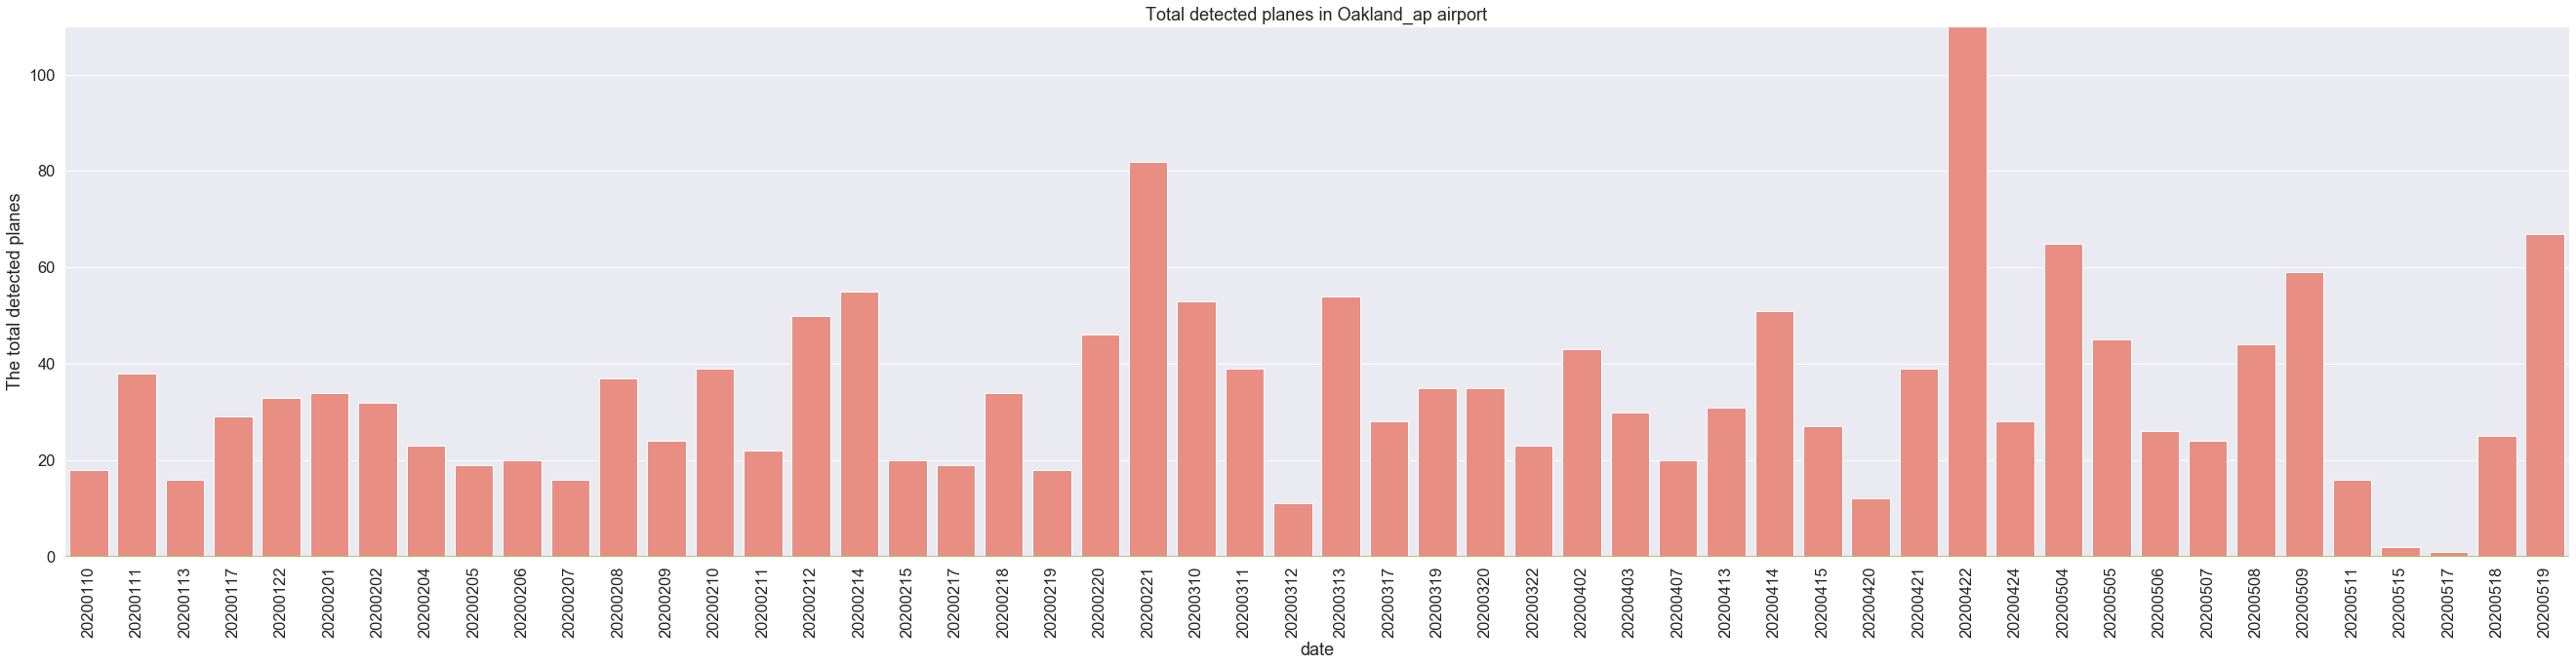

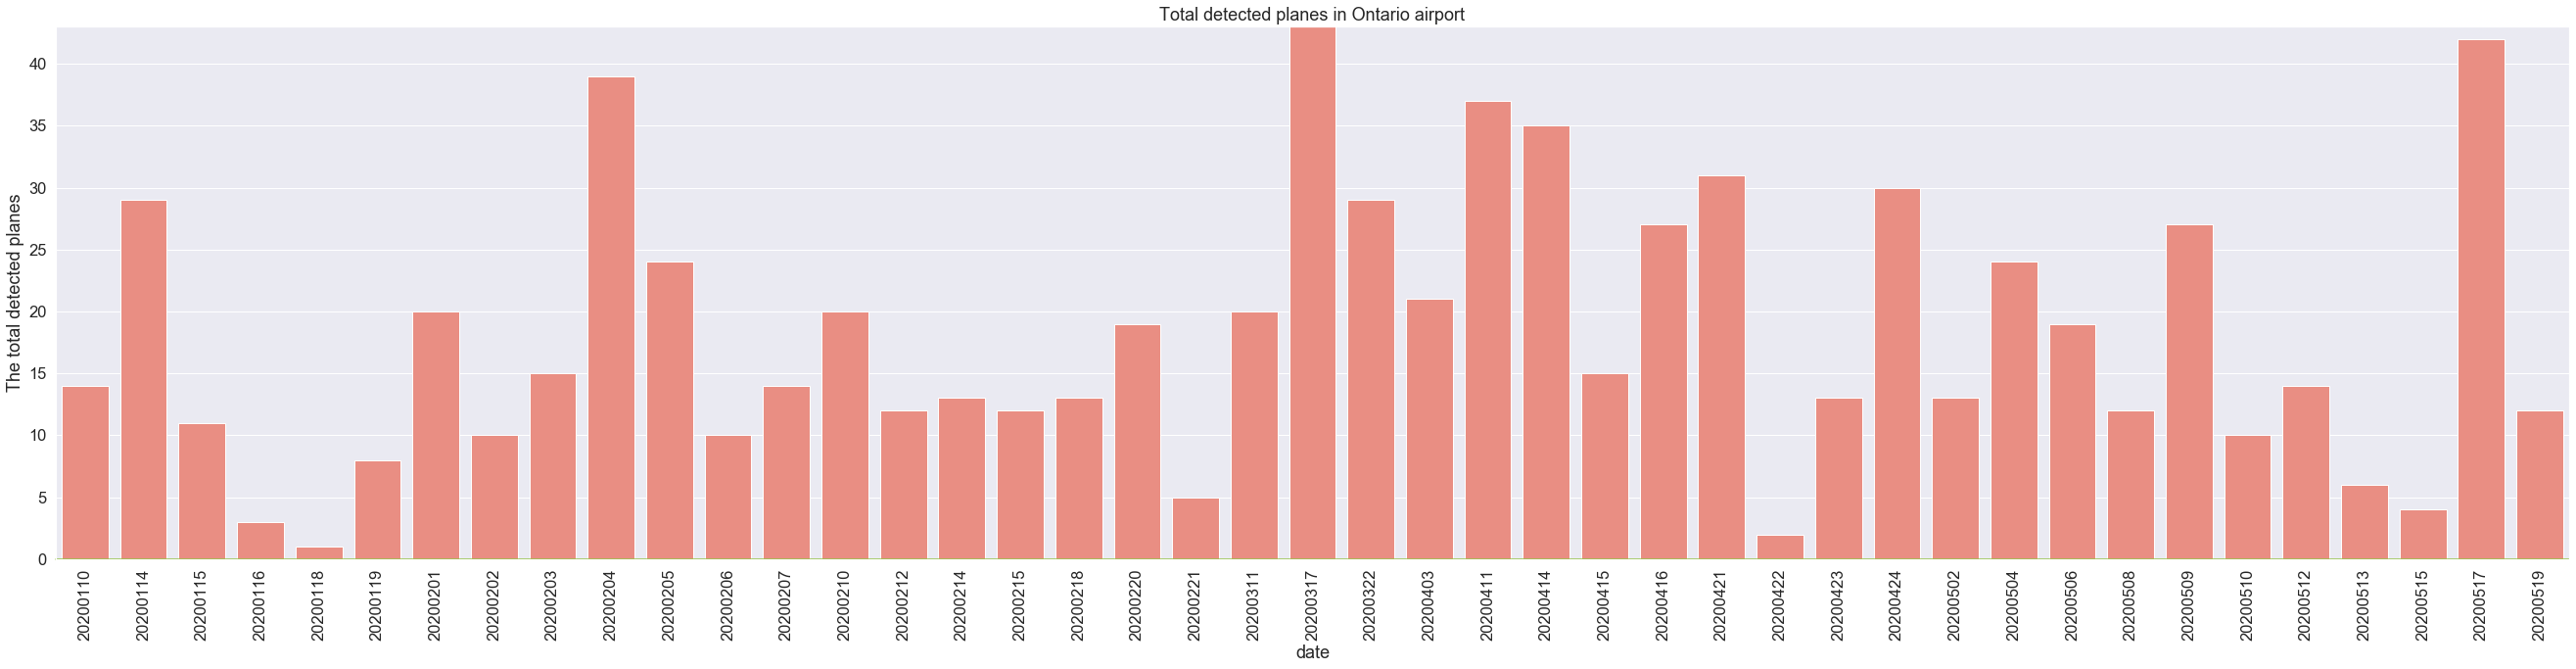

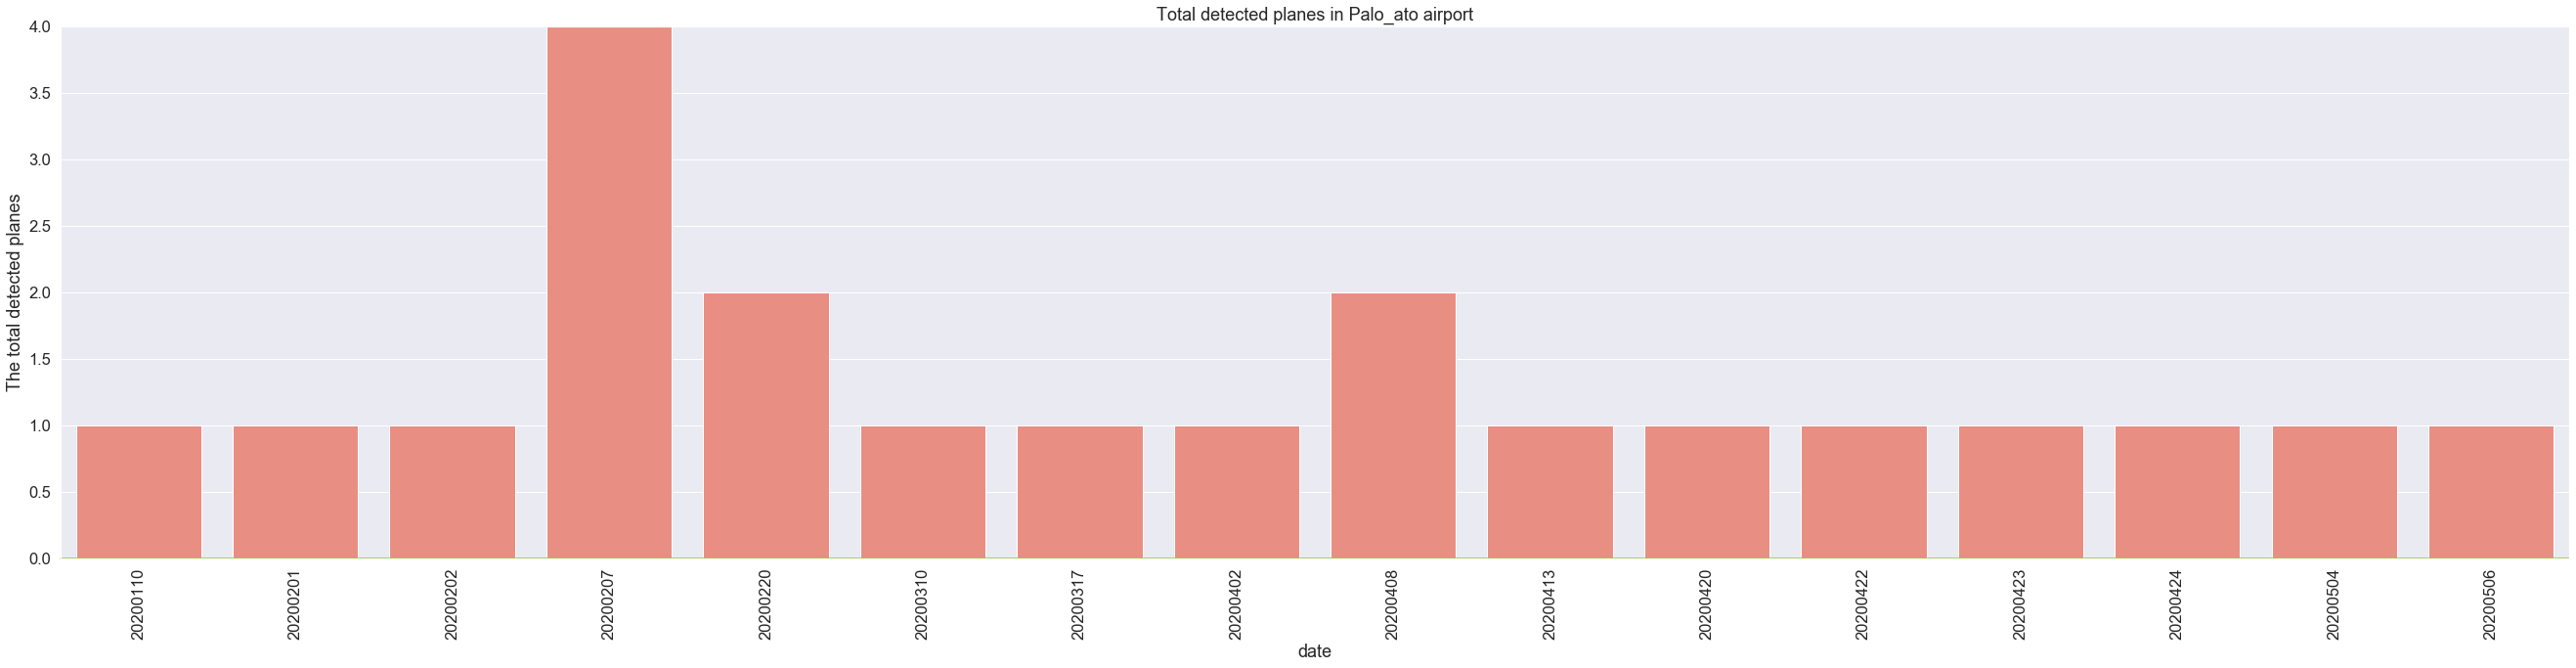

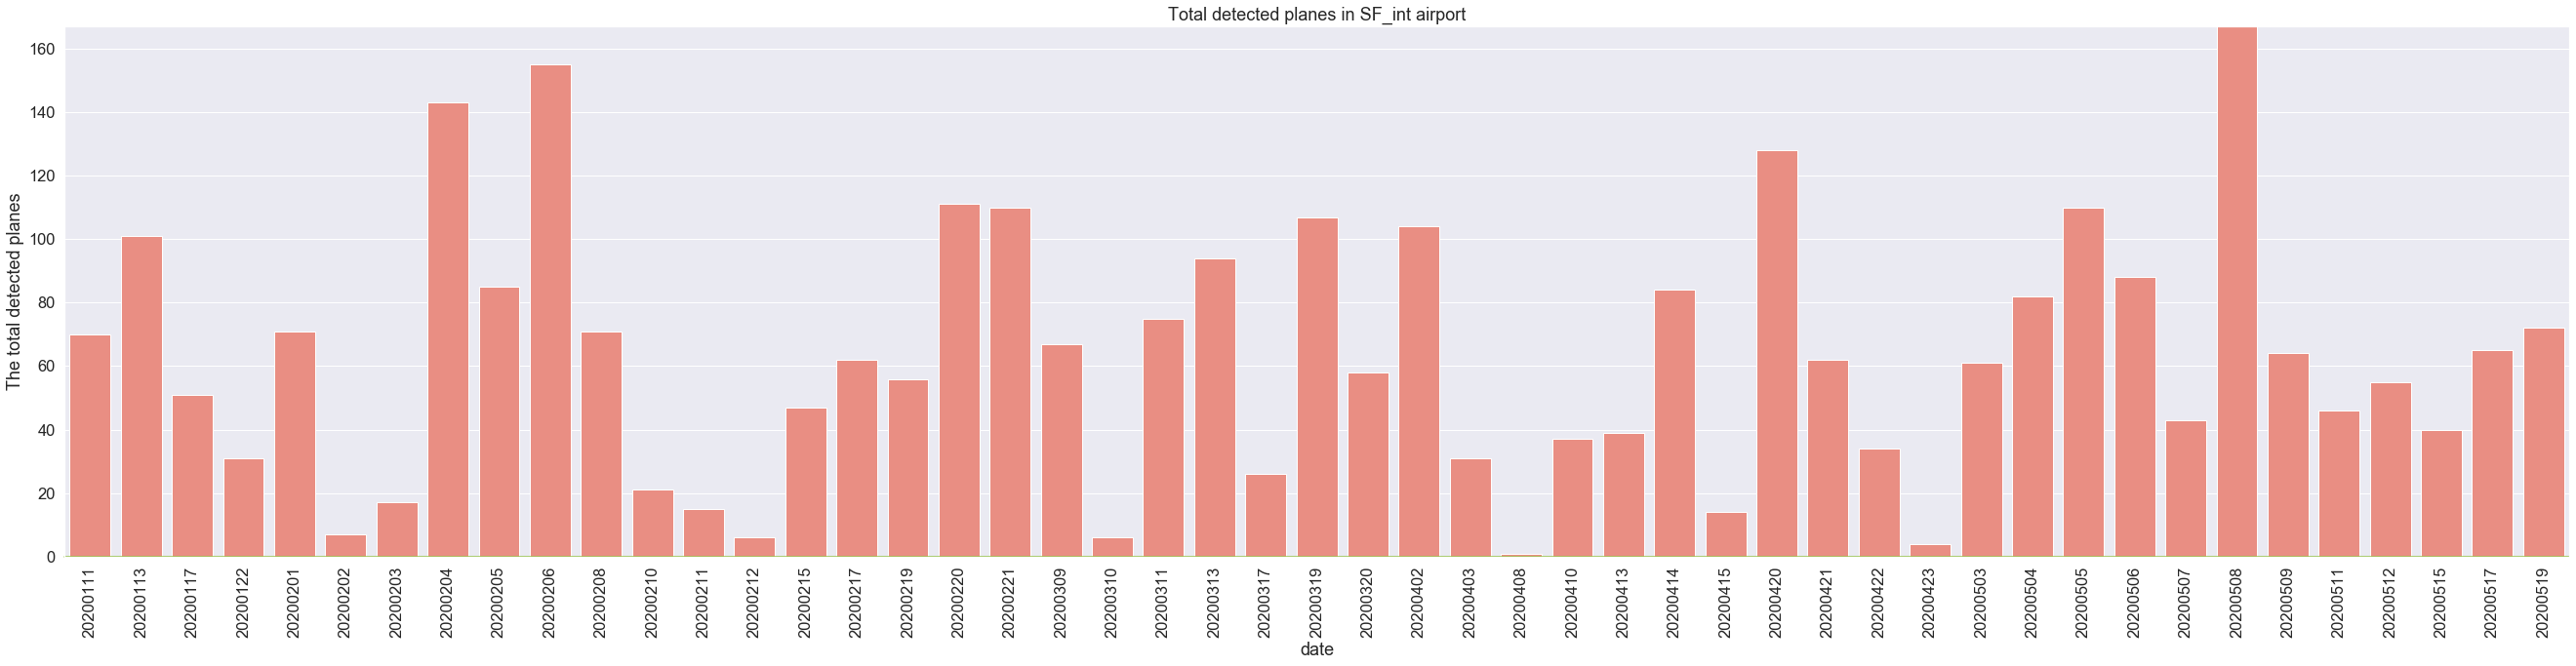

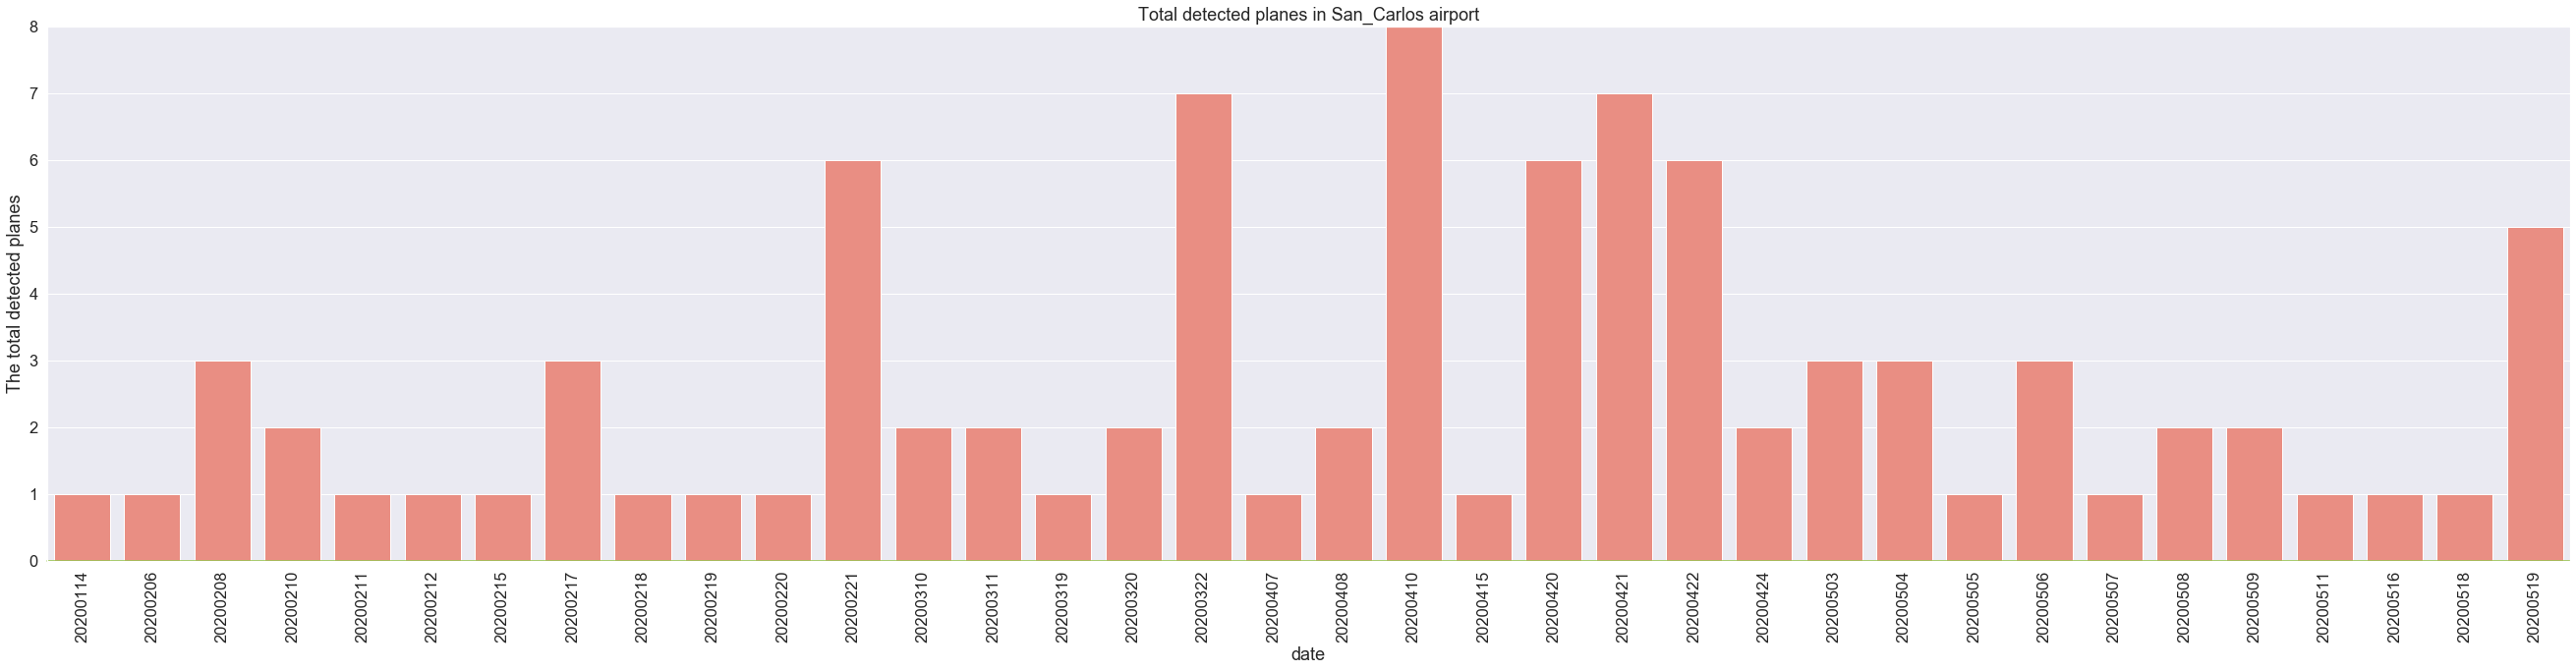

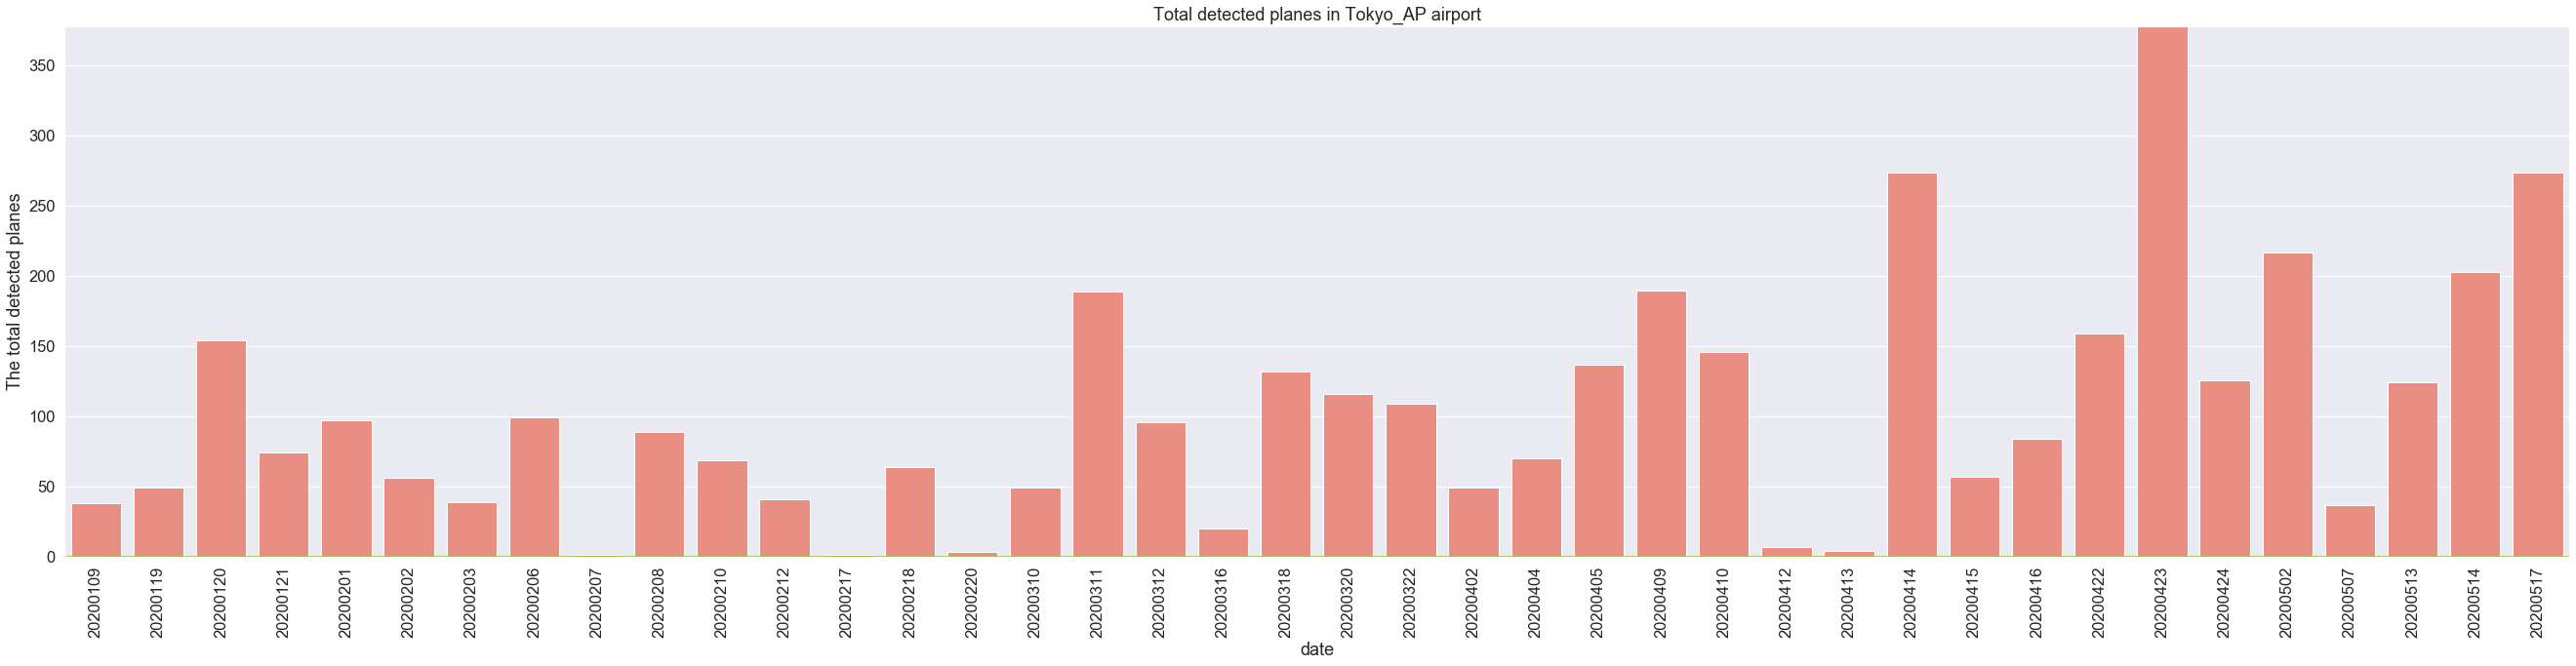

In [25]:
for airport in np.unique(np.array(airports['label'])):
    plot_pss_stas_aoi(airport, detections_airports)

In [26]:
def plot_pss_stas_aoi_hm(AOI, df):
    """ plot daily scenes per AOI
    """
    # Plot performance for all categories

    fig, ax = plt.subplots(figsize=(46, 10))
    aoi_df = df[df['label']==AOI]
    aoi_aggred = aoi_df.groupby('date').agg('count')
    
    aoi_aggred['date_'] = aoi_aggred.index
    
    aoi_aggred['date_halfM'] = aoi_aggred['date_'].apply(lambda x: format_date(x))
    aoi_aggred = aoi_aggred.groupby('date_halfM').agg('mean')
    aoi_aggred['half_month'] = aoi_aggred.index
   

    sort_df = aoi_aggred.sort_values(by='half_month', ascending=True)
    x_names = list(sort_df['half_month'])
    y_vals = list(sort_df['tile'])

    sns_plot = sns.barplot(x=x_names, y=y_vals, palette="rocket", ax=ax)

    current_palette = matplotlib.colors.hex2color('#86b92e')

    ax.axhline(0, color=current_palette, clip_on=False)
    ax.set_ylim([0, max(sort_df['tile'])])
    ax.set_ylabel(f"The total detected planes")
    ax.set_xlabel("date")
    ax.set_title(f"Total detected planes in {AOI} airport")
    _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

    fig.savefig(f"Half_month_airport_{AOI}_total_planes_mean.png")

/Users/yizhuangfang/.virtualenvs/general_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


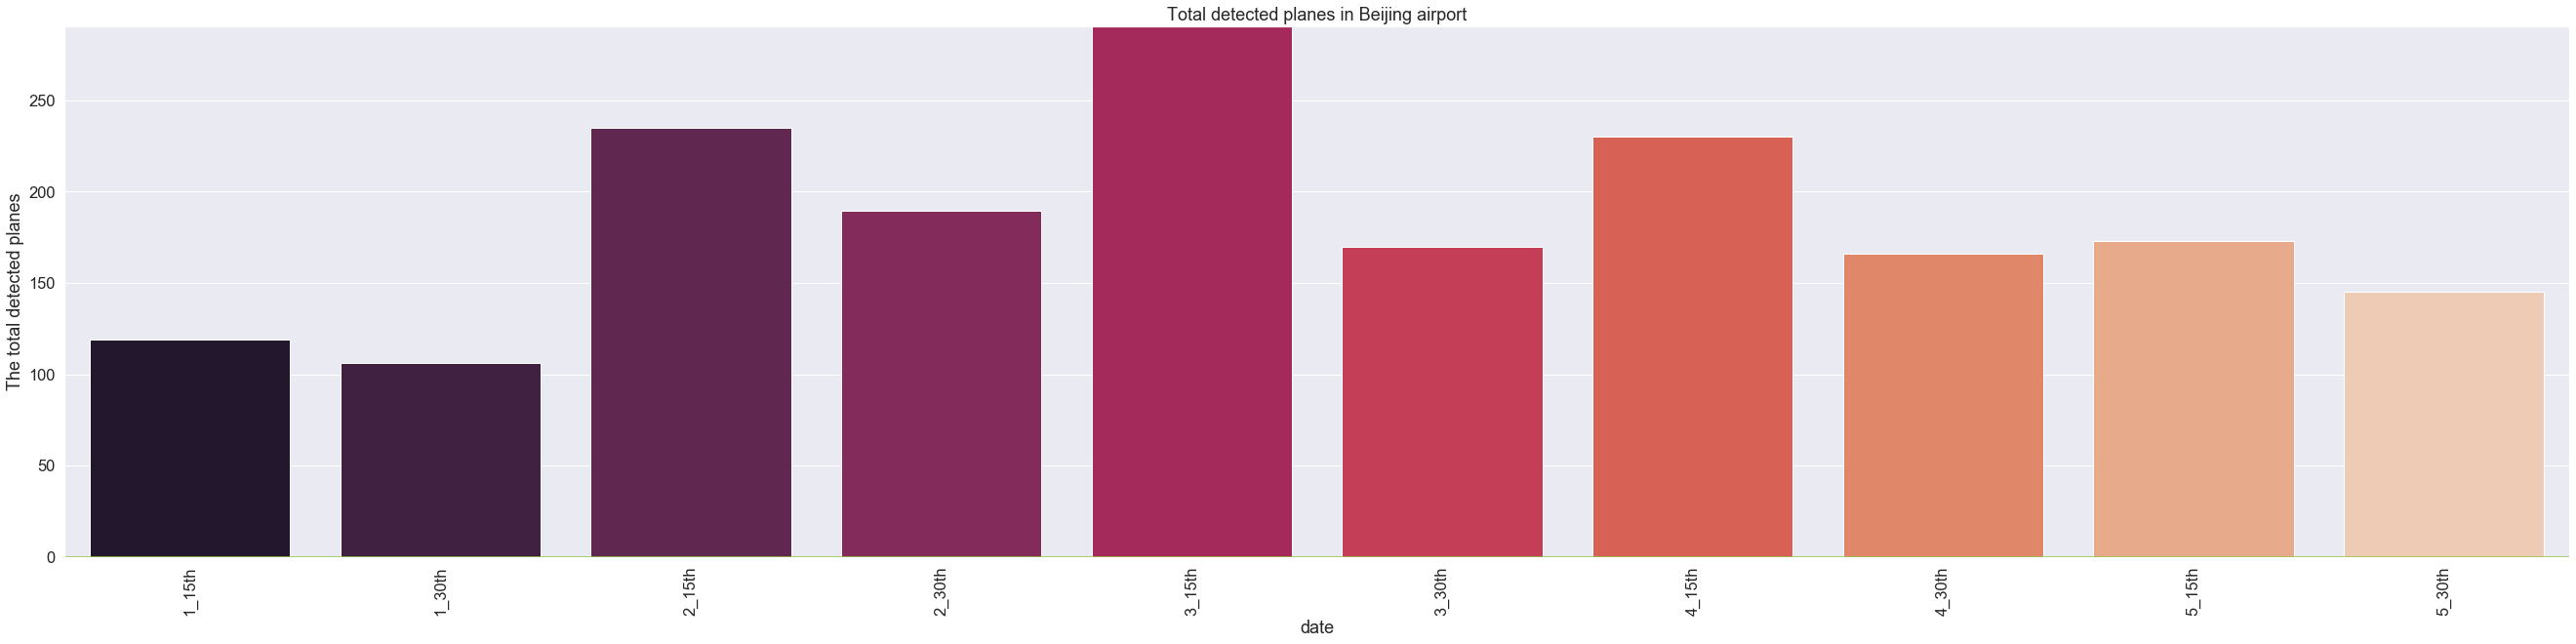

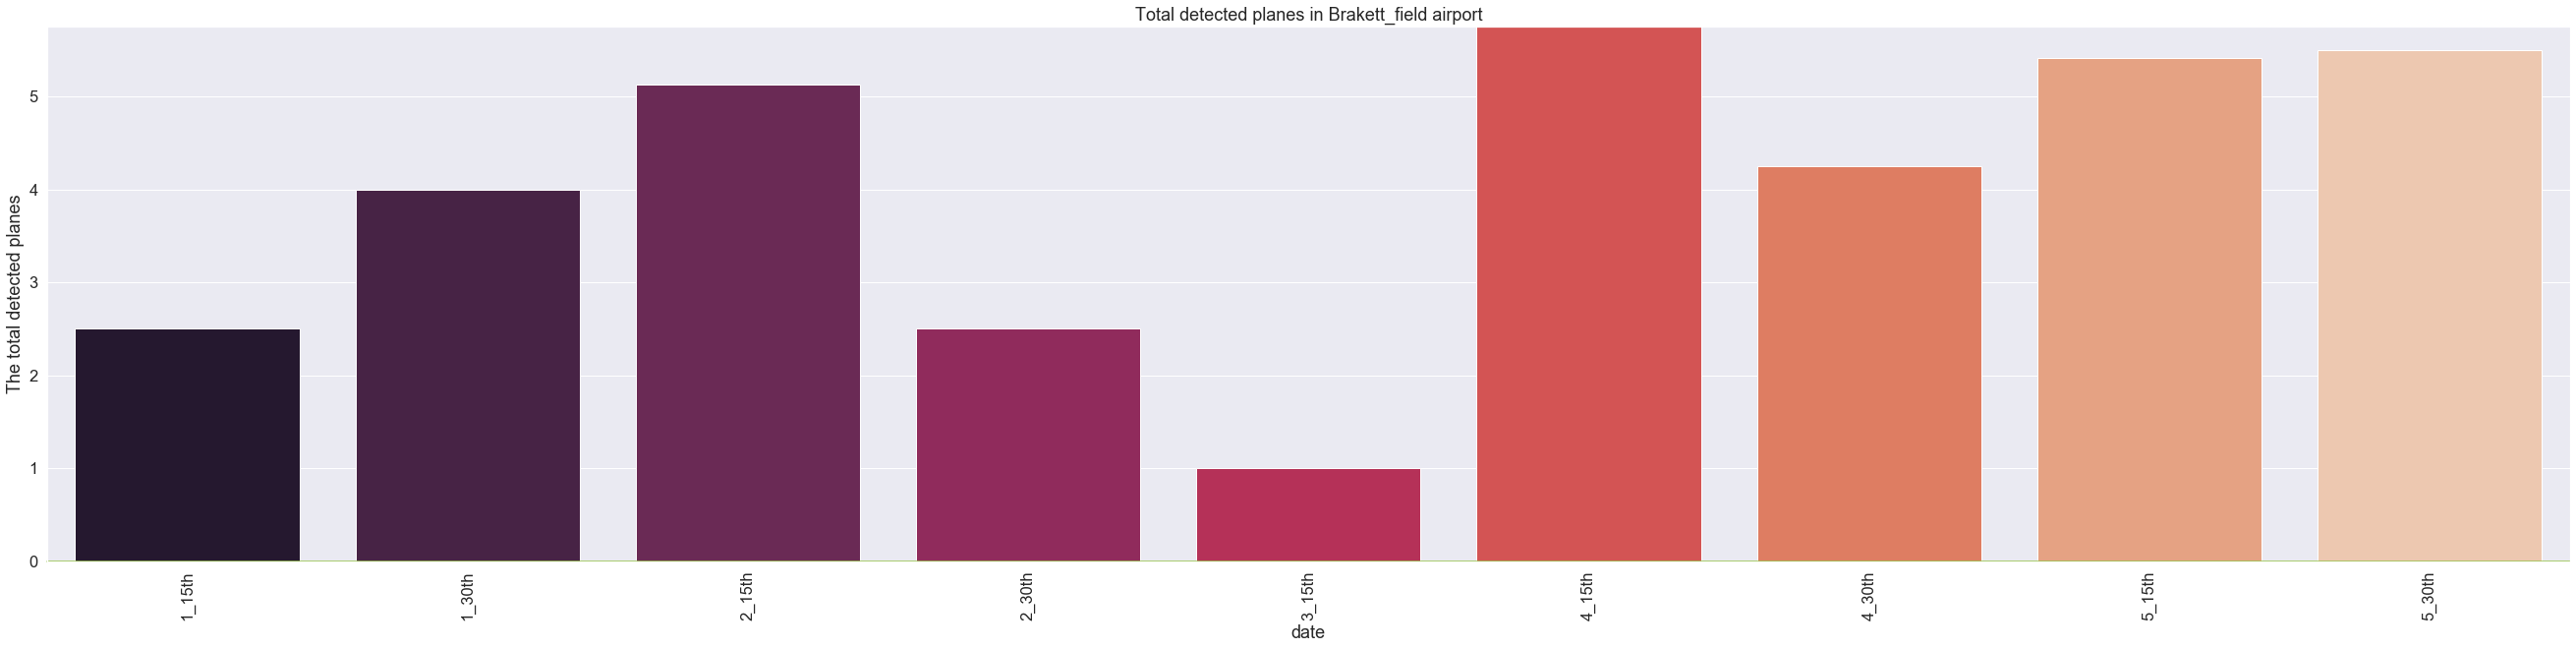

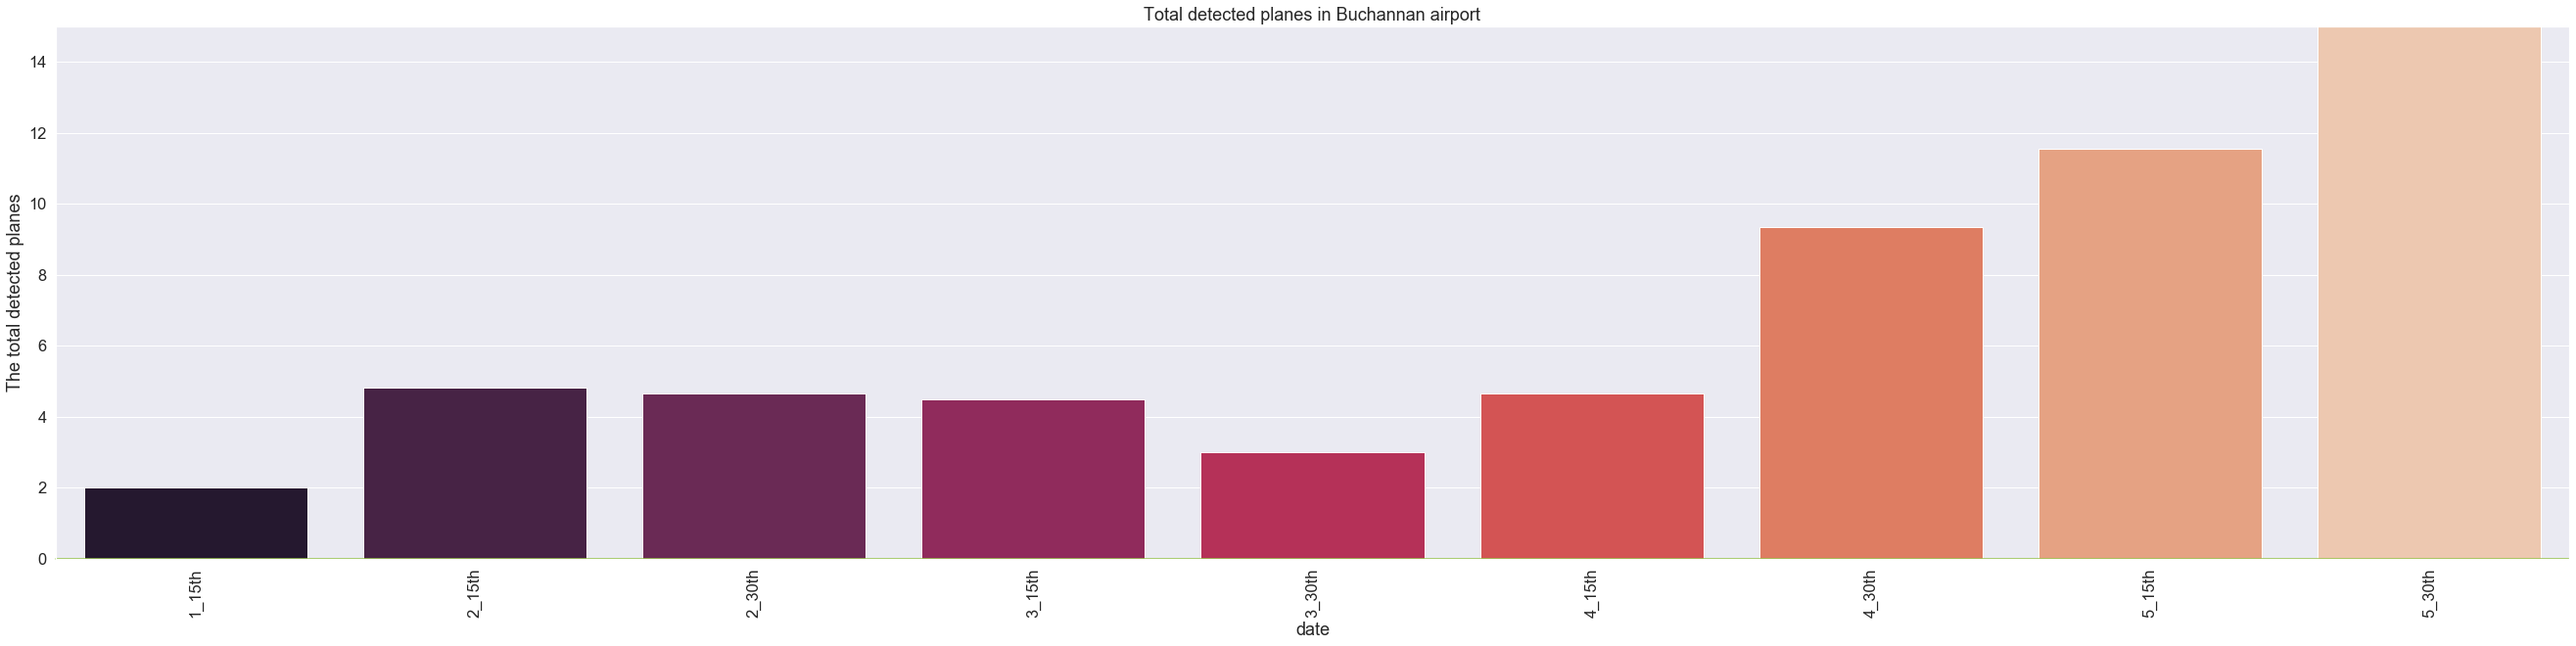

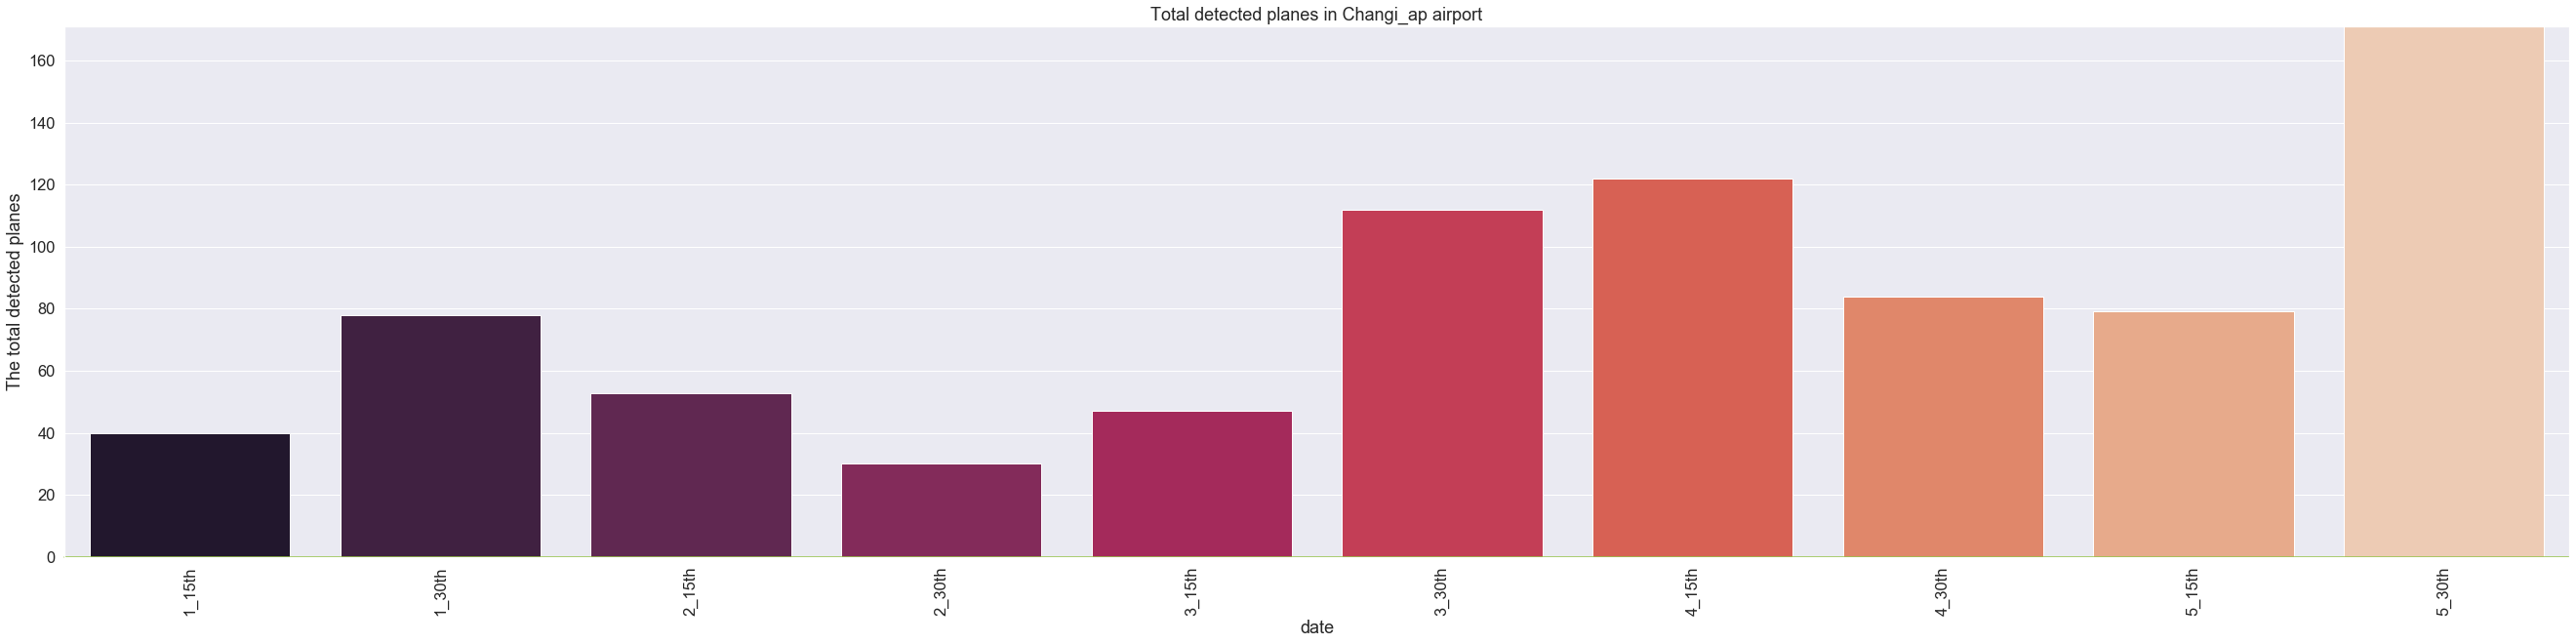

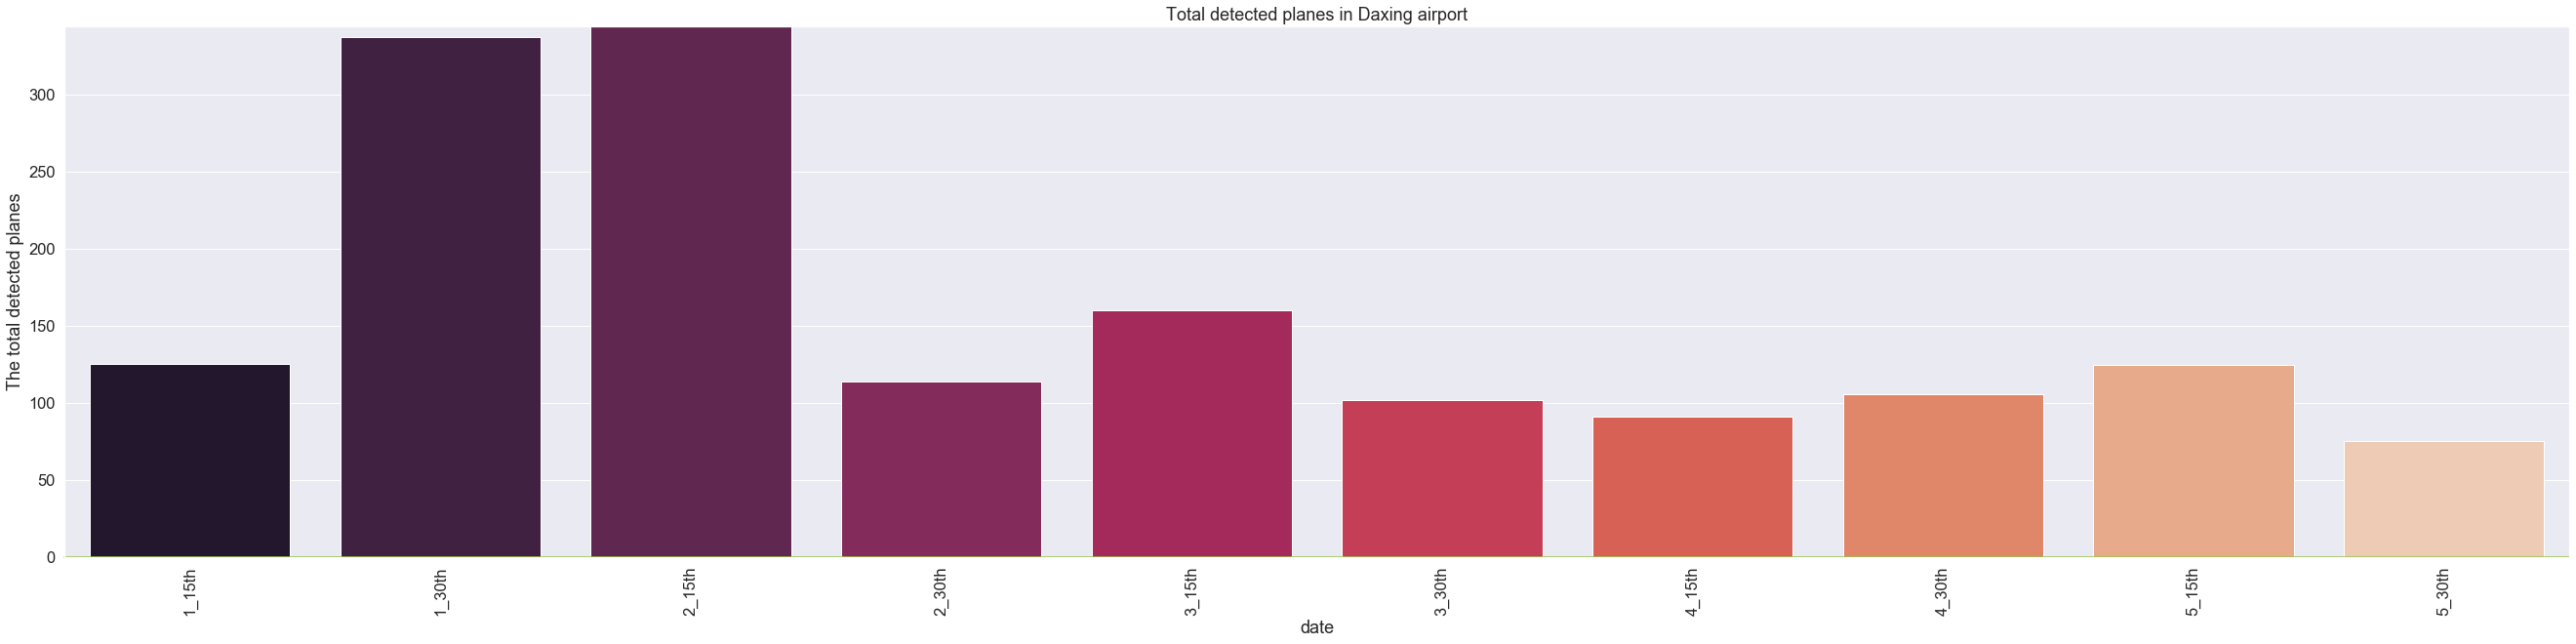

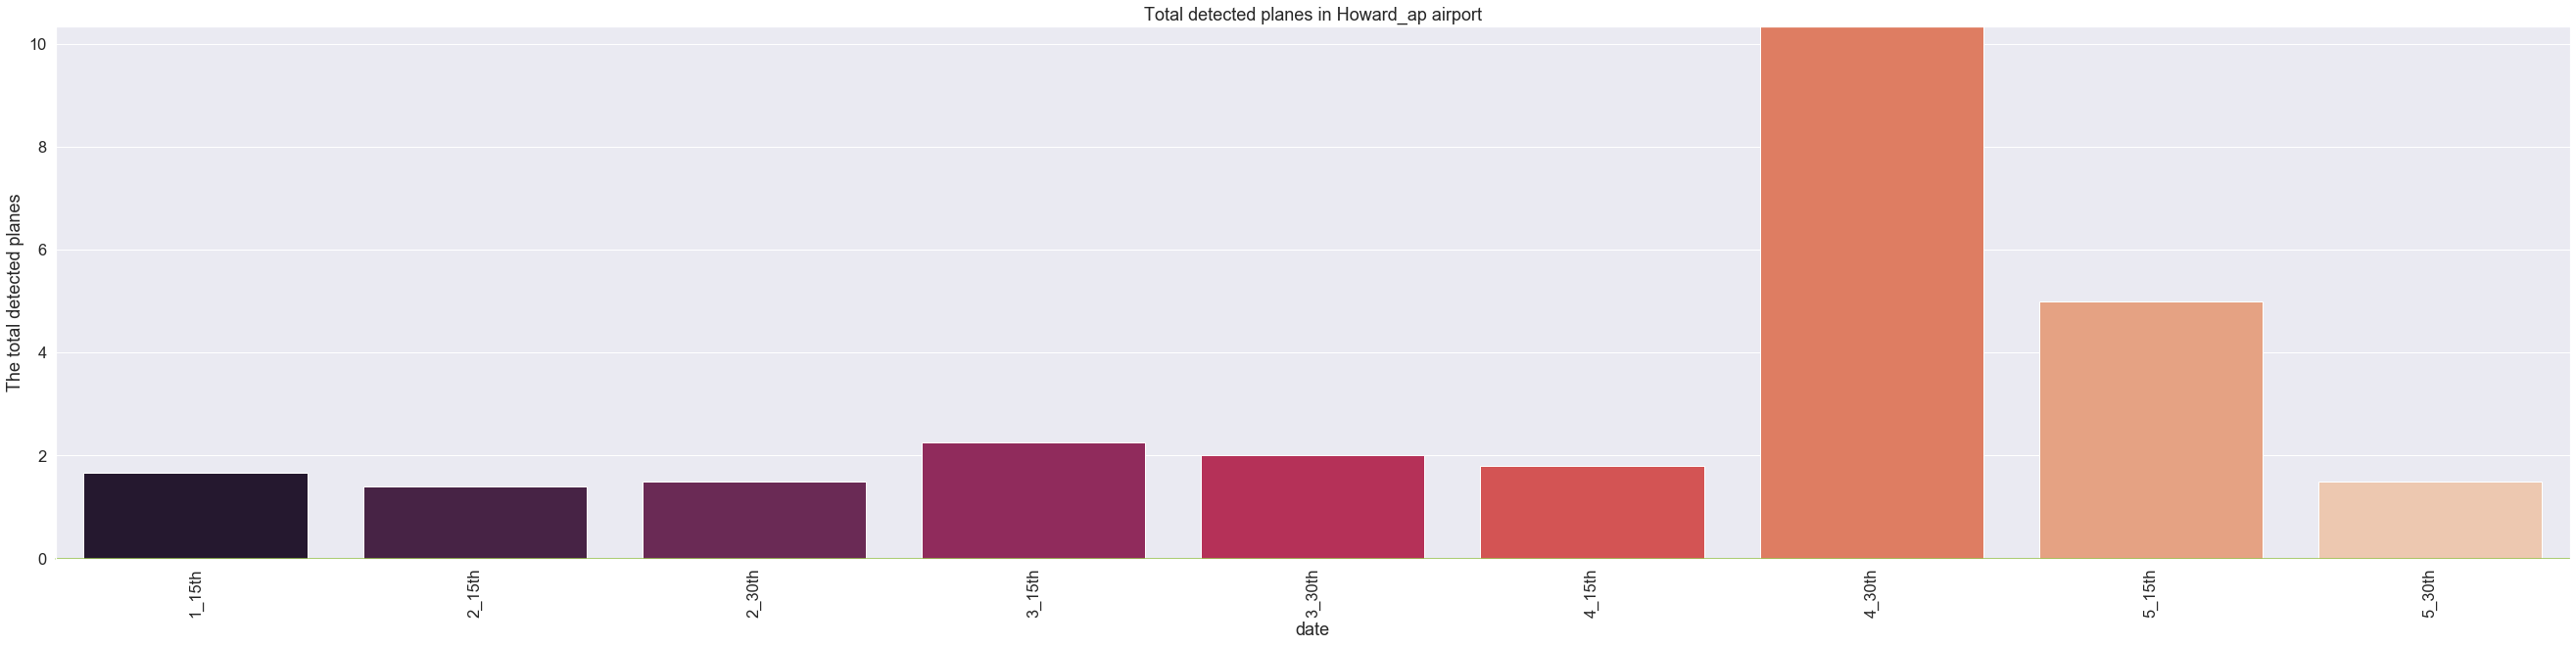

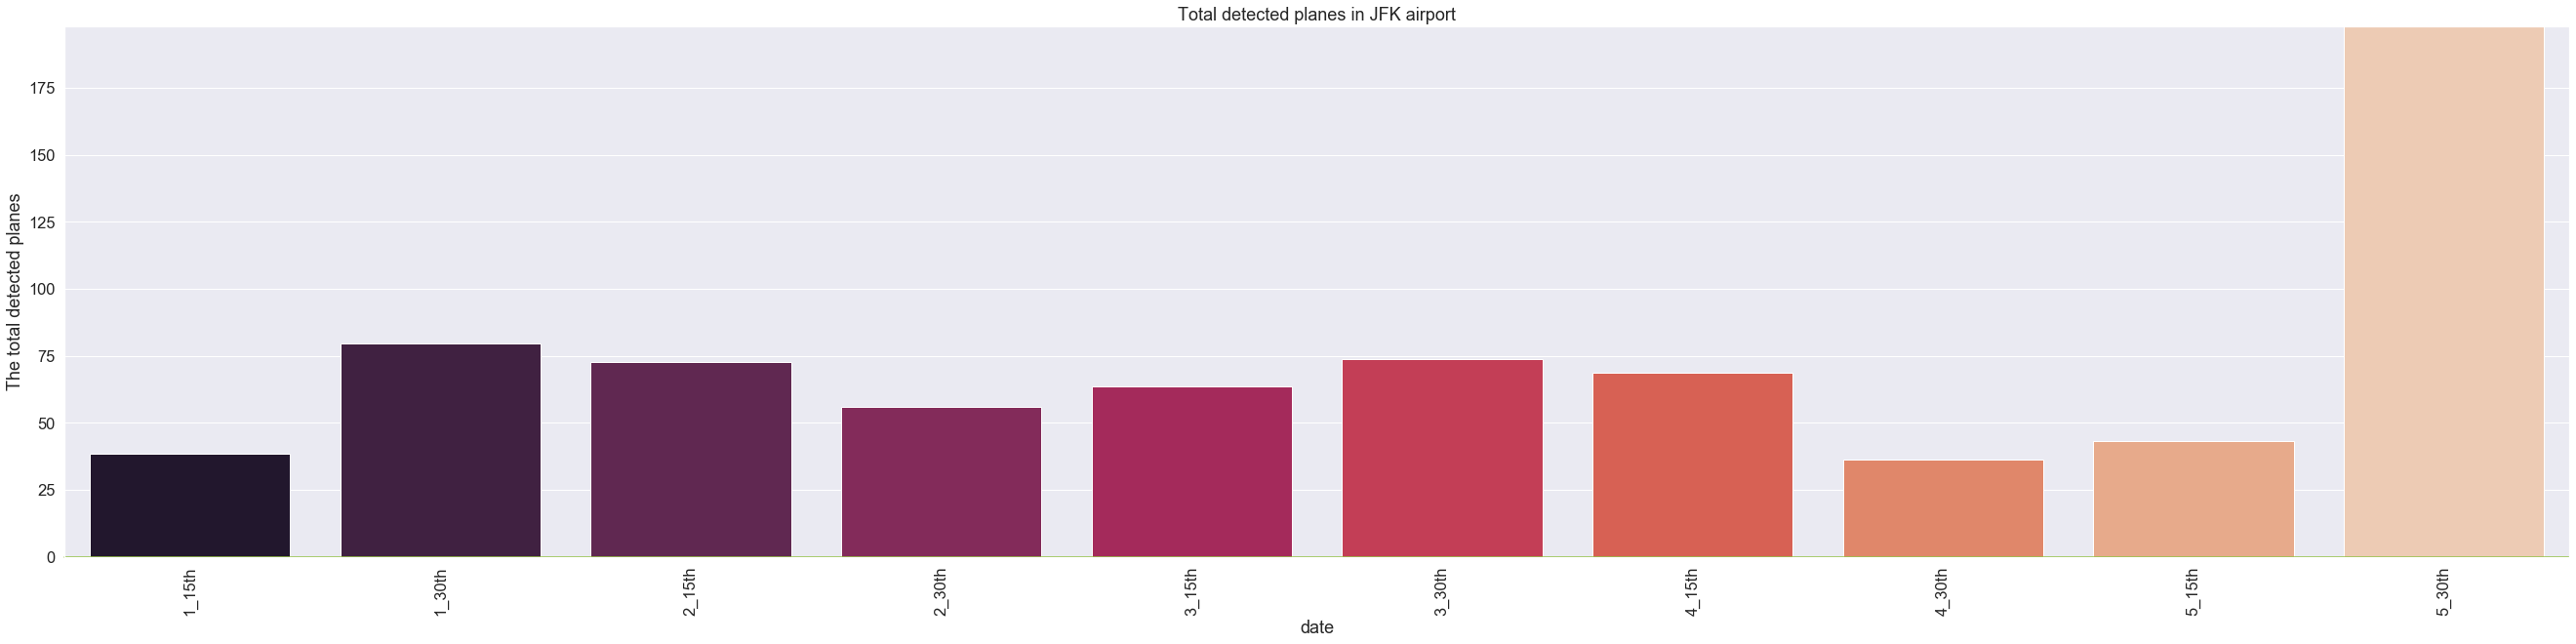

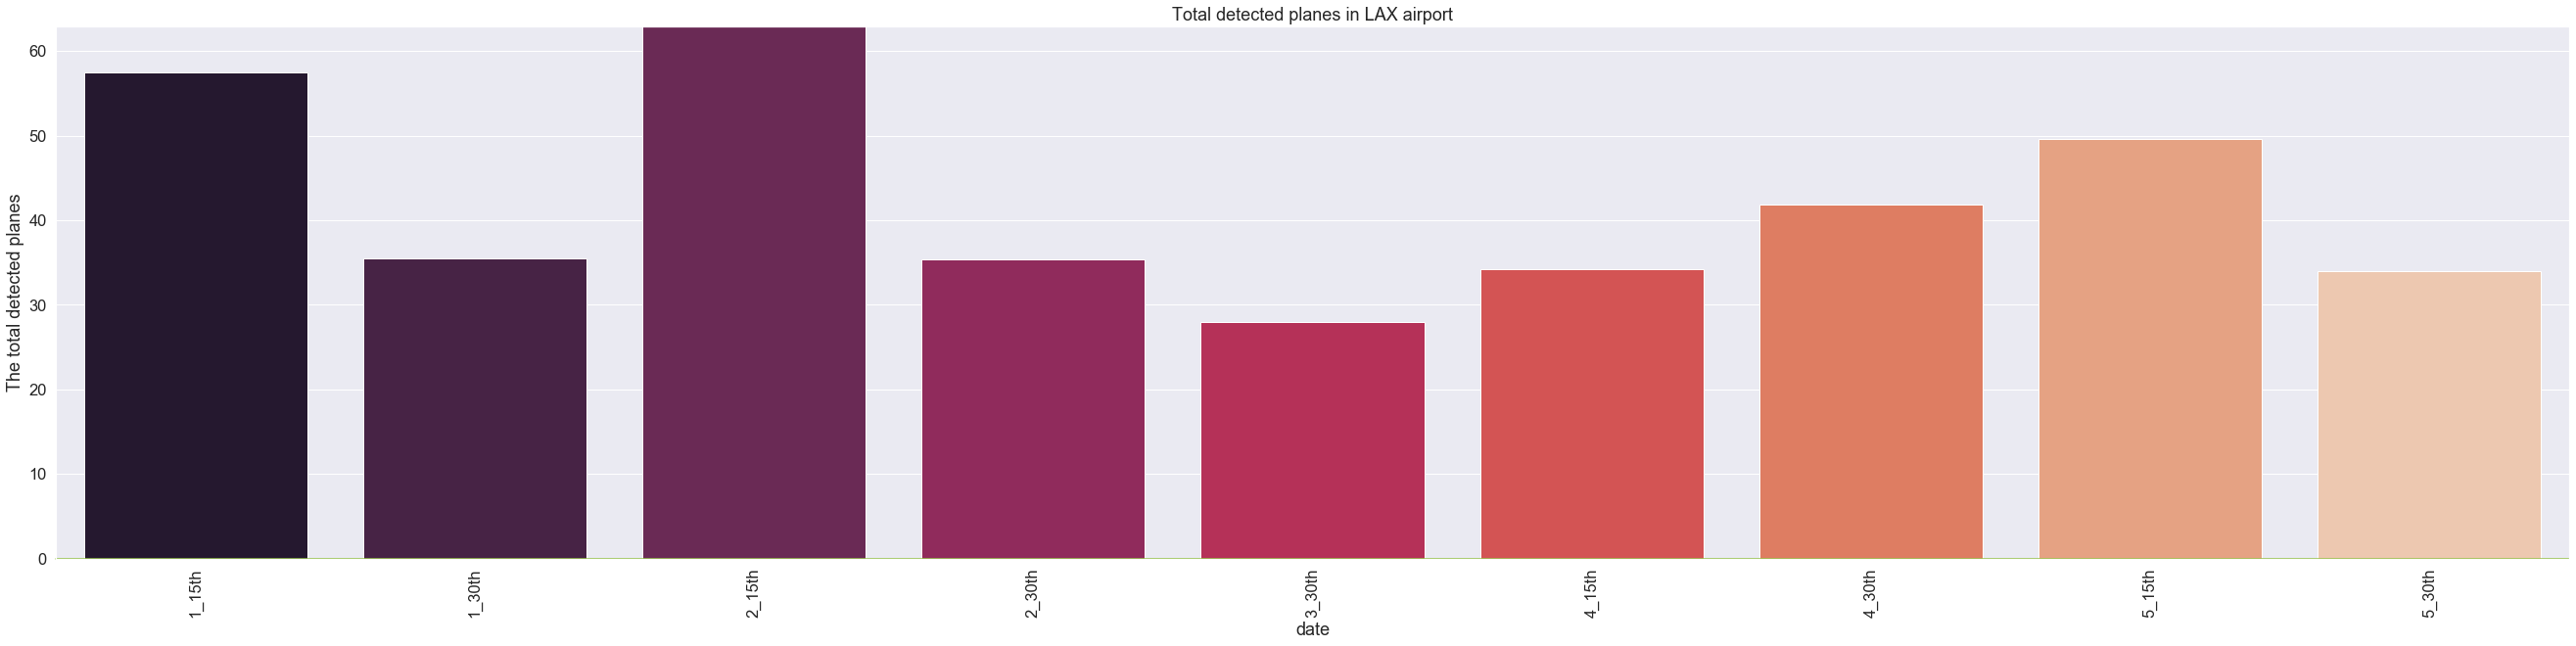

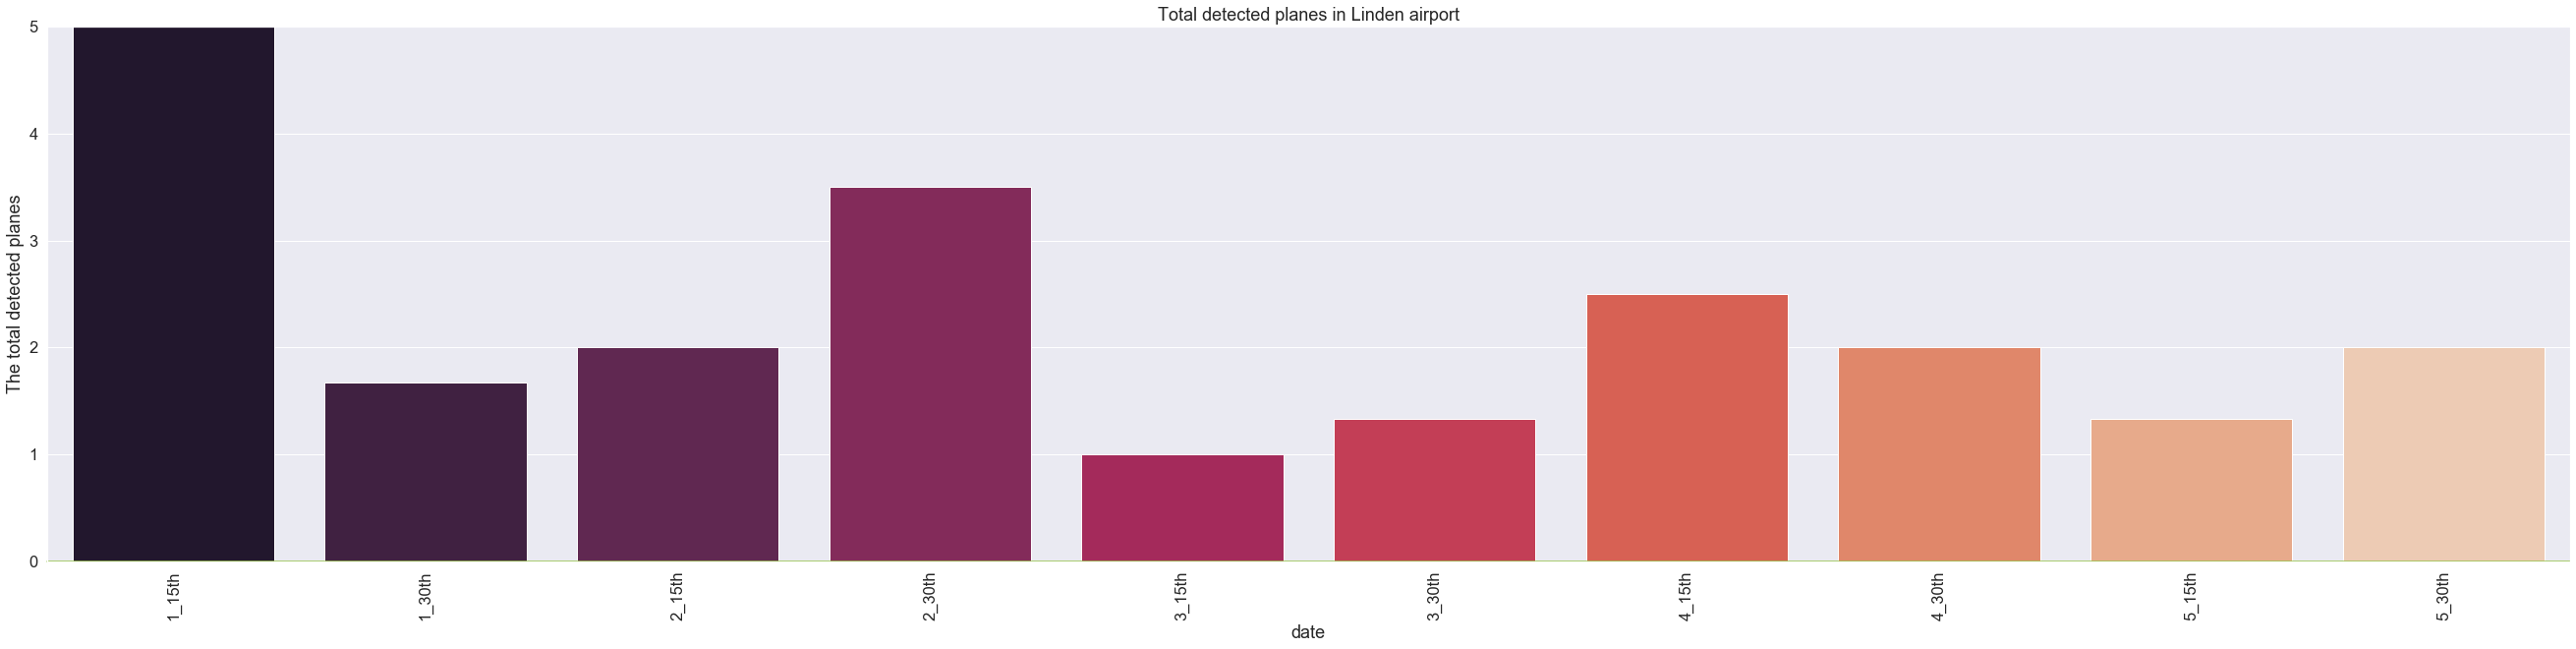

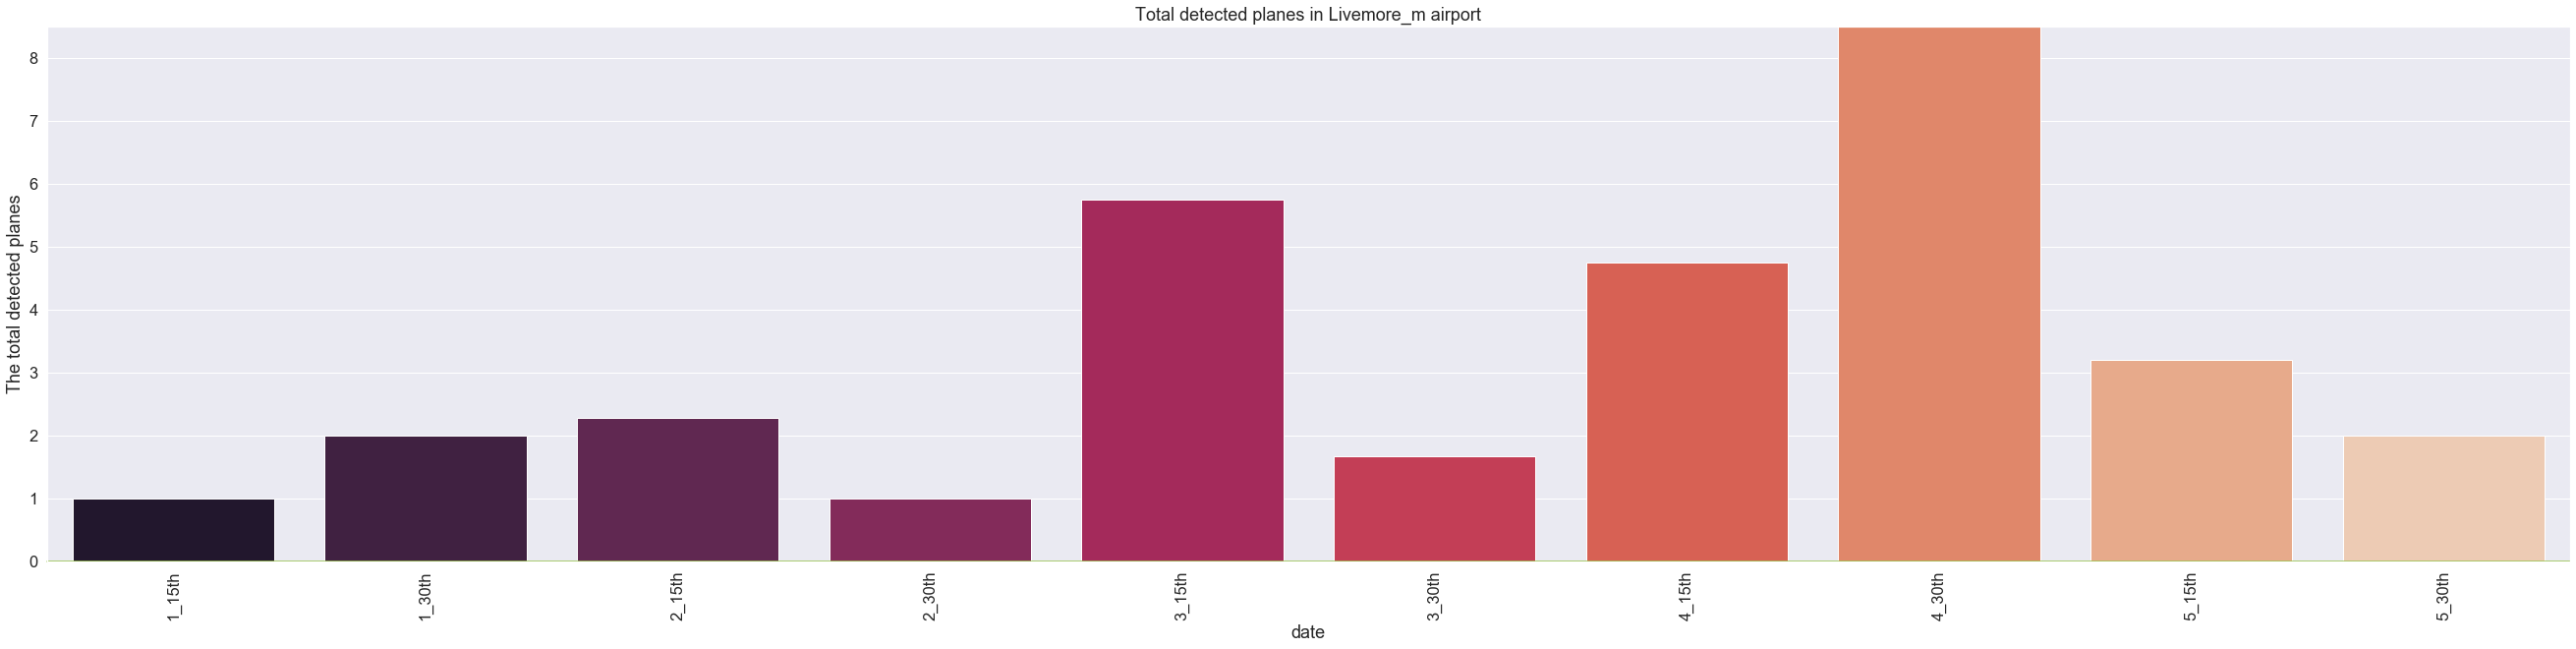

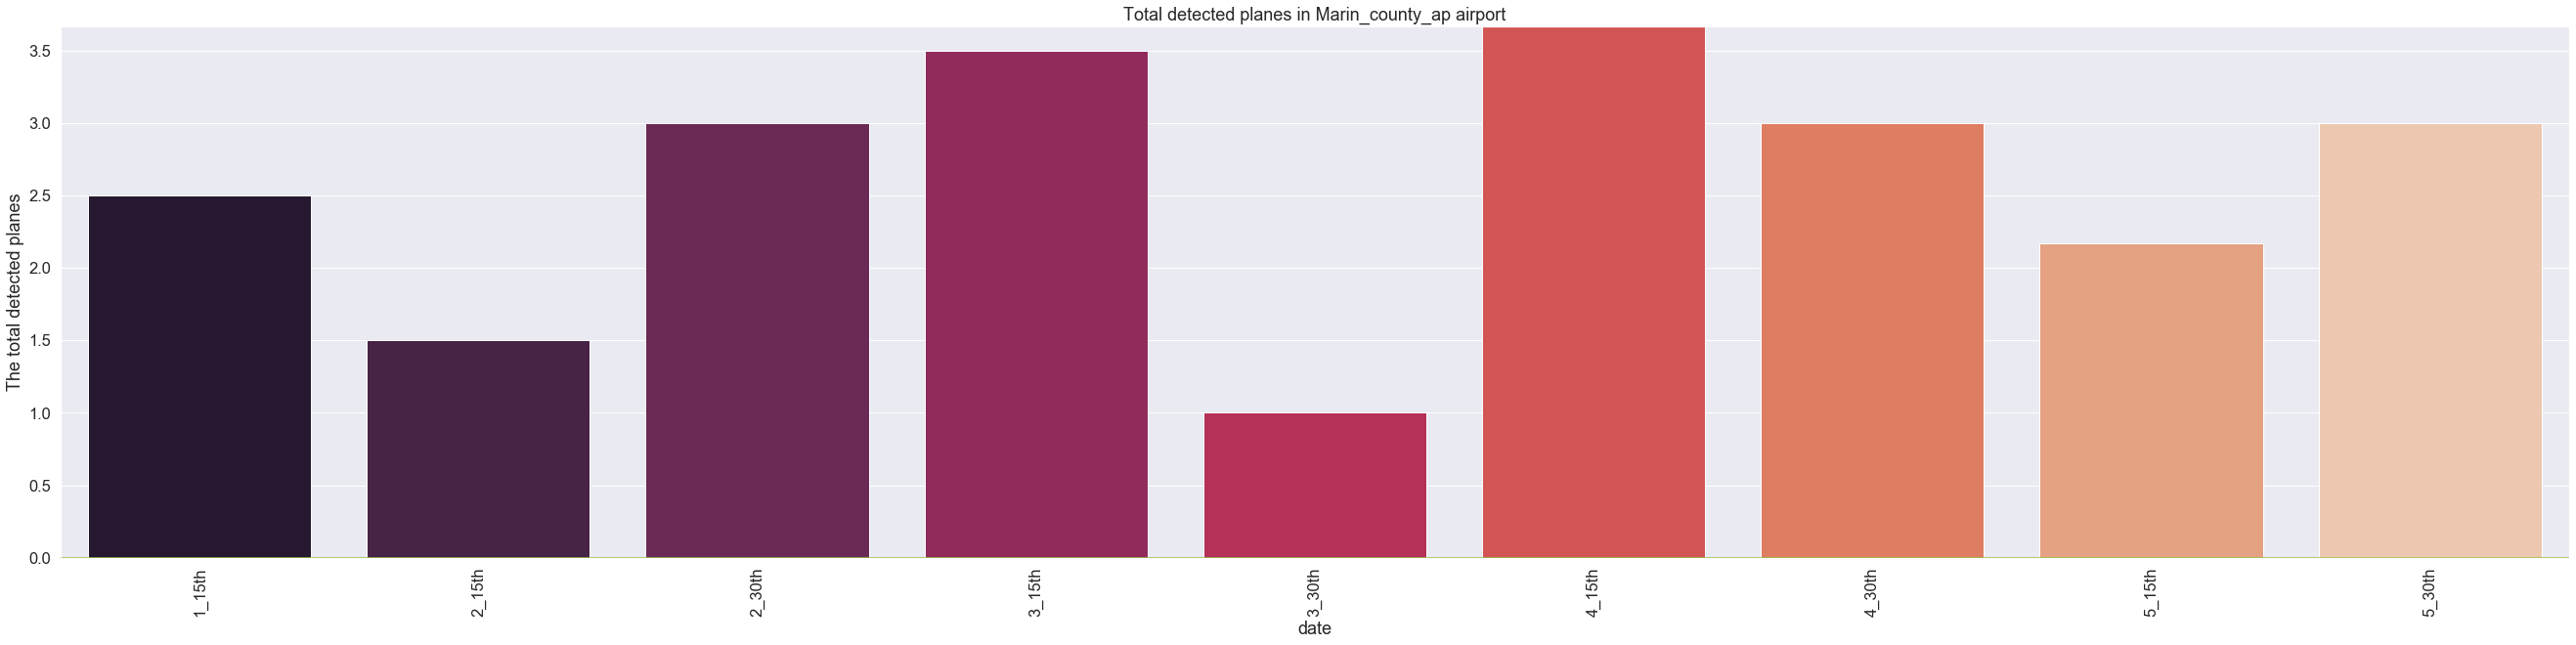

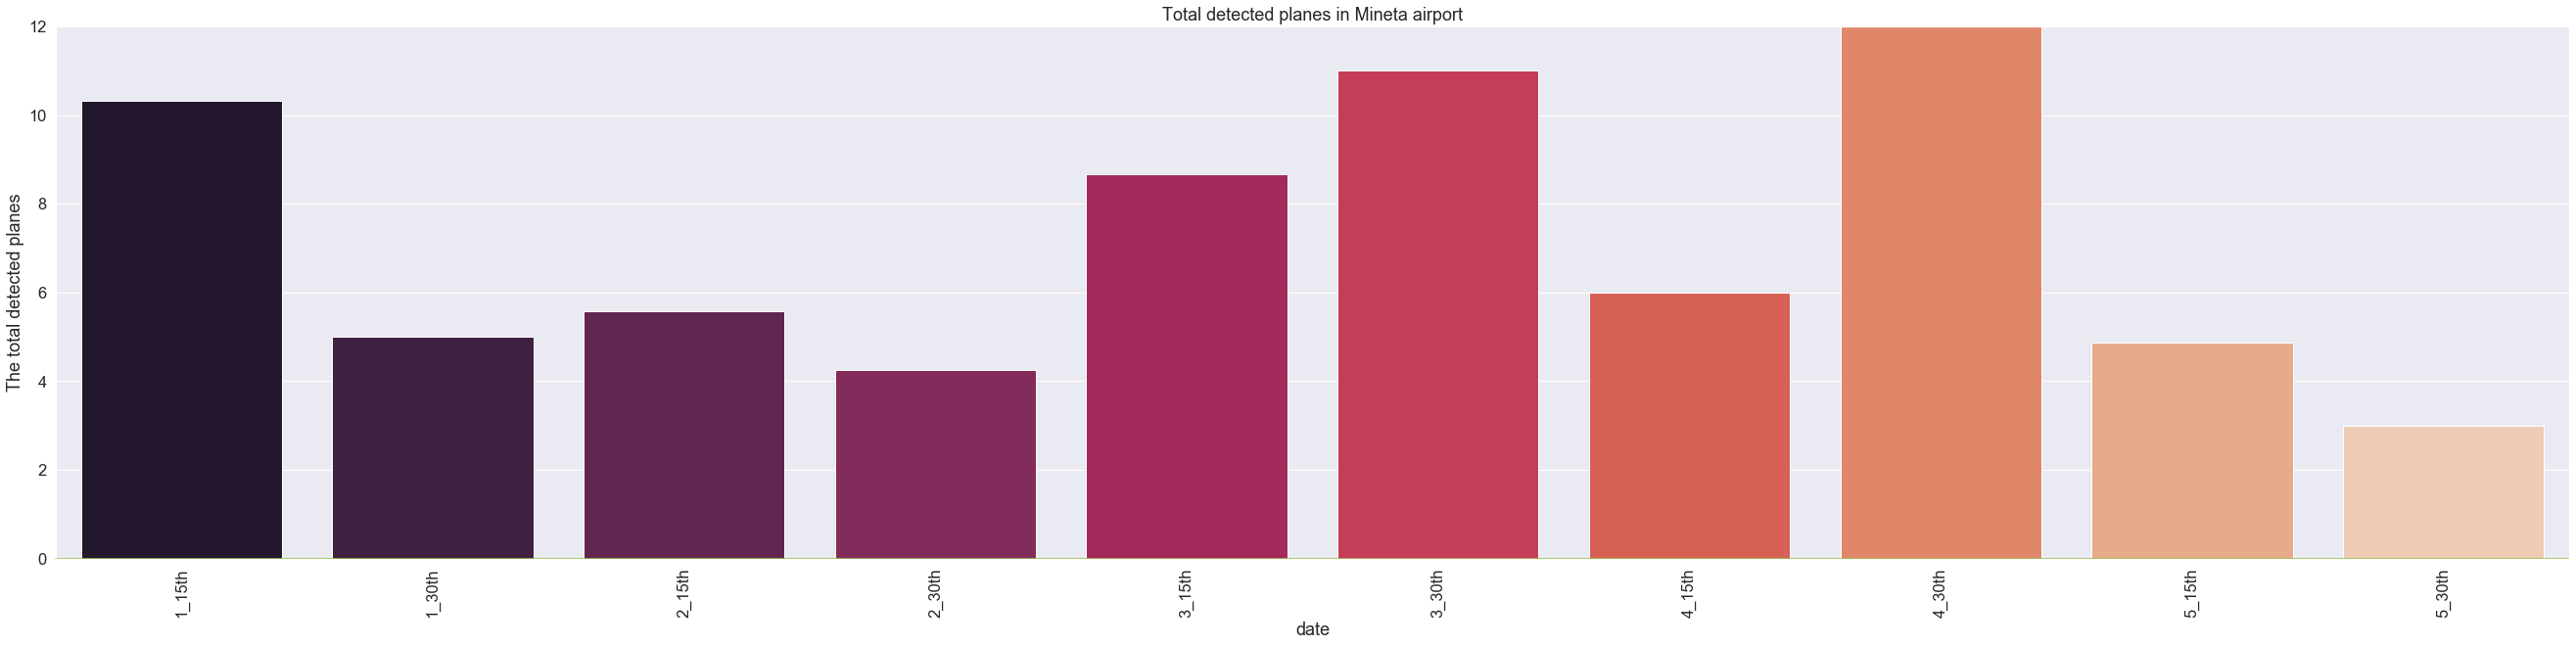

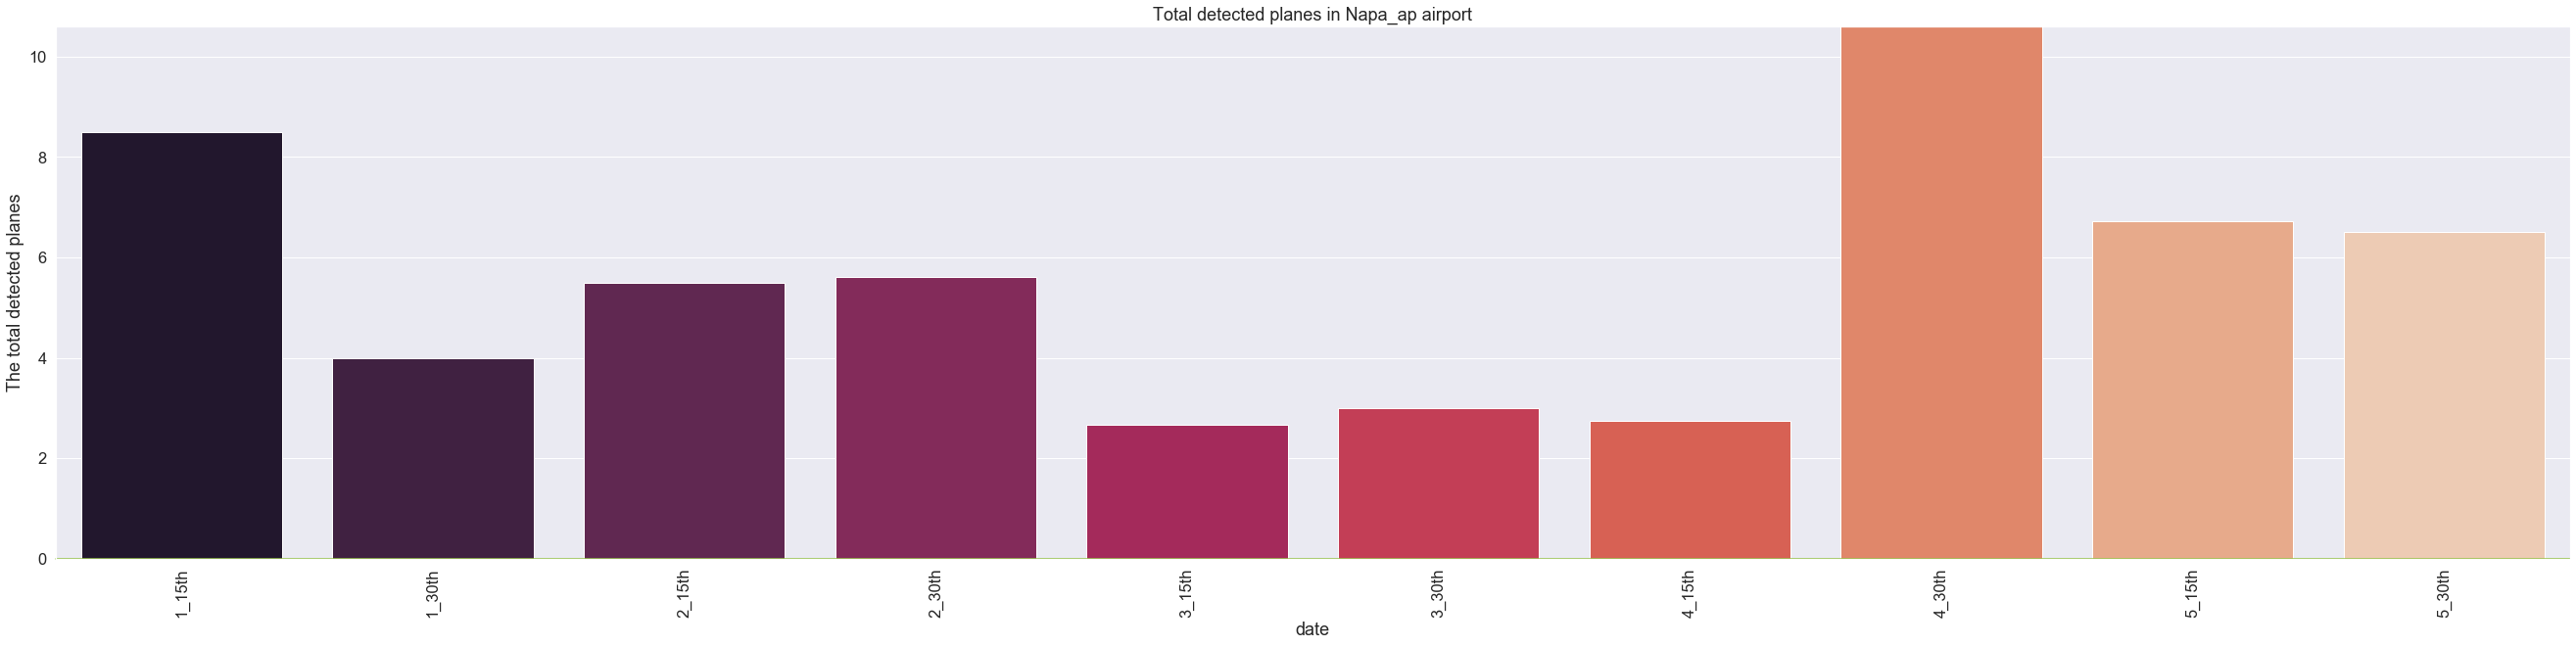

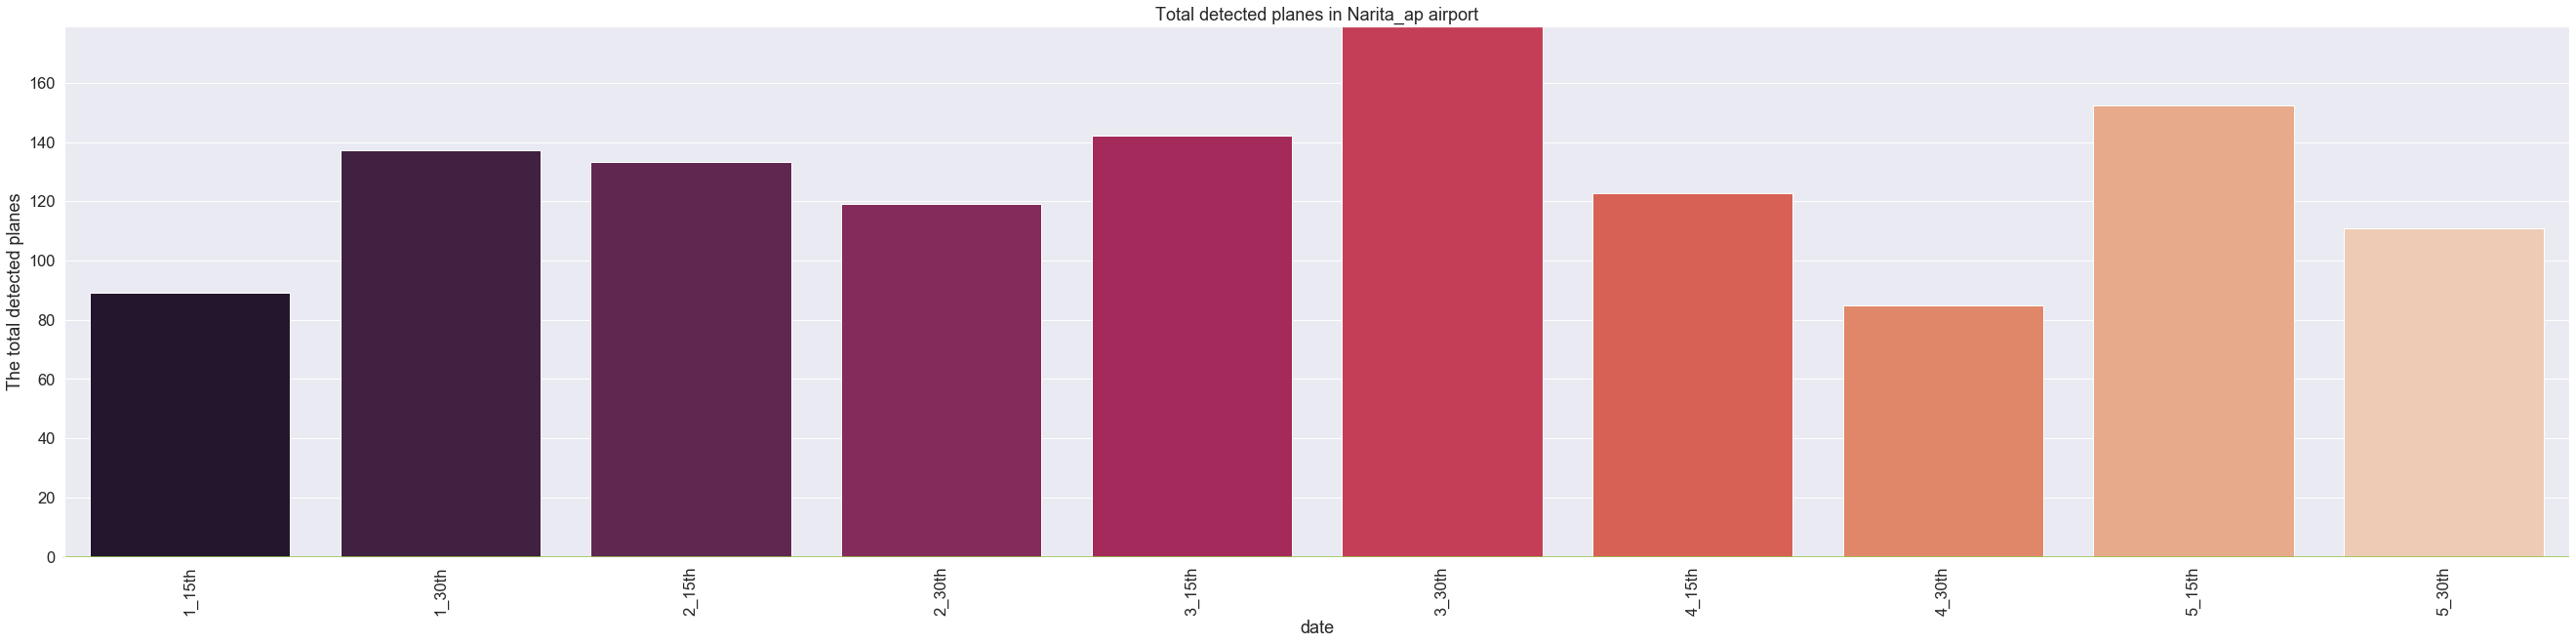

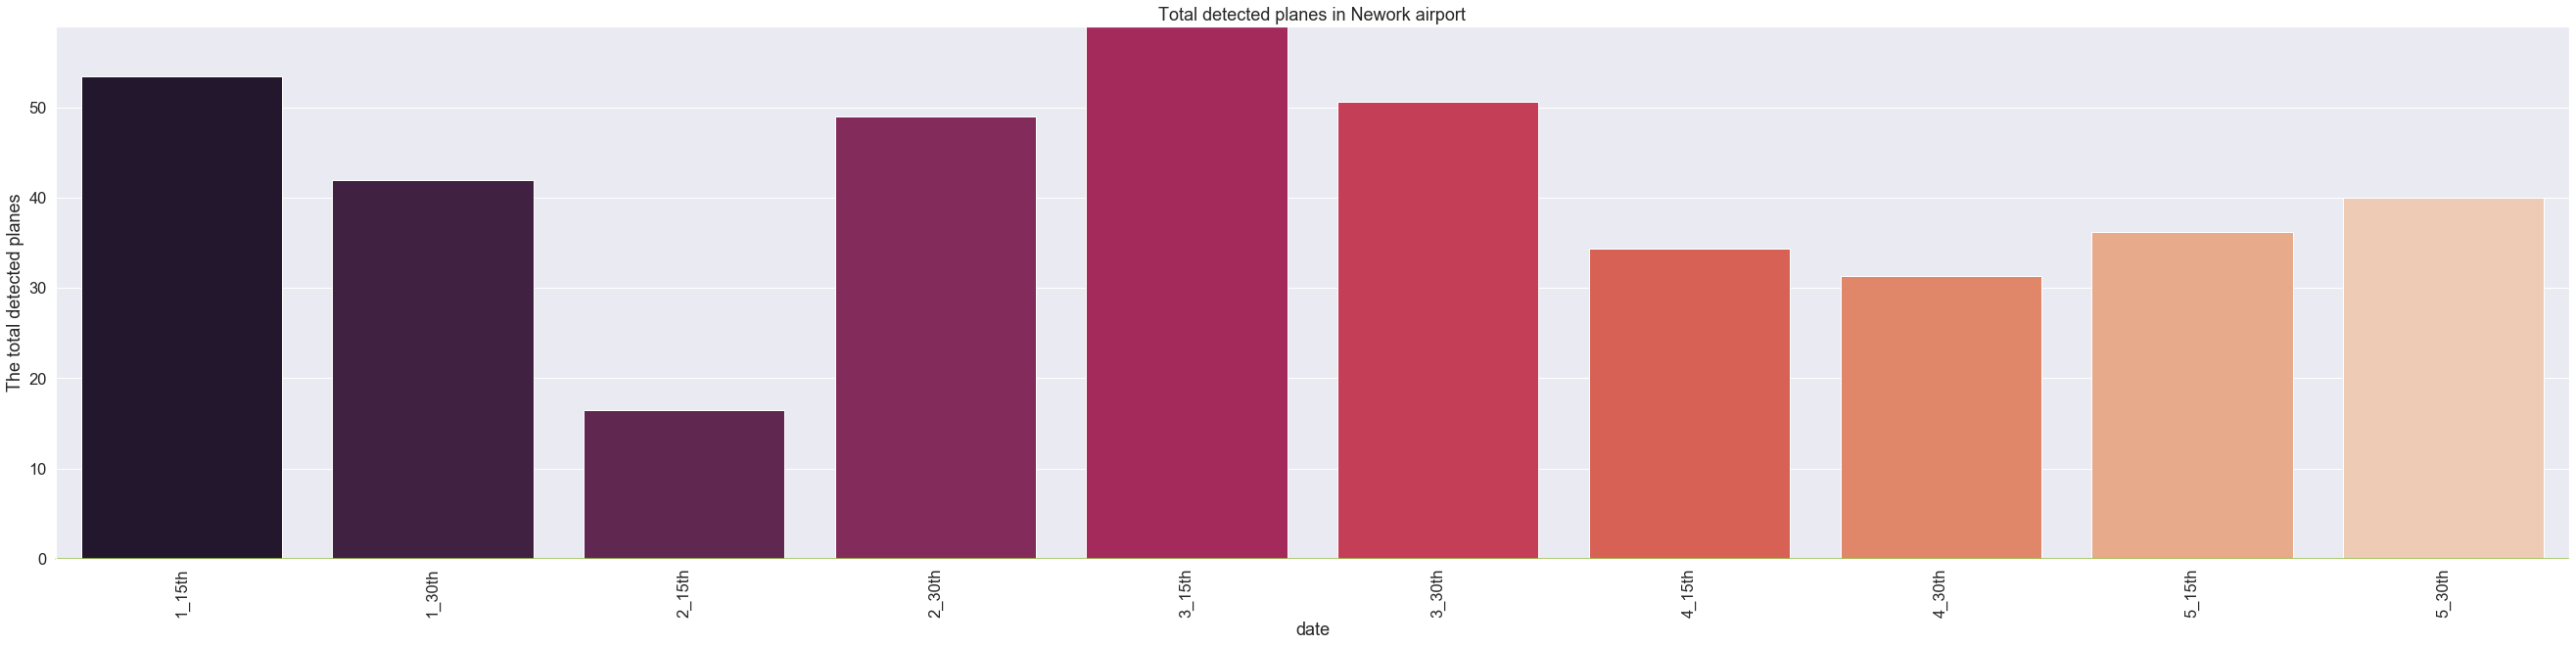

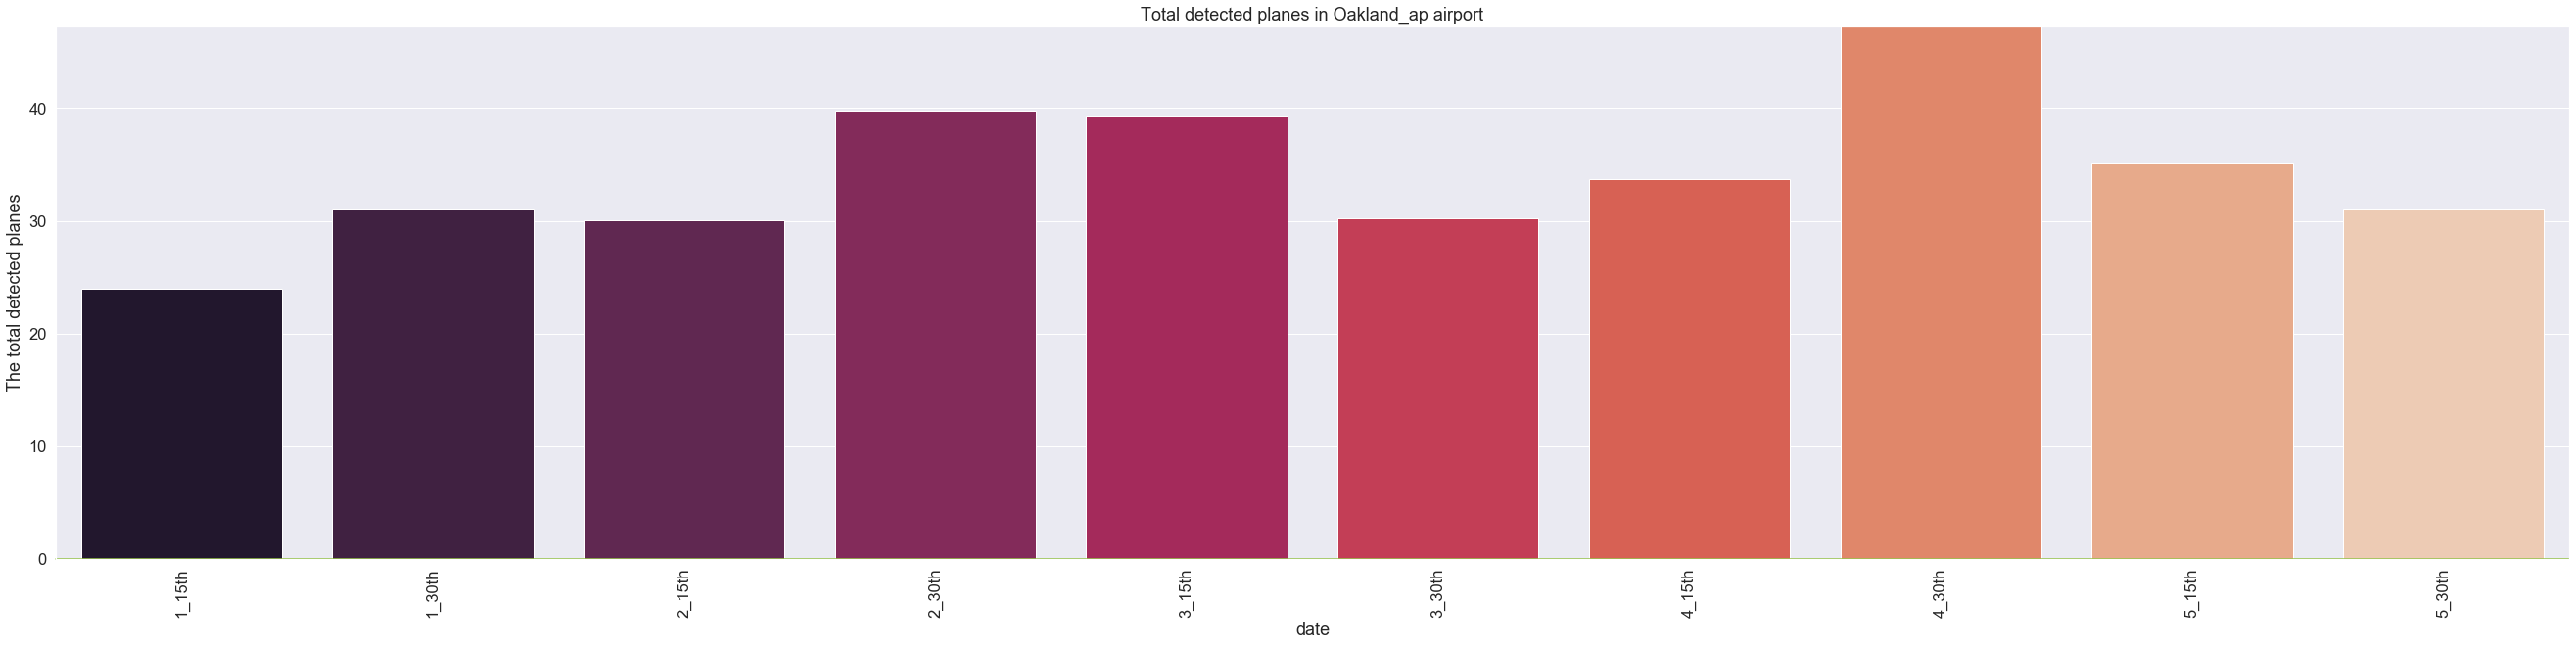

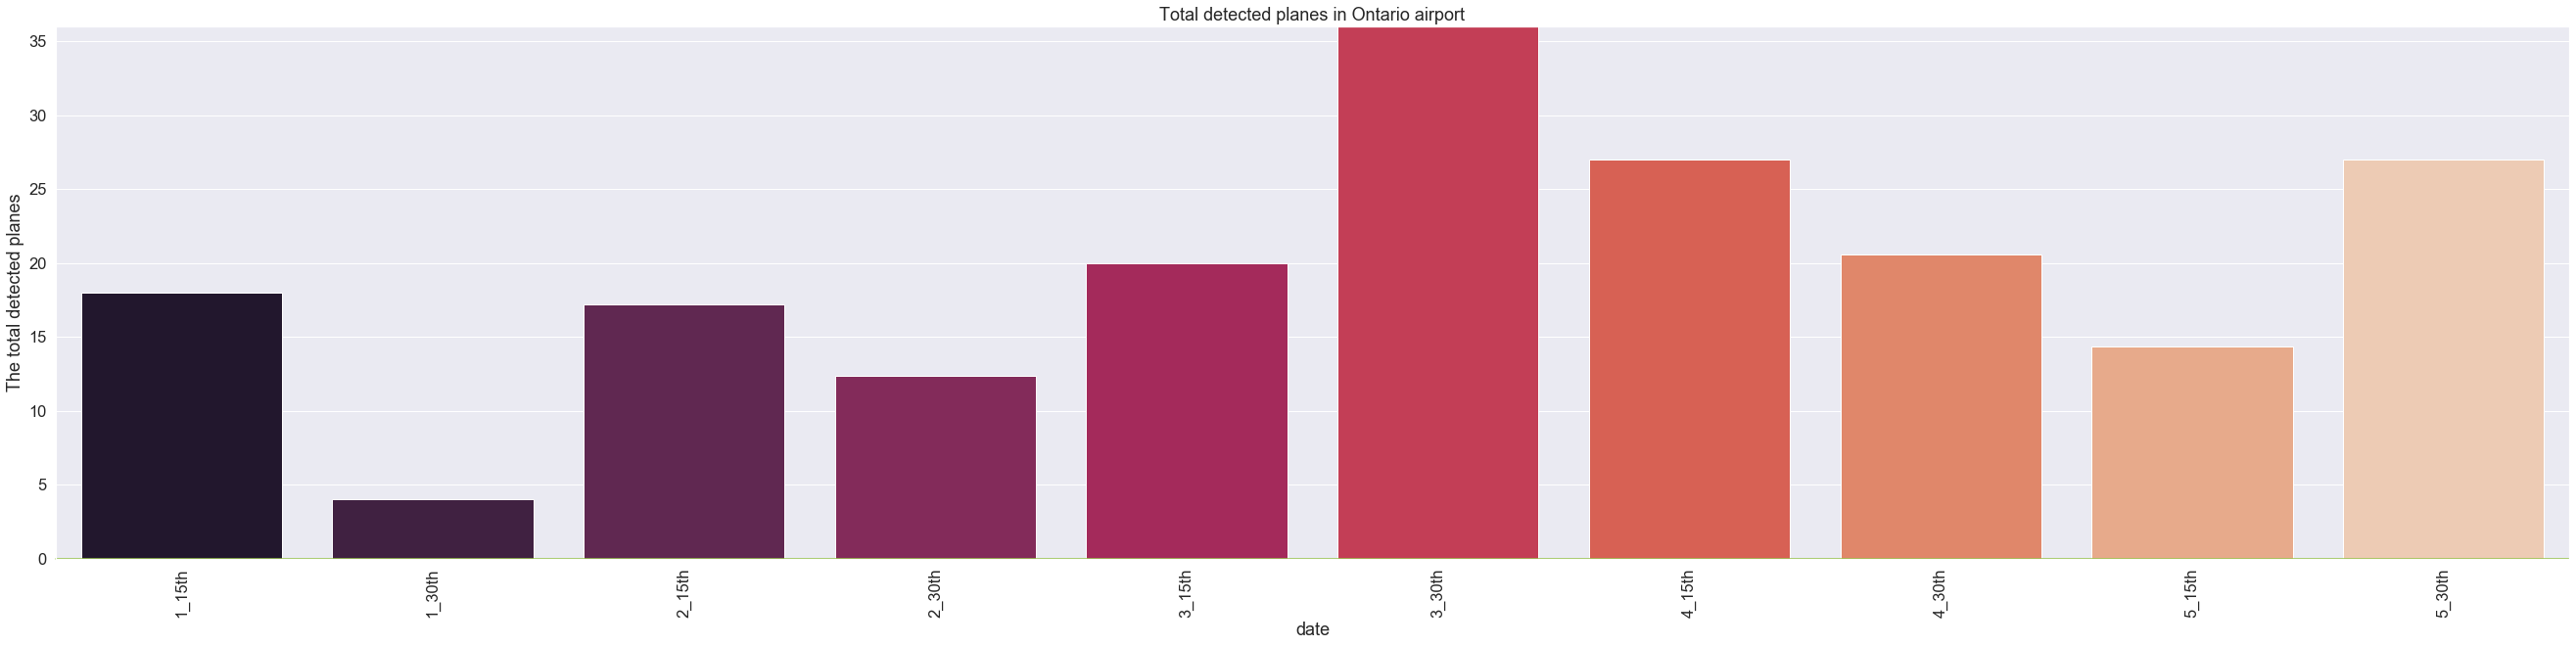

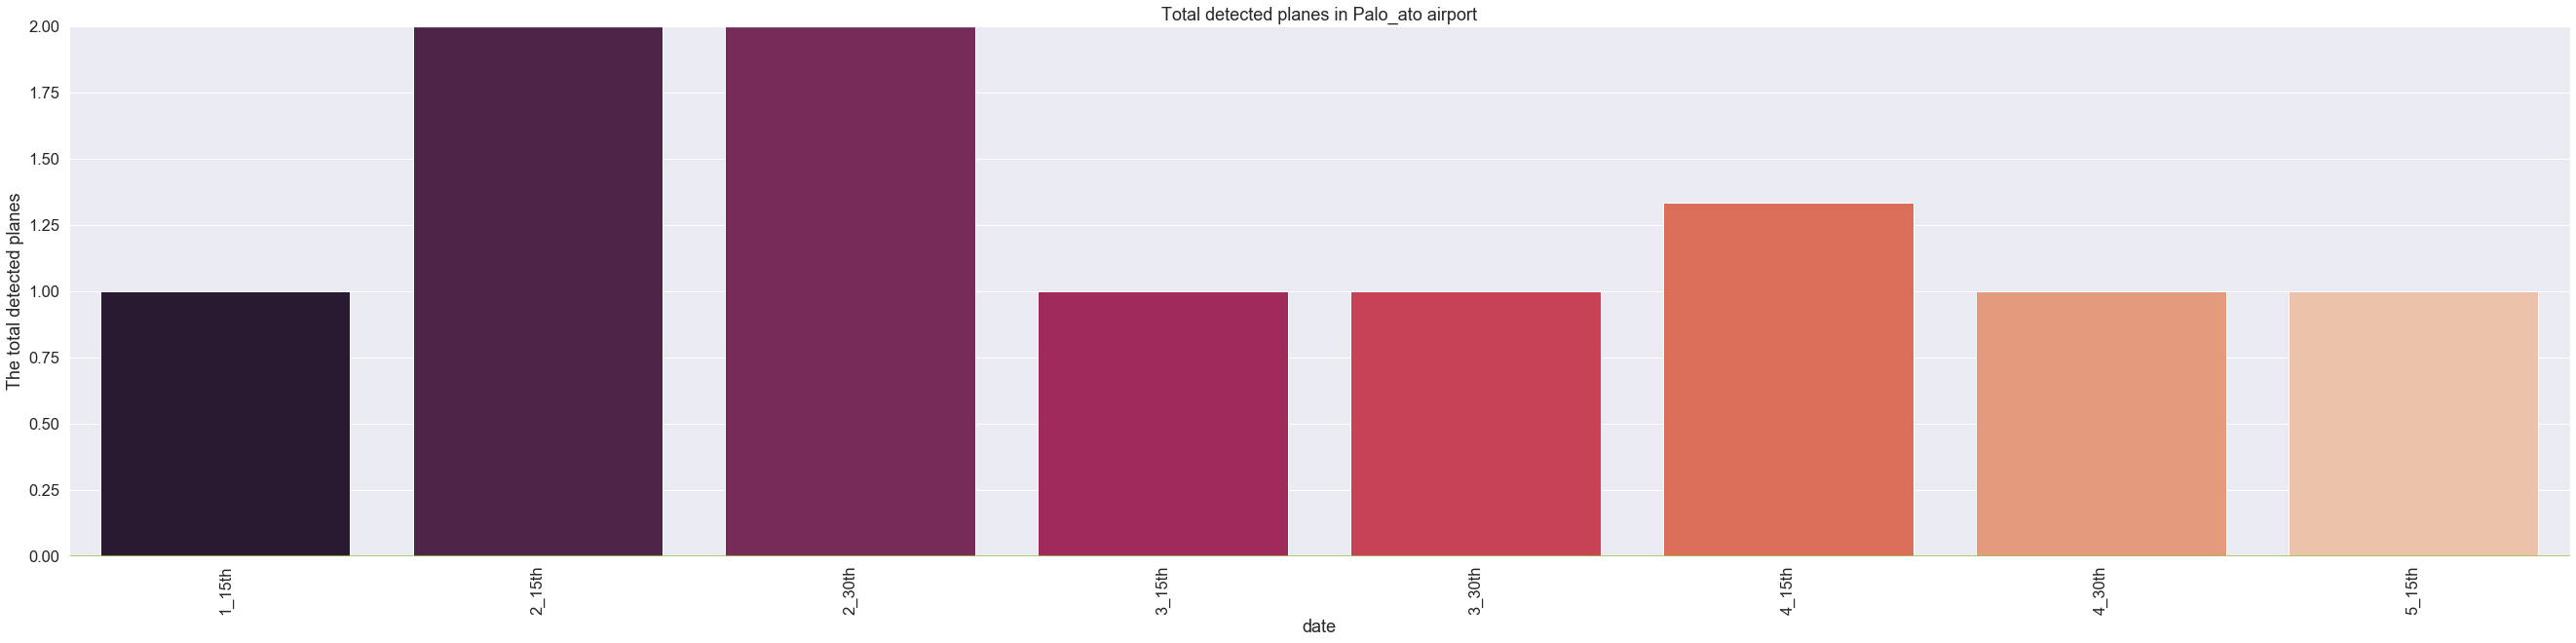

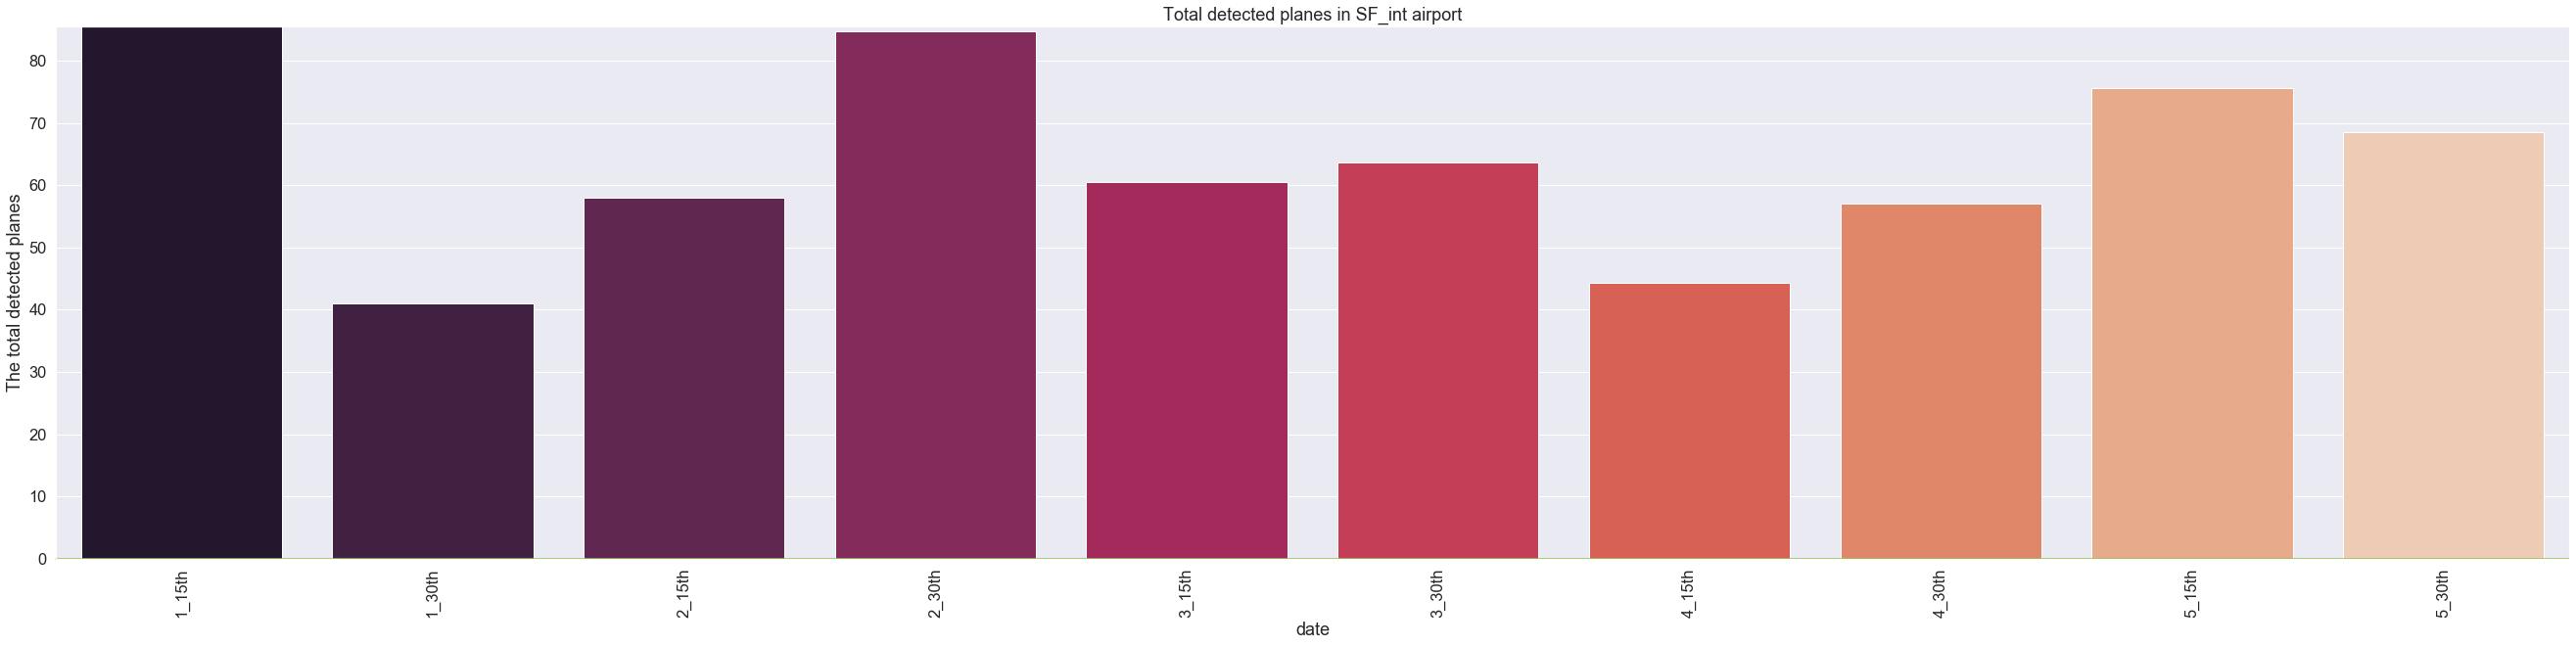

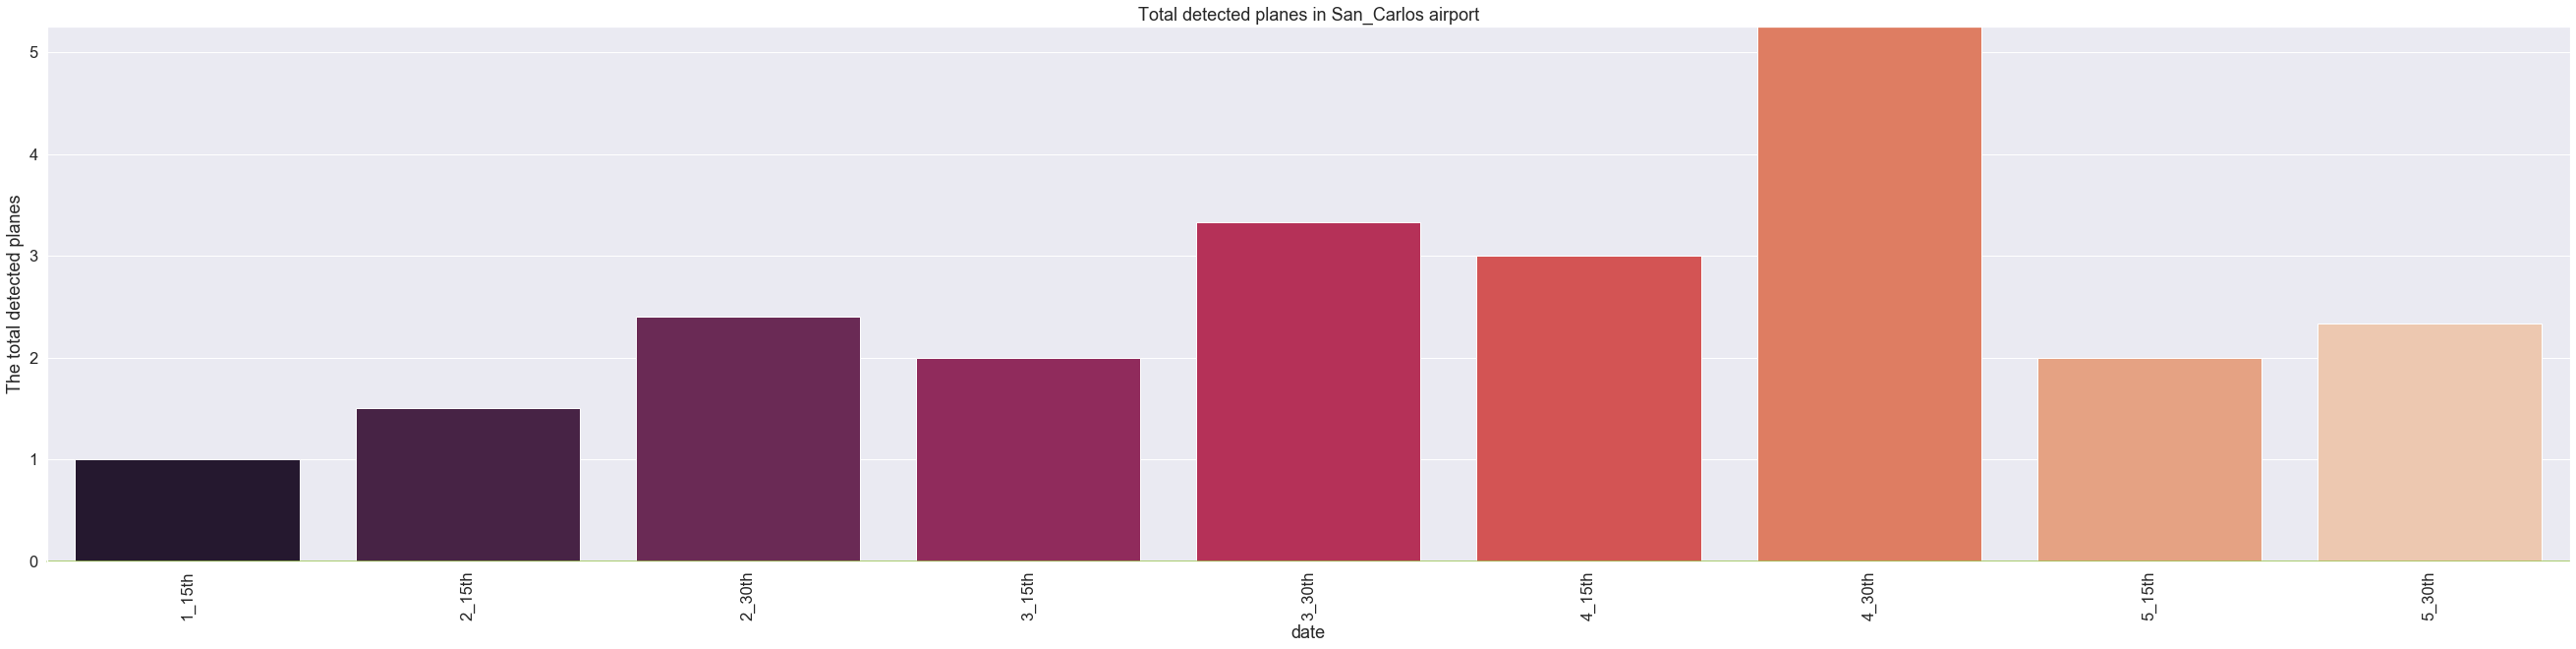

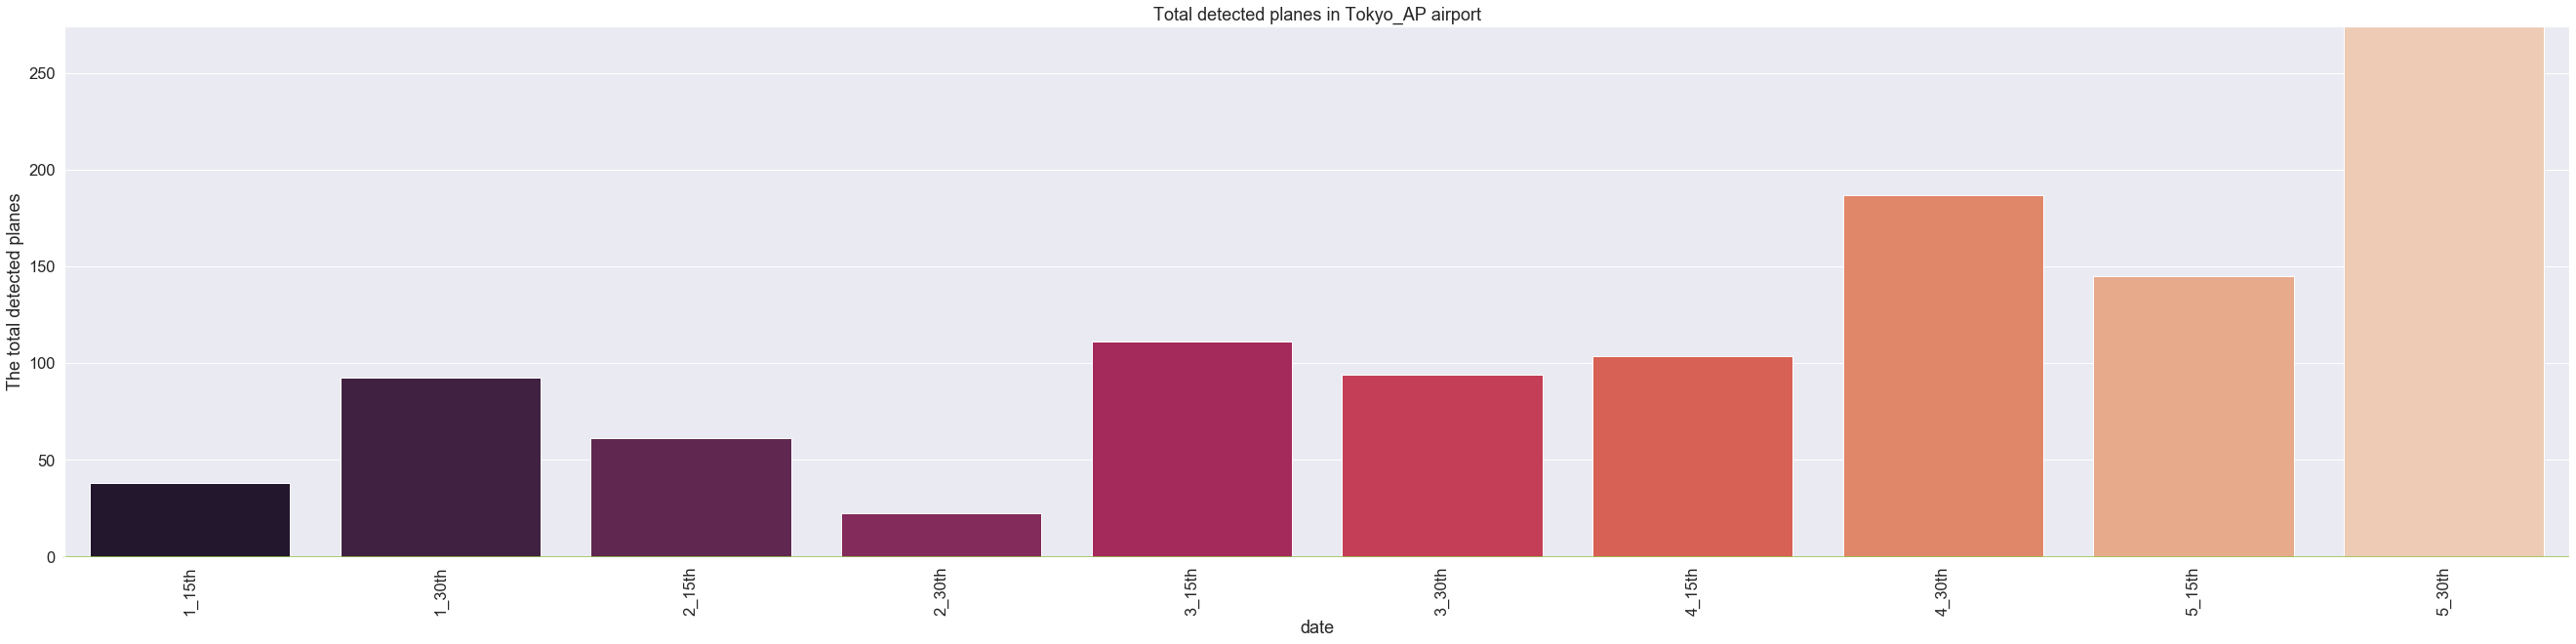

In [27]:
for airport in np.unique(np.array(airports['label'])):
    plot_pss_stas_aoi_hm(airport, detections_airports)